# Project Moxy Milestone Report

## Team Members

Team Member 1: Emily Erickson

> UNID: u1187346

> Email: emily_erickson@outlook.com

   
Team Member 2: Vishwa Murugappan

> UNID: u1089366

> Email: vishwamurugappan@gmail.com

## Background and Motivations

The Moxy Movement is an aerial arts training studio located in Draper, Utah. It offers pole, lyra, hammock, yoga, flexibility, and other related classes daily. Emily has been a member at Moxy for 4 years and is close friends with the owner. The owner frequently comments on class attendance--such as less people coming during the summer, morning classes not performing as well as evening classes, etc. But does attendance data support these observations? For the studio to thrive, it is important that the classes people want are offered at the times they are available to take them. Money is lost when instructors come in to teach only one or two students. If an unpopular class is occupying the space when a more popular one could be being held, opportunity to have more people paying to attend the class is also lost.
Therefore, indentifying trends and patterns in class attendance based on time-based and categorical features as well as predicting class attendance using machine learning regression techniques could help the owner plan the classes in a way that minizes poor class attendance.

By progessing towards the objectives mentioned arelier, we'd like to help The Moxy Movement's owner optimize her business's class schedule, increasing customer satisfaction and saving teachers the hassle of holding nearly empty classes.

## Project Objectives

The primary objectives of our project are:

1.   Identify and describe patterns in class attendance based on time-based and categorical features (Accomplished in the Exploratory Data Analysis)
2.   Attempt to predict class attendance based on the features we extracted from the data (Accomplished in the Analysis Section)

## Background

The data that was collected includes categorical and time based variables (more discussion in the "Data and Data Descriptions" section below) for each class. The target variable (the one to predict) is class attendance percentage.

The techniques that deal with the data can be spilt into the sections of exploratory data analysis techniques and machine learning and dimensionality analysis techniques.

- EDA Techniques:
  - Since much of our data is categorical, bar charts are a good way to visualize the data

- Machine Learning and Dimensionality Analysis Techniques:
  - PCA is a good way to reduce dimensions while preserving the data structure
    - Taking the explained variance ratios will allow us to determine which particular dimensions explain the structure of the data the best
  - There is a theorum called the "No Free Lunch" theorum in machine learning. It means that there is no one machine learning algorithm that will work best for any particular problem. Therrefore, it is important to try and compare multiple algorithms.
  - Linear Regression (and its regularized versions called Lasso and Ridge Regression) attempt to fit a hyperplane to data to perform regression. This could potentially be a good algorithm to try if our data is linear.
  - Decision Trees (and there ensemble version, Random Forests) work by splitting the data into different branches; these splits are made in a way that maximizes the amount the information the tree learn from the data. This could be a good method if the data is not very linear and has many outliers. However, decision tree are prone to overfiting (learning too much about the training data and not predicting the testing data properly). Decision Trees have been used in the past for similar gym-related data projects, so they are promising in this case.
  - K-Nearest Neighbors (KNN) is an algorithm that works by observing and group together the clostest data points. The idea behind it is if there is a cluster of data with similar values, a new data point near the cluster should also have similar values. This is a promising algorithm for our type of data.
  - Support Vector Machines (SVMs) work by projecting data into higher dimenions, performing regression and then returning the data down to the original number of dimensions it had. Because of the complex operations that SVM perform, it can learn various patterns for regression, and that makes it promising for our project.
  - Multilayer Perceptron Neural Networks (MLP) are networks that have input layers, hidden layers (which break down and model data), and output (prediction) layers. They are another very promising technique for our data because of how well they are able to model all types of data. They have been used in other similar gym-related data projects.

## Data and Data Descriptions

We scraped our data directly from Moxy's class scheduling website. The data is in a tabular form. Here is a sample week of the data:

https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2022%2D02%2D18&VIEW=list

The website only displays weekly data for the past year, which is a limitation to our investigation that we had no choice but to work with. We created a list of URLs to visit for all weeks in the past year and fed them into a function which scraped the necessary data and added it to a table.

We extraacted some additional features from the fields we scraped by strategic parsing and added them to our dataframe as new columns. Many of our columns contained categorical data which we anticipated would work well for the exploratory data analysis portion of our project. More specifically, the categorical data features we found were:
- the name of each class
- the teacher teaching each class
- the room in which the class was held.

The categorical data mentioned above was OneHotEncoded to make it usable for the machine learning algorithms.

Additionally, we were able to extract time data about each class. We were able to find:
- the time of day (when the class happened)
- the day of the week (when the class happened)
- the day of the month (when the class happened)
- the month of the year (when the class happened)

The last three of the aforementioned variables were "cyclically encoded", to account for the fact that they occured in a repeating fashion. In order to do this, they were given sine and cosine values. Should the sine and cosine values be graphed, they would form a circle, which is why we used the term "cyclical encoding" to descirbe them.

Finally, we extracted data about class attendance and capacity for each class. When the former is divided by the latter, the results in a percent attendance value, which will be examined in the EDA section and be the target variable to predict in the analysis (machine learning) section.

## Data Processing

In [ ]:
import pandas as pd
import requests
from datetime import datetime
import numpy as np
import math

import numpy as np
from numpy import NAN

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import seaborn as sb
%matplotlib inline 

from numpy import NAN

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor

import decimal

This segment of code creates the list of links to visit to extract data from as well as a dataframe with the data.

In [ ]:
# Creating list of links (each week's data is at a separate URL) from May 2nd to April 9th
links_to_visit = ["https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D05%2D06&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D05%2D13&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D05%2D20&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D05%2D27&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D06%2D03&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D06%2D10&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D06%2D17&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D06%2D24&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D07%2D01&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D07%2D08&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D07%2D15&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D07%2D22&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D07%2D29&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D08%2D05&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D08%2D12&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D08%2D19&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D08%2D26&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D09%2D02&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D09%2D09&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D09%2D16&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D09%2D23&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D09%2D30&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D10%2D07&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D10%2D14&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D10%2D21&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D10%2D28&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D11%2D04&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D11%2D11&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D11%2D18&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D11%2D25&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D12%2D02&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D12%2D09&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D12%2D16&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D12%2D23&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2021%2D12%2D30&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2022%2D01%2D06&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2022%2D01%2D13&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2022%2D01%2D20&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2022%2D01%2D27&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2022%2D02%2D03&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2022%2D02%2D10&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2022%2D02%2D17&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2022%2D02%2D24&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2022%2D03%2D03&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2022%2D03%2D10&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2022%2D03%2D17&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2022%2D03%2D24&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2022%2D03%2D31&VIEW=list", "https://moxymovement.sites.zenplanner.com/calendar.cfm?DATE=2022%2D04%2D07&VIEW=list"]

# Reading links and concatenating data into a dataframe
data_to_concatenate = []
for link in links_to_visit:
  dfs = pd.read_html(link)

  df = dfs[2]
  data_to_concatenate.append(df)

moxy_data = pd.concat(data_to_concatenate)
moxy_data

,0,1,2,3,4,5
0,"Sunday, May 2, 2021","Sunday, May 2, 2021","Sunday, May 2, 2021","Sunday, May 2, 2021","Sunday, May 2, 2021","Sunday, May 2, 2021"
1,11:30 AM,Pole Dance Choreography Level 2 (4/7),Angela Nelson,Pole Studio,(3 spots left),NaN
2,11:30 AM,Open Studio: 105 (Aerial Room) (0/6),NO INSTRUCTOR,Lyra/Dance Studio,(6 spots left),NaN
3,12:45 PM,Open Studio: 205 (Pole Room) (0/8),Guest Instructor,Pole Studio,(8 spots left),NaN
4,"Monday, May 3, 2021","Monday, May 3, 2021","Monday, May 3, 2021","Monday, May 3, 2021","Monday, May 3, 2021","Monday, May 3, 2021"
...,...,...,...,...,...,...
46,10:15 AM,Hammock Level 1/2 (5/6),Ashley Coats,Lyra/Dance Studio,(1 spots left),NaN
47,10:15 AM,Pole Technique 2 (5/8),Angela Nelson,Pole Studio,(3 spots left),NaN
48,11:30 AM,Pole Technique 3 & 4 (4/8),Angela Nelson,Pole Studio,(4 spots left),NaN
49,11:30 AM,Open Studio: 105 (Aerial Room) (0/6),NO INSTRUCTOR,Lyra/Dance Studio,(6 spots left),NaN


The next 3 code cells clean the data and put it in a useful format.

In [ ]:
# Create lists to hold processed data and extracted features
name = []
capacity = []
date = []
time = []
weekday = []
month = []
teacher = []
attendance = []
room = []
datetime = []

In [ ]:
# Get the data, basic formatting, cleaning, and additional feature extraction
row_number = len(moxy_data)
counter = 0
moxy_data2 = moxy_data.values
while counter < row_number:
  if pd.isna(moxy_data2[counter][5]) != True:
    class_date = moxy_data2[counter][5]
    counter += 1
  else:
    if str(moxy_data2[counter][2]) != "NO INSTRUCTOR":
      class_name = str(moxy_data2[counter][1])
      name.append(class_name.split("(")[0].rstrip())
      attendance.append(class_name.rsplit("(")[-1].split("/")[0])
      capacity.append(class_name.rsplit("(")[-1].split("/")[1].replace(")",""))
      weekday.append(class_date.split(",")[0])
      month.append(class_date.split(", ")[1].split(" ")[0])
      teacher.append(moxy_data2[counter][2])
      time.append(moxy_data2[counter][0])
      date.append(class_date.split(", ", maxsplit=1)[1])
      room.append(moxy_data2[counter][3])
      datetime.append(class_date.split(", ", maxsplit=1)[1] + " " + moxy_data2[counter][0])
    counter += 1

In [ ]:
# Create data frame from lists created above
data_lists = [name, date, time, weekday, month, teacher, attendance, capacity, room, datetime]
column_names = ["Name", "Date", "Time", "Weekday", "Month", "Teacher", "People Attended", "Capacity", "Room", "Datetime"]
frame = pd.DataFrame(data_lists).transpose()
frame.set_axis(column_names, axis=1, inplace=True)
frame

,Name,Date,Time,Weekday,Month,Teacher,People Attended,Capacity,Room,Datetime
0,Pole Dance Choreography Level 2,"May 2, 2021",11:30 AM,Sunday,May,Angela Nelson,4,7,Pole Studio,"May 2, 2021 11:30 AM"
1,Open Studio: 205,"May 2, 2021",12:45 PM,Sunday,May,Guest Instructor,0,8,Pole Studio,"May 2, 2021 12:45 PM"
2,Yoga for Pole Dancers/Aerialists IN-STUDIO,"May 3, 2021",4:15 PM,Monday,May,Jenae Ridge,1,10,Lyra/Dance Studio,"May 3, 2021 4:15 PM"
3,Yoga for Pole Dancers/Aerialists VIRTUAL,"May 3, 2021",4:15 PM,Monday,May,Jenae Ridge,1,10,Virtual,"May 3, 2021 4:15 PM"
4,Pole Technique 2,"May 3, 2021",5:30 PM,Monday,May,NaN,7,8,Pole Studio,"May 3, 2021 5:30 PM"
...,...,...,...,...,...,...,...,...,...,...
1666,Hammock Level 1/2,"April 8, 2022",3:30 PM,Friday,April,Susie Norman,5,6,Lyra/Dance Studio,"April 8, 2022 3:30 PM"
1667,Pole Technique 1,"April 9, 2022",9:00 AM,Saturday,April,Angela Nelson,4,8,Pole Studio,"April 9, 2022 9:00 AM"
1668,Hammock Level 1/2,"April 9, 2022",10:15 AM,Saturday,April,Ashley Coats,5,6,Lyra/Dance Studio,"April 9, 2022 10:15 AM"
1669,Pole Technique 2,"April 9, 2022",10:15 AM,Saturday,April,Angela Nelson,5,8,Pole Studio,"April 9, 2022 10:15 AM"


The following blocks of code clean the data and prepare it to be used in machine learning models later on.

In [ ]:
# Remove all guest instructor instances from data set (they are only for special events, which is not considering in the analysis)
frame = frame[frame["Teacher"] != "Guest Instructor"]
frame = frame.dropna(subset = ['Teacher'])

# Dropping the one class with a start time of 8:03 PM (which should not happen)
frame = frame[frame["Time"] != "8:03 PM"]

# Dropping the one class with a start time of 9:30 AM (which should not happen)
frame = frame[frame["Time"] != "9:30 AM"]

# Add the number of people attending and capacity of each class
frame["People Attended"] = frame["People Attended"].astype(str).astype(float)
frame["Capacity"] = frame["Capacity"].astype(str).astype(float)

# Add percent of class capacity
frame["Percent Full"] = frame["People Attended"] / frame["Capacity"]

# Convert the 'Datetime' string column into a datetime object (the new column is named 'DateTime')
frame["DateTime"]= pd.to_datetime(frame['Datetime'], format = '%m %d, %Y %I:%M %p', infer_datetime_format=True)

# Add a column indicating the day of the month it is
frame["Day of Month"]= ((frame["Datetime"].str.split(' ').str[1]).str.split(',').str[0]).astype('int')

# Drop the useless old 'Datetime' column (which is a string and not a datetime object)
frame.drop("Datetime", axis= 1)

# Drop special events
events_to_drop = ["Open Stage Night! JUNE", "Pole Choreo Series Level 2/3","Open Stage Night! JULY","Open Studio: 205","Open Stage Night! SEPTEMBER","Duo Lyra Workshop","Open Stage Night! OCTOBER","SPOOKY HEELS","Witchy Magick Dance Workshop","Open Stage Night! NOVEMBER","Holiday in HEELS","Winter Sound Bath & Yoga","Open Stage Night! DECEMBER","Tumbling Foundations Series 4 wk","Chandelier Workshop"]
for event in events_to_drop:
  frame = frame[frame["Name"].str.contains(event)==False]

# Reset indices
frame.reset_index(inplace= True)

# Display dataframe
frame

,index,Name,Date,Time,Weekday,Month,Teacher,People Attended,Capacity,Room,Datetime,Percent Full,DateTime,Day of Month
0,0,Pole Dance Choreography Level 2,"May 2, 2021",11:30 AM,Sunday,May,Angela Nelson,4.0,7.0,Pole Studio,"May 2, 2021 11:30 AM",0.571429,2021-05-02 11:30:00,2
1,2,Yoga for Pole Dancers/Aerialists IN-STUDIO,"May 3, 2021",4:15 PM,Monday,May,Jenae Ridge,1.0,10.0,Lyra/Dance Studio,"May 3, 2021 4:15 PM",0.100000,2021-05-03 16:15:00,3
2,3,Yoga for Pole Dancers/Aerialists VIRTUAL,"May 3, 2021",4:15 PM,Monday,May,Jenae Ridge,1.0,10.0,Virtual,"May 3, 2021 4:15 PM",0.100000,2021-05-03 16:15:00,3
3,5,Belly Dance All Levels,"May 3, 2021",5:30 PM,Monday,May,Meg Hinds,5.0,10.0,Lyra/Dance Studio,"May 3, 2021 5:30 PM",0.500000,2021-05-03 17:30:00,3
4,7,Lyra Technique 1,"May 3, 2021",6:45 PM,Monday,May,Nikkita Saulnier,1.0,6.0,Lyra/Dance Studio,"May 3, 2021 6:45 PM",0.166667,2021-05-03 18:45:00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,1666,Hammock Level 1/2,"April 8, 2022",3:30 PM,Friday,April,Susie Norman,5.0,6.0,Lyra/Dance Studio,"April 8, 2022 3:30 PM",0.833333,2022-04-08 15:30:00,8
1498,1667,Pole Technique 1,"April 9, 2022",9:00 AM,Saturday,April,Angela Nelson,4.0,8.0,Pole Studio,"April 9, 2022 9:00 AM",0.500000,2022-04-09 09:00:00,9
1499,1668,Hammock Level 1/2,"April 9, 2022",10:15 AM,Saturday,April,Ashley Coats,5.0,6.0,Lyra/Dance Studio,"April 9, 2022 10:15 AM",0.833333,2022-04-09 10:15:00,9
1500,1669,Pole Technique 2,"April 9, 2022",10:15 AM,Saturday,April,Angela Nelson,5.0,8.0,Pole Studio,"April 9, 2022 10:15 AM",0.625000,2022-04-09 10:15:00,9


This convert the time of day into a decimal.

In [ ]:
# Convert to a decimal for time; i.e. 12:00 PM would be 0.5
times = {'9:00 AM':0.375000, '9:15 AM':0.385417, '10:00 AM':0.416667, '10:15 AM':0.427083, '10:30 AM':0.437500, '11:30 AM':0.479167, '12:00 PM':0.500000,
         '1:15 PM':0.552083, '1:30 PM':0.562500, '2:00 PM':0.583333, '3:30 PM':0.645833, '4:00 PM':0.666667, '4:15 PM':0.677083, '5:00 PM':0.708333,
         '5:30 PM':0.729167, '6:30 PM':0.770833, '6:45 PM':0.781250, '7:00 PM':0.791667, '8:00 PM':0.833333}

frame['Time (Percent of Day)'] = frame['Time'].apply(lambda x: times[x])

frame

,index,Name,Date,Time,Weekday,Month,Teacher,People Attended,Capacity,Room,Datetime,Percent Full,DateTime,Day of Month,Time (Percent of Day)
0,0,Pole Dance Choreography Level 2,"May 2, 2021",11:30 AM,Sunday,May,Angela Nelson,4.0,7.0,Pole Studio,"May 2, 2021 11:30 AM",0.571429,2021-05-02 11:30:00,2,0.479167
1,2,Yoga for Pole Dancers/Aerialists IN-STUDIO,"May 3, 2021",4:15 PM,Monday,May,Jenae Ridge,1.0,10.0,Lyra/Dance Studio,"May 3, 2021 4:15 PM",0.100000,2021-05-03 16:15:00,3,0.677083
2,3,Yoga for Pole Dancers/Aerialists VIRTUAL,"May 3, 2021",4:15 PM,Monday,May,Jenae Ridge,1.0,10.0,Virtual,"May 3, 2021 4:15 PM",0.100000,2021-05-03 16:15:00,3,0.677083
3,5,Belly Dance All Levels,"May 3, 2021",5:30 PM,Monday,May,Meg Hinds,5.0,10.0,Lyra/Dance Studio,"May 3, 2021 5:30 PM",0.500000,2021-05-03 17:30:00,3,0.729167
4,7,Lyra Technique 1,"May 3, 2021",6:45 PM,Monday,May,Nikkita Saulnier,1.0,6.0,Lyra/Dance Studio,"May 3, 2021 6:45 PM",0.166667,2021-05-03 18:45:00,3,0.781250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,1666,Hammock Level 1/2,"April 8, 2022",3:30 PM,Friday,April,Susie Norman,5.0,6.0,Lyra/Dance Studio,"April 8, 2022 3:30 PM",0.833333,2022-04-08 15:30:00,8,0.645833
1498,1667,Pole Technique 1,"April 9, 2022",9:00 AM,Saturday,April,Angela Nelson,4.0,8.0,Pole Studio,"April 9, 2022 9:00 AM",0.500000,2022-04-09 09:00:00,9,0.375000
1499,1668,Hammock Level 1/2,"April 9, 2022",10:15 AM,Saturday,April,Ashley Coats,5.0,6.0,Lyra/Dance Studio,"April 9, 2022 10:15 AM",0.833333,2022-04-09 10:15:00,9,0.427083
1500,1669,Pole Technique 2,"April 9, 2022",10:15 AM,Saturday,April,Angela Nelson,5.0,8.0,Pole Studio,"April 9, 2022 10:15 AM",0.625000,2022-04-09 10:15:00,9,0.427083


This One Hot Encodes the Names of the Class, Teacher, and Room (in which the each class takes place).

In [ ]:
### OneHotEncoding Name, Teacher, and Room variables

X_data= frame[['Name', 'Teacher', 'Room']]
encoder = OneHotEncoder()
encoder.fit(X_data)

# Apply the encoder.
X_data = encoder.transform(X_data).toarray()

# Create a Dataframe with the now encoded values, which can be appended to the original dataframe
column_names= list(encoder.get_feature_names_out())
encoded_df= pd.DataFrame(X_data, columns= column_names)
encoded_df

,Name_Active Flexibility,Name_Active Flexibility - VIRTUAL,Name_Belly Dance All Levels,Name_Dance Conditioning & Jazz,Name_Drills for Belly Dance,Name_Hammock Dance,Name_Hammock Level 1/2,Name_Hammock Level 2/3,Name_Heels & sensual Flow,Name_Lyra Dance Choreography,...,Teacher_Meg Hinds,Teacher_Natalyn Jacobs,Teacher_Nika Belova,Teacher_Nikkita Saulnier,Teacher_Sarah Child,Teacher_Susie Norman,Teacher_Wendy Bernard Gooch,Room_Lyra/Dance Studio,Room_Pole Studio,Room_Virtual
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1499,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


The Next 3 Code Cells Encode the Weekday, Month, and Day of Month in a sine/cosine "cyclical" format. This allows for the variables to be numeric, while also acknowledging the fact that they repeat at regular intervals.

In [ ]:
### Encoding Weekday using sine/cosine

# First, you need to convert the weekdays into numerical values
days = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4, 'Friday':5, 'Saturday':6,'Sunday':7}
frame['weekday (numerical)'] = frame['Weekday'].apply(lambda x: days[x])

# Then you need to normalize the values into a (0,2pi) range
frame["weekday_norm"] = 2 * math.pi * frame["weekday (numerical)"] / frame["weekday (numerical)"].max()

# Finally, you need to get the sine and cosine values
frame["cos_weekday"] = np.cos(frame["weekday_norm"])
frame["sin_weekday"] = np.sin(frame["weekday_norm"])

In [ ]:
### Encoding Month using sine/cosine

# First, you need to convert the weekdays into numerical values
months = {'May':1,'June':2,'July':3,'August':4,'September':5, 'October':6, 'November':7, 'December':8, 'January':9, 'February':10, 'March':11, 'April':12}
frame['month (numerical)'] = frame['Month'].apply(lambda x: months[x])

# Then you need to normalize the values into a (0,2pi) range
frame["month_norm"] = 2 * math.pi * frame["month (numerical)"] / frame["month (numerical)"].max()

# Finally, you need to get the sine and cosine values
frame["cos_month"] = np.cos(frame["month_norm"])
frame["sin_month"] = np.sin(frame["month_norm"])

In [ ]:
### Encoding Day of Month using sine/cosine

# Day of month is already in numerical form, so no conversion to numbers is necessary

# Then you need to normalize the values into a (0,2pi) range
frame["day_of_month_norm"] = 2 * math.pi * frame["Day of Month"] / frame["Day of Month"].max()

# Finally, you need to get the sine and cosine values
frame["cos_day_of_month"] = np.cos(frame["day_of_month_norm"])
frame["sin_day_of_month"] = np.sin(frame["day_of_month_norm"])

This sorts the dataframe by the Date and Time.

In [ ]:
new_frame= frame.join(encoded_df)
new_frame.sort_values(by='DateTime')

,index,Name,Date,Time,Weekday,Month,Teacher,People Attended,Capacity,Room,...,Teacher_Meg Hinds,Teacher_Natalyn Jacobs,Teacher_Nika Belova,Teacher_Nikkita Saulnier,Teacher_Sarah Child,Teacher_Susie Norman,Teacher_Wendy Bernard Gooch,Room_Lyra/Dance Studio,Room_Pole Studio,Room_Virtual
0,0,Pole Dance Choreography Level 2,"May 2, 2021",11:30 AM,Sunday,May,Angela Nelson,4.0,7.0,Pole Studio,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,Yoga for Pole Dancers/Aerialists IN-STUDIO,"May 3, 2021",4:15 PM,Monday,May,Jenae Ridge,1.0,10.0,Lyra/Dance Studio,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,Yoga for Pole Dancers/Aerialists VIRTUAL,"May 3, 2021",4:15 PM,Monday,May,Jenae Ridge,1.0,10.0,Virtual,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5,Belly Dance All Levels,"May 3, 2021",5:30 PM,Monday,May,Meg Hinds,5.0,10.0,Lyra/Dance Studio,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7,Lyra Technique 1,"May 3, 2021",6:45 PM,Monday,May,Nikkita Saulnier,1.0,6.0,Lyra/Dance Studio,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,1666,Hammock Level 1/2,"April 8, 2022",3:30 PM,Friday,April,Susie Norman,5.0,6.0,Lyra/Dance Studio,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1498,1667,Pole Technique 1,"April 9, 2022",9:00 AM,Saturday,April,Angela Nelson,4.0,8.0,Pole Studio,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1500,1669,Pole Technique 2,"April 9, 2022",10:15 AM,Saturday,April,Angela Nelson,5.0,8.0,Pole Studio,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1499,1668,Hammock Level 1/2,"April 9, 2022",10:15 AM,Saturday,April,Ashley Coats,5.0,6.0,Lyra/Dance Studio,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Here is the code we used to generate a csv version of the data so that we wouldn't have to scrape it every time we wanted to analyze it. We have included a copy of it in the final project zip folder (if the csv file does not work, that is fine; you can just rerun our code from above).

In [ ]:
new_frame.to_csv("moxy_data.csv")

In [ ]:
new_frame= pd.read_csv("moxy_data.csv")
new_frame.describe()

,Unnamed: 0,index,People Attended,Capacity,Percent Full,Day of Month,Time (Percent of Day),weekday (numerical),weekday_norm,cos_weekday,...,Teacher_Meg Hinds,Teacher_Natalyn Jacobs,Teacher_Nika Belova,Teacher_Nikkita Saulnier,Teacher_Sarah Child,Teacher_Susie Norman,Teacher_Wendy Bernard Gooch,Room_Lyra/Dance Studio,Room_Pole Studio,Room_Virtual
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,...,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,750.500000,875.669108,3.193742,7.861518,0.430299,15.051931,0.657117,3.351531,3.008327,-0.113315,...,0.016644,0.010652,0.000666,0.137816,0.003329,0.227031,0.075233,0.459387,0.503995,0.036618
std,433.734366,470.454822,1.889101,1.595128,0.270839,8.693230,0.162325,1.836123,1.648100,0.673920,...,0.127978,0.102694,0.025803,0.344822,0.057620,0.419052,0.263855,0.498514,0.500151,0.187884
min,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.375000,1.000000,0.897598,-0.900969,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,375.250000,483.500000,2.000000,6.000000,0.200000,7.000000,0.479167,2.000000,1.795196,-0.900969,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,750.500000,885.500000,3.000000,8.000000,0.375000,15.000000,0.729167,3.000000,2.692794,-0.222521,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1125.750000,1281.750000,4.000000,8.000000,0.625000,22.000000,0.781250,5.000000,4.487990,0.623490,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1501.000000,1670.000000,9.000000,15.000000,1.333333,31.000000,0.833333,7.000000,6.283185,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis

In conducting an exploratory analysis of the data, our primary goal was to uncover any insights which might help Moxy's owner to optimize the gym's class schedule. This means maximizing the fullness percent of as many classes as there are demand for. In deciding which classes and when as well as understanding general trends in class attendance, 3 general questions guided our analysis:

###Question 1: What are the Most and Least In Demand Classes Based on Fullness?

In [ ]:
# What are most and least in demand classes?
class_demand = frame.groupby("Name")["Percent Full"].mean().sort_values(ascending=False)
class_demand

Name
Heels & sensual Flow                          0.804082
MoXXXy Dance                                  0.758523
Lyra Technique 1                              0.632035
Hammock Dance                                 0.611111
Pole Dance Choreography Level 2               0.567568
Pole Technique 2                              0.556686
Lyra Technique 2 / 3                          0.540498
Lyra Dance Choreography                       0.525581
Lyra Technique 1 & 2                          0.513605
Pole Technique 1                              0.511574
Hammock Level 1/2                             0.504762
Pole Technique 3 & 4                          0.454114
Lyra Technique 3                              0.452381
Hammock Level 2/3                             0.415525
Pole Technique 2 & 3                          0.350000
Pole Technique 1 & 2                          0.349790
Pole Conditioning & Inverts                   0.287037
Active Flexibility                            0.246032
Power

Here is a horizontal bar chart showing the same information:

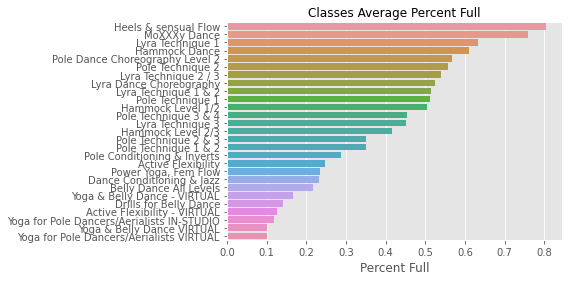

In [ ]:
labels = class_demand.index.to_list()
value =  [10,50,100]
sb.barplot(x=class_demand, y=labels)
sb.set(rc = {'figure.figsize':(17,9)})
plt.title("Classes Average Percent Full")
plt.show()

Heels and Sensual Flow, MoXXY Dance, and Lyra Technique 1 are the three classes with the highest average percent fullnesses. Yoga classes are the lowest three.

All apparatus classes had higher average percent fullnesses than yoga and dance classes. 

To help the owner more clearly visualize and make comparisons using this data, we broke it down into groups based on apparatus. We suggest that the owner prioritize adding more classes with higher percent attendances over ones with lower ones.

Text(0.5, 1.0, 'Pole Class Percent Full')

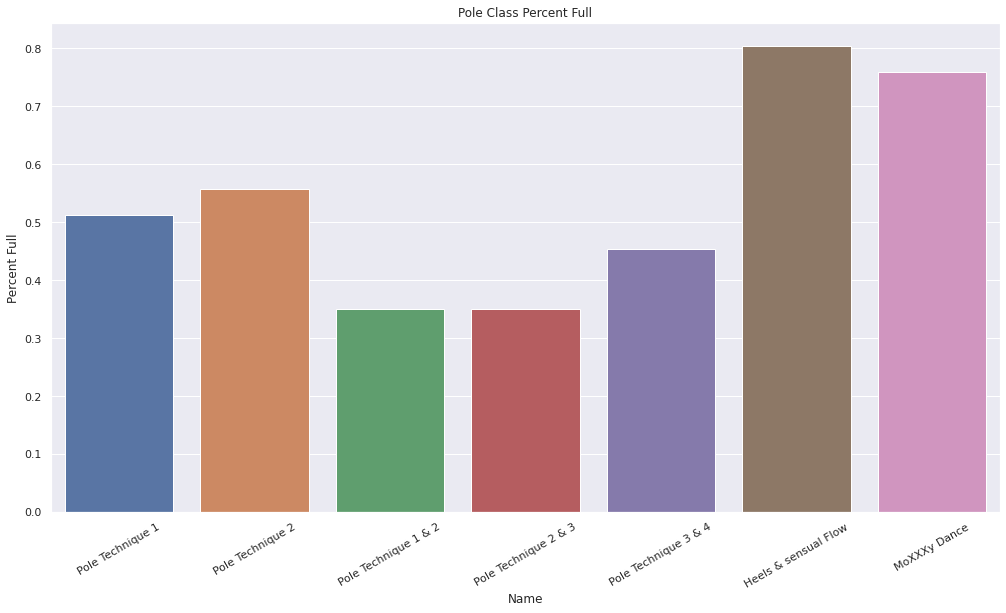

In [ ]:
sb.barplot(x=class_demand.index, y=class_demand, order = ["Pole Technique 1","Pole Technique 2", "Pole Technique 1 & 2", "Pole Technique 2 & 3", "Pole Technique 3 & 4","Heels & sensual Flow", "MoXXXy Dance"])
plt.xticks(rotation=30)
sb.set(rc = {'figure.figsize':(13,5)})
plt.title("Pole Class Percent Full")

Heels and Sensual Flow and Moxxy Dance have the highest percent fullnesses by a sizable margin. Pole Technique 2, then Pole Technique 1, then Pole Technique 3 & 4 have the next. 

Text(0.5, 1.0, 'Lyra Class Percent Full')

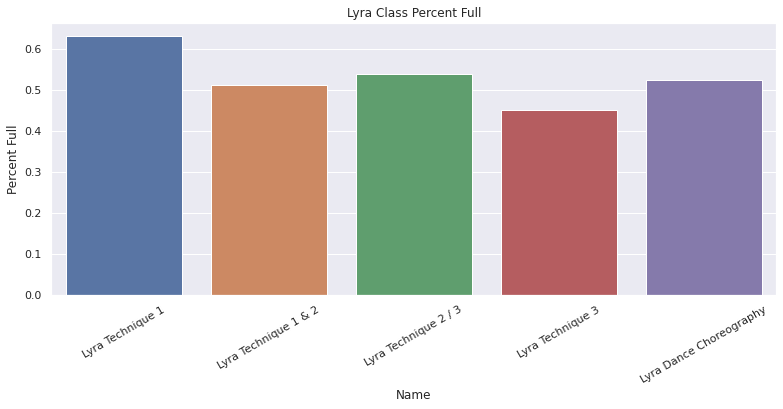

In [ ]:
sb.barplot(x=class_demand.index, y=class_demand, order = ["Lyra Technique 1","Lyra Technique 1 & 2", "Lyra Technique 2 / 3", "Lyra Technique 3", "Lyra Dance Choreography"])
plt.xticks(rotation=30)
plt.title("Lyra Class Percent Full")

Lyra Technique 1 has the highest percent attendance among the lyra classes, and Lyra Technique 3 the lowest. This may mean that there is more interest in beginner lyra classes than advanced ones.

Text(0.5, 1.0, 'Hammock Class Percent Full')

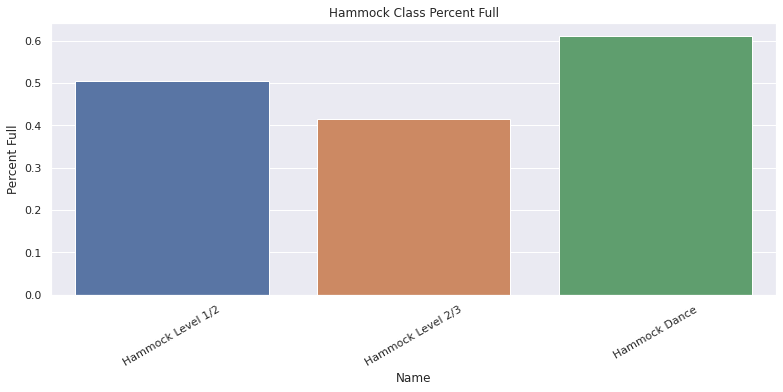

In [ ]:
sb.barplot(x=class_demand.index, y=class_demand, order = ["Hammock Level 1/2","Hammock Level 2/3", "Hammock Dance"])
plt.xticks(rotation=30)
plt.title("Hammock Class Percent Full")

Hammock Dance has the highest percent fullness among the hammock classes. Between the level 1/2 and 2/3, it appears beginner classes are fuller on average than advanced classes.

It's also interesting to see the distribution of percent full values across all classes:

These are the bins:  [0.         0.1025641  0.20512821 0.30769231 0.41025641 0.51282051
 0.61538462 0.71794872 0.82051282 0.92307692 1.02564103 1.12820513
 1.23076923 1.33333333]


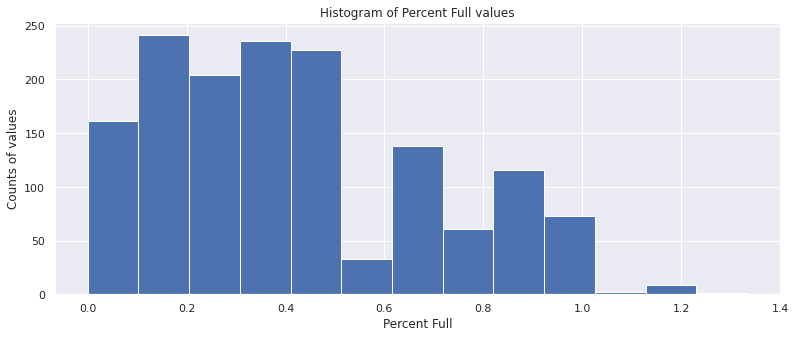

In [ ]:
D = decimal.Decimal
N = 100
data = new_frame['Percent Full']
plt.title("Histogram of Percent Full values")
plt.xlabel("Percent Full")
plt.ylabel("Counts of values")
(n, bins, patches)= plt.hist(data, bins= 13)
print("These are the bins: ", bins)

The histogram is consistent with the printed values above: most classes appear to be slightly less than half full. Full classes are not rare though. A few classes even ended up having teachers manually admit more people than the booking software said was the class size limit.

### Question 2: What Classes are Reaching Full Capacity Most Frequently?

To supplement the findings above on the classes with the highest percent fullnesses, my partner and I thought Moxy's owner might be interested in seeing which classes reached full capacity most frequently.

People register for classes ahead of time. When a class runs out of space, no new people can sign up for it. Though it isn't possible to tell how many people wanted to attend the class but couldn't because it was full, classes that were full potentially indicate times where demand for a certain class exceeded supply. Classes frequently reaching full capacity are great candidates for adding another to the schedule of.

In [ ]:
capacity_reached = frame[frame["Percent Full"] == 1]
capacity_reached.groupby("Name")["Teacher"].count().sort_values(ascending=False)

Name
Heels & sensual Flow               12
MoXXXy Dance                       11
Lyra Technique 2 / 3                9
Lyra Dance Choreography             6
Pole Technique 1                    6
Lyra Technique 1                    5
Pole Dance Choreography Level 2     5
Pole Technique 2                    5
Hammock Level 2/3                   4
Hammock Level 1/2                   3
Lyra Technique 1 & 2                2
Pole Technique 1 & 2                2
Lyra Technique 3                    1
Pole Technique 2 & 3                1
Pole Technique 3 & 4                1
Name: Teacher, dtype: int64

Heels and Sensual Flow and Moxxy Dance had the highest number of times capacity was reached, followed by Lyra Technique 2/3. 

The first two of these had the highest average percent fullnesses above. Both at their fullest and on average days, these classes are in high demand. The owner should prioritze adding these classes to the schedule before all others.

Lyra Technique 2/3 had a lower average percent full than some of the other lyra classes. When it is full, it is full. But on average, it isn't as full as other class variants. The cause of this would be interesting to investigate further.

From personal experience going to this class, I've notcied that 3 women always bring their husband to class with them. This could account for the implied U shaped distribution of class attendance. We don't feel this is as strong of a justification for adding another of the class to the schedule without further comparison of the performance of what it would be replacing or the likeliness of adding the class at a nonpeak time of drawing people in.

### Question 3: Trends in Class Attendance

Text(0.5, 1.0, 'Number of Classes Attended By Month')

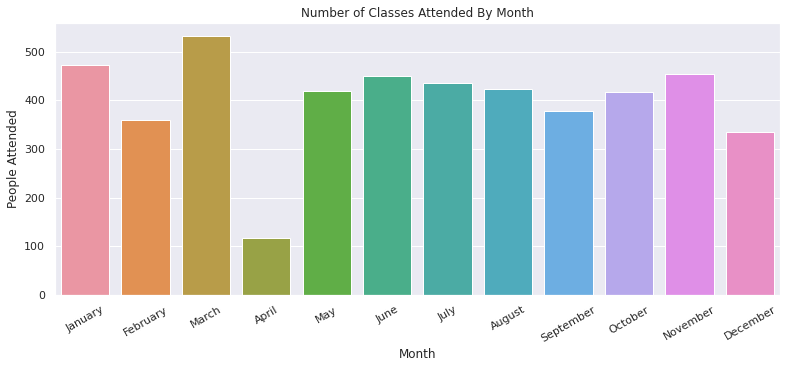

In [ ]:
# Bar graph of monthly attendance (number of people) normalize by number of days
people_attended_month = frame.groupby("Month")["People Attended"].sum()
sb.barplot(x=people_attended_month.index, y = people_attended_month,order=["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.xticks(rotation=30)
plt.title("Number of Classes Attended By Month")

This graph comes with a warning: It shows the raw counts of people attending classes each month. It is not normalized by the number of days in the month. April is low because only half of the month has gone by as of this data's scraping. December is low because the studio closes for 2 weeks surrounding Christmas. February is low because it only has 28 days. Also note that the same person could attend multiple classes during the month.

Knowing that the graph is not normalized, it is still interesting to see how many people are coming raw each month. Moxy's owner might care about this as this is related to the number of class passes/memberships she is selling (since all are sold on a monthly basis.

Text(0.5, 1.0, 'Average Class Percent Full By Month')

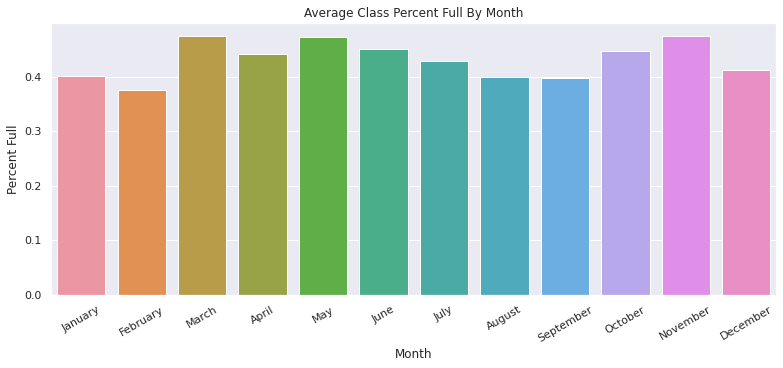

In [ ]:
# Bar graph of monthly attendance (average classes percent full)
# a = frame.groupby("Month")["People Attended"].sum()
# b = frame.groupby("Month")["Capacity"].sum()

# percent_full_monthly = a/b
percent_full_monthly = frame.groupby("Month")["Percent Full"].mean()

sb.barplot(x=percent_full_monthly.index, y = percent_full_monthly,order=["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.xticks(rotation=30)
plt.title("Average Class Percent Full By Month")

THis is an interesting graph. It appears class attendance is lowest during the late summer into fall and in the dead of winter. It is highest in the srping and late fall.

Next, we explored class percent full by weekday:

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

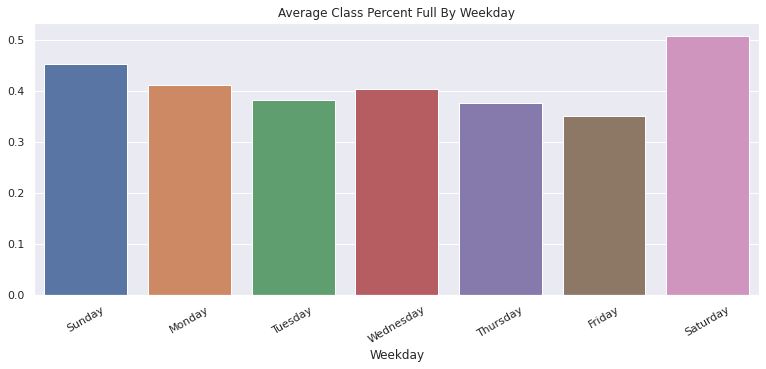

In [ ]:
# Bar graph of attendance (average class percent full) by weekday
a = frame.groupby("Weekday")["People Attended"].sum()
b = frame.groupby("Weekday")["Capacity"].sum()

percent_full_weekday = a/b
labels = ["Sun","Mon","Tues","Wed","Thurs","Fri","Sat"]
#sns.barplot(x=labels, y = percent_full_weekday)
sb.barplot(x=percent_full_weekday.index, y = percent_full_weekday, order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plt.title("Average Class Percent Full By Weekday")
plt.xticks(rotation=30)

Saturday's appear to ahve the highest average attendances, followed by Sundays, Mondays, and Wednesdays. Friday's have the lowest. Days with lower percent attendances either indicate people are busier on those days or the classes offered don't appeal to them as much.

And finally time:

Index(['10:00 AM', '10:15 AM', '10:30 AM', '11:30 AM', '12:00 PM', '1:15 PM',
       '1:30 PM', '3:30 PM', '4:00 PM', '4:15 PM', '5:00 PM', '5:30 PM',
       '6:45 PM', '8:00 PM', '9:00 AM', '9:15 AM'],
      dtype='object', name='Time')


Text(0.5, 1.0, 'Class Percent Full By Timeslot')

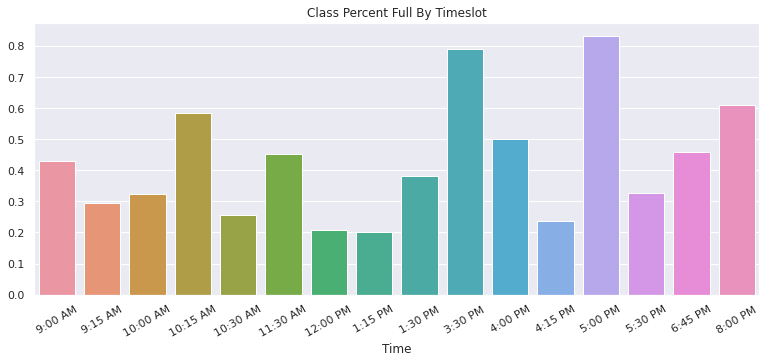

In [ ]:
# Bar graph of attendance (average class percent full) by time
a = frame.groupby("Time")["People Attended"].sum()
b = frame.groupby("Time")["Capacity"].sum()

percent_full_time = a/b
print(percent_full_time.index)
sb.barplot(x=percent_full_time.index, y = percent_full_time, order = ['9:00 AM', '9:15 AM','10:00 AM', '10:15 AM', '10:30 AM', '11:30 AM', '12:00 PM', '1:15 PM',
       '1:30 PM', '3:30 PM', '4:00 PM', '4:15 PM', '5:00 PM', '5:30 PM',
       '6:45 PM', '8:00 PM'])
plt.xticks(rotation=30)
plt.title("Class Percent Full By Timeslot")

## Analysis Methodologies

We chose to use 5 analysis methodologies:
  - PCA (Dimensional Analysis)
    - This was used to find the explained variance ratios in the data and to plot it in 2 dimensions.

Because of the "Free Lunch Theorum" mentioned in the Background Section, we need to use as many machine learning algorithnms as we thought were suitable for the data. 

Out of the five algorithms mentioned in the Background section (linear, decision tree, KNN, SVM, and MLP neural networks), the decision tree is the only one we found not to be suitable for our data.

The reason is because when we cyclically encoded our time based features, we gave time based features two representaions (a cosine and a sine one). Decision Trees work by separating data using a single feature at a time, while the others take into account all features at once. Therefore, since decision trees can not take into account the sine and cosine values simultaneously, they will not work for this problem. 

Also, we decided to use Ridge Regression instead of linear regression Ridge Regression takes into account that fact that certain features in the data are more useful for prediction than others. It reduces the coefficients of the minor features, so it will likely make for a better regressor.

Additionally, we wanted to know whether the algorithms were make their class attendnace predictions based more on the cyclical (time) or categorical data. Because of this, we did regression once on the enire dataset, once on only time based data, and once on the categorical data.

Finally, we used different regularization parameters for all of the regressors to try to optimize them.



In summary, we will be using the following regressors:
  - Support Vector Regression (SVM)
  - Ridge Regression
  - K Nearest Neighbors Regression
  - Multilayer Perceptron Neural Network

## Machine Learning and Dimensional Analysis

In [ ]:
# Copy made so as not to accidentally edit the initial data
copy = new_frame

copy= copy.drop(['Unnamed: 0', 'index','Name','Date', 'Time', 'Weekday', 'Month', 'Teacher', 'Capacity', 'People Attended', 'Room', 'Datetime',
                 'DateTime', 'Day of Month', 'weekday (numerical)', 'weekday_norm', 'month (numerical)', 'month_norm', 'day_of_month_norm'], axis = 1)

y= copy['Percent Full']
X= copy.drop(['Percent Full'], axis= 1)

In [ ]:
### Scaling for PCA and Machine Learning
scaled_copy= StandardScaler().fit_transform(copy)

### PCA

In [ ]:
### PCA to find explained variance ratio

pca = PCA().fit(scaled_copy)
pca_values = pca.transform(scaled_copy)
var_exp = pca.explained_variance_ratio_
print("The explained variance ratio is:", var_exp)

The explained variance ratio is: [7.05307673e-02 5.19288154e-02 4.85467140e-02 4.08966146e-02
 3.79632451e-02 3.62231185e-02 3.44655052e-02 3.32852173e-02
 3.24437450e-02 2.86990487e-02 2.49197547e-02 2.43422964e-02
 2.37711064e-02 2.31230069e-02 2.28243304e-02 2.09209598e-02
 2.04652321e-02 2.03980167e-02 1.98741071e-02 1.96890984e-02
 1.92734083e-02 1.91003519e-02 1.88550701e-02 1.86307963e-02
 1.85153705e-02 1.84369539e-02 1.80489978e-02 1.77060429e-02
 1.74051275e-02 1.72094087e-02 1.70739509e-02 1.64205272e-02
 1.58959207e-02 1.52564803e-02 1.49051282e-02 1.44287360e-02
 1.31059348e-02 1.07135332e-02 9.76390937e-03 8.99544104e-03
 7.68776076e-03 7.10431244e-03 6.29108363e-03 5.93662670e-03
 4.85459117e-03 3.83659008e-03 3.00691479e-03 2.18576795e-03
 2.11312303e-03 1.75790768e-03 1.41314979e-04 3.22171432e-05
 1.39097412e-32 5.25167966e-33 2.92136479e-33 1.98605734e-33]


Text(0.5, 1.0, 'Projection of Data into 2 Dimensions')

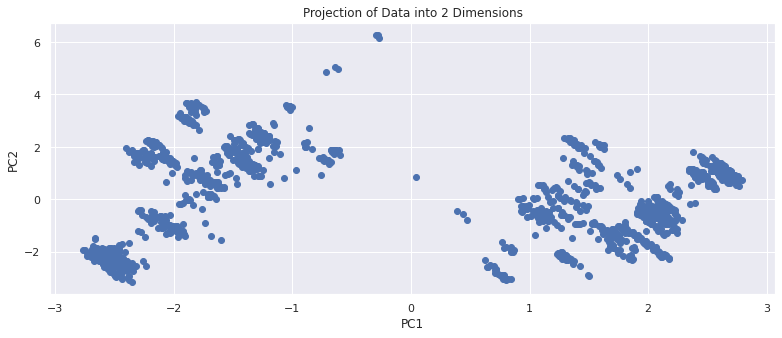

In [ ]:
plt.scatter(pca_values[:, 0], pca_values[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Data into 2 Dimensions')

The plot shown above is all of the data we have projected down into 2 dimensions. The data does not look linearly separated at all, so regressors that can learn complicated patterns in data could do well here. However, this plot is an oversimplication of the data. It shows the two components that have the highest explained variance ratios, but even those two components only take into account roughly 12% of the variance in the data (this number was found by adding the first two numbers in the code that shows all of the explained variance ratios above)

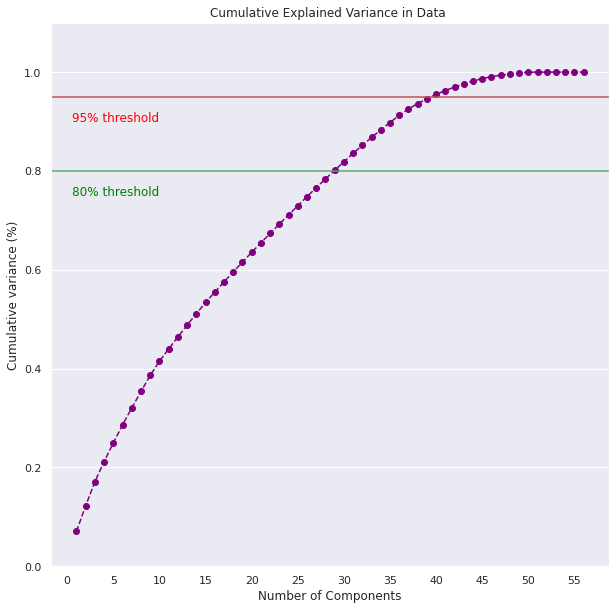

In [ ]:
fig, ax = plt.subplots(figsize= (10,10))
xi = np.arange(1, 57, step=1)
cumSum = np.cumsum(var_exp)

plt.ylim(0.0,1.1)
plt.plot(xi, cumSum, marker= 'o', linestyle= '--', color= 'purple')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 60, step= 5))
plt.ylabel('Cumulative variance (%)')
plt.title('Cumulative Explained Variance in Data ')

plt.axhline(y= 0.95, color= 'r', linestyle= '-')
plt.text(0.5, 0.90, '95% threshold', color = 'red')

plt.axhline(y=0.80, color='g', linestyle='-')
plt.text(0.5, 0.75, '80% threshold', color= 'green')

ax.grid(axis='x')
plt.show()

This graph shows the explained variance ratios added together. The individual dots are not separated very much, which means that one of them are explaining the data's variance very well. It takes about 30 dimensions to explain 80 percent of the variance in the data and about 40 to explain 95 percent.

### Machine Learning with All (both categorical and time) data

In [ ]:
svr_regressor_one_tenth_scale= svm.SVR(C= 0.1, gamma= 'scale')
svr_regressor_one_tenth_auto= svm.SVR(C= 0.1, gamma= 'auto')

svr_regressor_one_fifth_scale= svm.SVR(C= 0.5, gamma= 'scale')
svr_regressor_one_fifth_auto= svm.SVR(C= 0.5, gamma= 'auto')

svr_regressor_one_scale= svm.SVR(C= 1, gamma= 'scale')
svr_regressor_one_auto= svm.SVR(C= 1, gamma= 'auto')

svr_regressor_five_scale= svm.SVR(C= 5, gamma= 'scale')
svr_regressor_five_auto= svm.SVR(C= 5, gamma= 'auto')

svr_regressor_ten_scale= svm.SVR(C= 10, gamma= 'scale')
svr_regressor_ten_auto= svm.SVR(C= 10, gamma= 'auto')


list_of_models = []

list_of_models.append(('Support Vector Machine Model with parameters: (C= 0.1, gamma= "scale")', svr_regressor_one_tenth_scale))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 0.1, gamma= "auto")', svr_regressor_one_tenth_auto))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 0.5, gamma= "scale")', svr_regressor_one_fifth_scale))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 0.5, gamma= "auto")', svr_regressor_one_fifth_auto))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 1, gamma= "scale")', svr_regressor_one_scale))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 1, gamma= "auto")', svr_regressor_one_auto))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 5, gamma= "scale")', svr_regressor_five_scale))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 5, gamma= "auto")', svr_regressor_five_auto))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 10, gamma= "scale")', svr_regressor_ten_scale))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 10, gamma= "auto")', svr_regressor_ten_auto))


results = []
names = []
results_mean= []
results_mean_for_this_regressor= [] # This is the smae as results_mean but the values will not be stored after a regressor is done

for name, model in list_of_models:

    kfold = sklearn.model_selection.KFold()
    cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv= 5, scoring= 'r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: The r^2 value is %f (with a standard deviation of %f)" % (name, cv_results.mean(), cv_results.std())
    results_mean.append((name,cv_results.mean()))
    results_mean_for_this_regressor.append((name,cv_results.mean()))
    print(msg)
    print("List of r^2 values for each fold: ", cv_results)
    print()

Support Vector Machine Model with parameters: (C= 0.1, gamma= "scale"): The r^2 value is 0.338741 (with a standard deviation of 0.044061)
List of r^2 values for each fold:  [0.38402746 0.37119163 0.26144754 0.35625041 0.3207887 ]

Support Vector Machine Model with parameters: (C= 0.1, gamma= "auto"): The r^2 value is 0.260703 (with a standard deviation of 0.044725)
List of r^2 values for each fold:  [0.28620557 0.28925433 0.17198208 0.28369513 0.2723755 ]

Support Vector Machine Model with parameters: (C= 0.5, gamma= "scale"): The r^2 value is 0.362138 (with a standard deviation of 0.033390)
List of r^2 values for each fold:  [0.41666434 0.36504656 0.31161278 0.35583734 0.36152671]

Support Vector Machine Model with parameters: (C= 0.5, gamma= "auto"): The r^2 value is 0.348340 (with a standard deviation of 0.053395)
List of r^2 values for each fold:  [0.38181364 0.37496493 0.24234605 0.36299539 0.37958167]

Support Vector Machine Model with parameters: (C= 1, gamma= "scale"): The r^2 

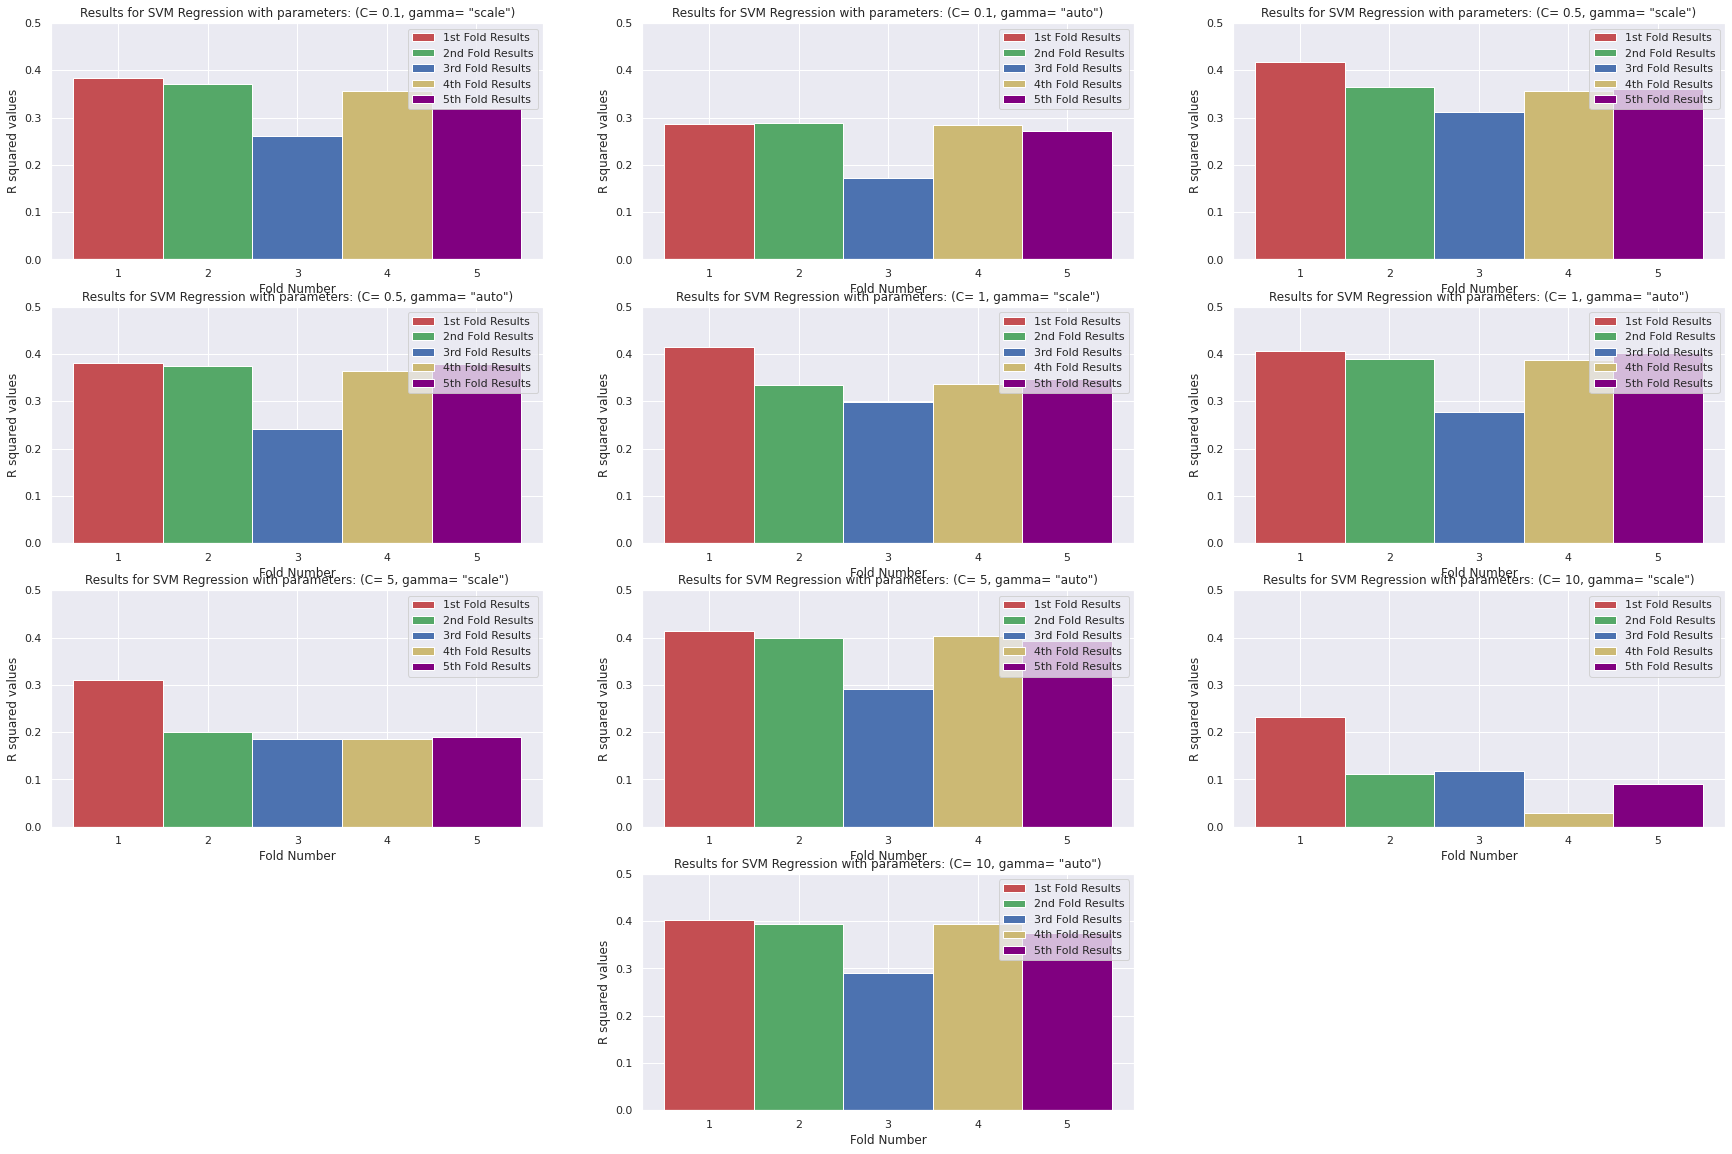

In [ ]:
x= ['1st trial', '2nd trial', '3rd trial', '4th trial', '5th trial', '6th trial', '7th trial', '8th trial', '9th trial', '10th trial']
x= [3]

trial_one_results = results[0]
trial_two_results = results[1]
trial_three_results = results[2]
trial_four_results = results[3]
trial_five_results = results[4]
trial_six_results = results[5]
trial_seven_results = results[6]
trial_eight_results = results[7]
trial_nine_results = results[8]
trial_ten_results = results[9]

ax = plt.subplot(431)
plt.gcf().set_size_inches(30, 20)
red= ax.bar(x[0]-2, trial_one_results[0], width= 1, color= 'r', align='center')
green= ax.bar(x[0]-1, trial_one_results[1], width= 1, color= 'g', align='center')
blue= ax.bar(x[0], trial_one_results[2], width= 1, color= 'b', align='center')
yellow= ax.bar(x[0]+1, trial_one_results[3], width= 1, color= 'y', align='center')
purple= ax.bar(x[0]+2, trial_one_results[4], width= 1, color= 'purple', align='center')
ax.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax.set_ylabel("R squared values")
ax.set_xlabel("Fold Number")
ax.set_title('Results for SVM Regression with parameters: (C= 0.1, gamma= "scale")')
ax.set_ybound([0,0.5])

ax2 = plt.subplot(432)
plt.gcf().set_size_inches(30, 20)
red= ax2.bar(x[0]-2, trial_two_results[0], width= 1, color= 'r', align='center')
green= ax2.bar(x[0]-1, trial_two_results[1], width= 1, color= 'g', align='center')
blue= ax2.bar(x[0], trial_two_results[2], width= 1, color= 'b', align='center')
yellow= ax2.bar(x[0]+1, trial_two_results[3], width= 1, color= 'y', align='center')
purple= ax2.bar(x[0]+2, trial_two_results[4], width= 1, color= 'purple', align='center')
ax2.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax2.set_ylabel("R squared values")
ax2.set_xlabel("Fold Number")
ax2.set_title('Results for SVM Regression with parameters: (C= 0.1, gamma= "auto")')
ax2.set_ybound([0,0.5])

ax3 = plt.subplot(433)
plt.gcf().set_size_inches(30, 20)
red= ax3.bar(x[0]-2, trial_three_results[0], width= 1, color= 'r', align='center')
green= ax3.bar(x[0]-1, trial_three_results[1], width= 1, color= 'g', align='center')
blue= ax3.bar(x[0], trial_three_results[2], width= 1, color= 'b', align='center')
yellow= ax3.bar(x[0]+1, trial_three_results[3], width= 1, color= 'y', align='center')
purple= ax3.bar(x[0]+2, trial_three_results[4], width= 1, color= 'purple', align='center')
ax3.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax3.set_ylabel("R squared values")
ax3.set_xlabel("Fold Number")
ax3.set_title('Results for SVM Regression with parameters: (C= 0.5, gamma= "scale")')
ax3.set_ybound([0,0.5])

ax4 = plt.subplot(434)
plt.gcf().set_size_inches(30, 20)
red= ax4.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax4.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax4.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax4.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax4.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax4.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax4.set_ylabel("R squared values")
ax4.set_xlabel("Fold Number")
ax4.set_title('Results for SVM Regression with parameters: (C= 0.5, gamma= "auto")')
ax4.set_ybound([0,0.5])

ax5 = plt.subplot(435)
plt.gcf().set_size_inches(30, 20)
red= ax5.bar(x[0]-2, trial_five_results[0], width= 1, color= 'r', align='center')
green= ax5.bar(x[0]-1, trial_five_results[1], width= 1, color= 'g', align='center')
blue= ax5.bar(x[0], trial_five_results[2], width= 1, color= 'b', align='center')
yellow= ax5.bar(x[0]+1, trial_five_results[3], width= 1, color= 'y', align='center')
purple= ax5.bar(x[0]+2, trial_five_results[4], width= 1, color= 'purple', align='center')
ax5.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax5.set_ylabel("R squared values")
ax5.set_xlabel("Fold Number")
ax5.set_title('Results for SVM Regression with parameters: (C= 1, gamma= "scale")')
ax5.set_ybound([0,0.5])

ax6 = plt.subplot(436)
plt.gcf().set_size_inches(30, 20)
red= ax6.bar(x[0]-2, trial_six_results[0], width= 1, color= 'r', align='center')
green= ax6.bar(x[0]-1, trial_six_results[1], width= 1, color= 'g', align='center')
blue= ax6.bar(x[0], trial_six_results[2], width= 1, color= 'b', align='center')
yellow= ax6.bar(x[0]+1, trial_six_results[3], width= 1, color= 'y', align='center')
purple= ax6.bar(x[0]+2, trial_six_results[4], width= 1, color= 'purple', align='center')
ax6.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax6.set_ylabel("R squared values")
ax6.set_xlabel("Fold Number")
ax6.set_title('Results for SVM Regression with parameters: (C= 1, gamma= "auto")')
ax6.set_ybound([0,0.5])

ax7 = plt.subplot(437)
plt.gcf().set_size_inches(30, 20)
red= ax7.bar(x[0]-2, trial_seven_results[0], width= 1, color= 'r', align='center')
green= ax7.bar(x[0]-1, trial_seven_results[1], width= 1, color= 'g', align='center')
blue= ax7.bar(x[0], trial_seven_results[2], width= 1, color= 'b', align='center')
yellow= ax7.bar(x[0]+1, trial_seven_results[3], width= 1, color= 'y', align='center')
purple= ax7.bar(x[0]+2, trial_seven_results[4], width= 1, color= 'purple', align='center')
ax7.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax7.set_ylabel("R squared values")
ax7.set_xlabel("Fold Number")
ax7.set_title('Results for SVM Regression with parameters: (C= 5, gamma= "scale")')
ax7.set_ybound([0,0.5])

ax8 = plt.subplot(438)
plt.gcf().set_size_inches(30, 20)
red= ax8.bar(x[0]-2, trial_eight_results[0], width= 1, color= 'r', align='center')
green= ax8.bar(x[0]-1, trial_eight_results[1], width= 1, color= 'g', align='center')
blue= ax8.bar(x[0], trial_eight_results[2], width= 1, color= 'b', align='center')
yellow= ax8.bar(x[0]+1, trial_eight_results[3], width= 1, color= 'y', align='center')
purple= ax8.bar(x[0]+2, trial_eight_results[4], width= 1, color= 'purple', align='center')
ax8.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax8.set_ylabel("R squared values")
ax8.set_xlabel("Fold Number")
ax8.set_title('Results for SVM Regression with parameters: (C= 5, gamma= "auto")')
ax8.set_ybound([0,0.5])

ax9 = plt.subplot(439)
plt.gcf().set_size_inches(30, 20)
red= ax9.bar(x[0]-2, trial_nine_results[0], width= 1, color= 'r', align='center')
green= ax9.bar(x[0]-1, trial_nine_results[1], width= 1, color= 'g', align='center')
blue= ax9.bar(x[0], trial_nine_results[2], width= 1, color= 'b', align='center')
yellow= ax9.bar(x[0]+1, trial_nine_results[3], width= 1, color= 'y', align='center')
purple= ax9.bar(x[0]+2, trial_nine_results[4], width= 1, color= 'purple', align='center')
ax9.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax9.set_ylabel("R squared values")
ax9.set_xlabel("Fold Number")
ax9.set_title('Results for SVM Regression with parameters: (C= 10, gamma= "scale")')
ax9.set_ybound([0,0.5])

ax10 = plt.subplot(4,3,11)
plt.gcf().set_size_inches(30, 20)
red= ax10.bar(x[0]-2, trial_ten_results[0], width= 1, color= 'r', align='center')
green= ax10.bar(x[0]-1, trial_ten_results[1], width= 1, color= 'g', align='center')
blue= ax10.bar(x[0], trial_ten_results[2], width= 1, color= 'b', align='center')
yellow= ax10.bar(x[0]+1, trial_ten_results[3], width= 1, color= 'y', align='center')
purple= ax10.bar(x[0]+2, trial_ten_results[4], width= 1, color= 'purple', align='center')
ax10.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax10.set_ylabel("R squared values")
ax10.set_xlabel("Fold Number")
ax10.set_title('Results for SVM Regression with parameters: (C= 10, gamma= "auto")')
ax10.set_ybound([0,0.5])

In [ ]:
results_mean_for_this_regressor

[('Support Vector Machine Model with parameters: (C= 0.1, gamma= "scale")',
  0.3387411485497244),
 ('Support Vector Machine Model with parameters: (C= 0.1, gamma= "auto")',
  0.2607025225545877),
 ('Support Vector Machine Model with parameters: (C= 0.5, gamma= "scale")',
  0.36213754583349933),
 ('Support Vector Machine Model with parameters: (C= 0.5, gamma= "auto")',
  0.3483403341700223),
 ('Support Vector Machine Model with parameters: (C= 1, gamma= "scale")',
  0.34664074610432694),
 ('Support Vector Machine Model with parameters: (C= 1, gamma= "auto")',
  0.3727543048787886),
 ('Support Vector Machine Model with parameters: (C= 5, gamma= "scale")',
  0.21428421353132485),
 ('Support Vector Machine Model with parameters: (C= 5, gamma= "auto")',
  0.37963166480198174),
 ('Support Vector Machine Model with parameters: (C= 10, gamma= "scale")',
  0.11606541628252291),
 ('Support Vector Machine Model with parameters: (C= 10, gamma= "auto")',
  0.3712665439783521)]

This plot above shows the r^2 values the SVM regressor were able to achieve with all of the data on each fold. The Support Vector Machine Model with parameters: (C= 5, gamma= "auto") had the highest r^2 value out of them all, with r^2 = 0.3796

In [ ]:
ridge_regressor_one_tenth= Ridge(alpha= 0.1)
ridge_regressor_one_fifth= Ridge(alpha= 0.5)
ridge_regressor_one= Ridge(alpha= 1)
ridge_regressor_five= Ridge(alpha= 5)
ridge_regressor_ten= Ridge(alpha= 10)


list_of_models = []

list_of_models.append(('Ridge Regression Model with parameter: (alpha= 0.1)', ridge_regressor_one_tenth))
list_of_models.append(('Ridge Regression Model with parameter: (alpha= 0.5)', ridge_regressor_one_fifth))
list_of_models.append(('Ridge Regression Model with parameter: (alpha= 1)', ridge_regressor_one))
list_of_models.append(('Ridge Regression Model with parameter: (alpha= 5)', ridge_regressor_five))
list_of_models.append(('Ridge Regression Model with parameter: (alpha= 10)', ridge_regressor_ten))


results = []
names = []
results_mean_for_this_regressor = []

for name, model in list_of_models:

    kfold = sklearn.model_selection.KFold()
    cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv= 5, scoring= 'r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: The r^2 value is %f (with a standard deviation of %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    results_mean.append((name,cv_results.mean()))
    results_mean_for_this_regressor.append((name,cv_results.mean()))
    print("List of r^2 values for each fold: ", cv_results)
    print()

Ridge Regression Model with parameter: (alpha= 0.1): The r^2 value is 0.361893 (with a standard deviation of 0.046286)
List of r^2 values for each fold:  [0.41464207 0.34776393 0.28279799 0.40022544 0.36403437]

Ridge Regression Model with parameter: (alpha= 0.5): The r^2 value is 0.365690 (with a standard deviation of 0.048747)
List of r^2 values for each fold:  [0.41694596 0.34850305 0.27947893 0.40090489 0.38261551]

Ridge Regression Model with parameter: (alpha= 1): The r^2 value is 0.366106 (with a standard deviation of 0.050209)
List of r^2 values for each fold:  [0.4162462  0.34841523 0.27628311 0.4004343  0.38915143]

Ridge Regression Model with parameter: (alpha= 5): The r^2 value is 0.362608 (with a standard deviation of 0.053701)
List of r^2 values for each fold:  [0.41566145 0.34482924 0.26583734 0.3893126  0.39739883]

Ridge Regression Model with parameter: (alpha= 10): The r^2 value is 0.356512 (with a standard deviation of 0.053874)
List of r^2 values for each fold:  [0.

Text(0.5, 1.0, 'Results for Ridge Regression with alpha= 10')

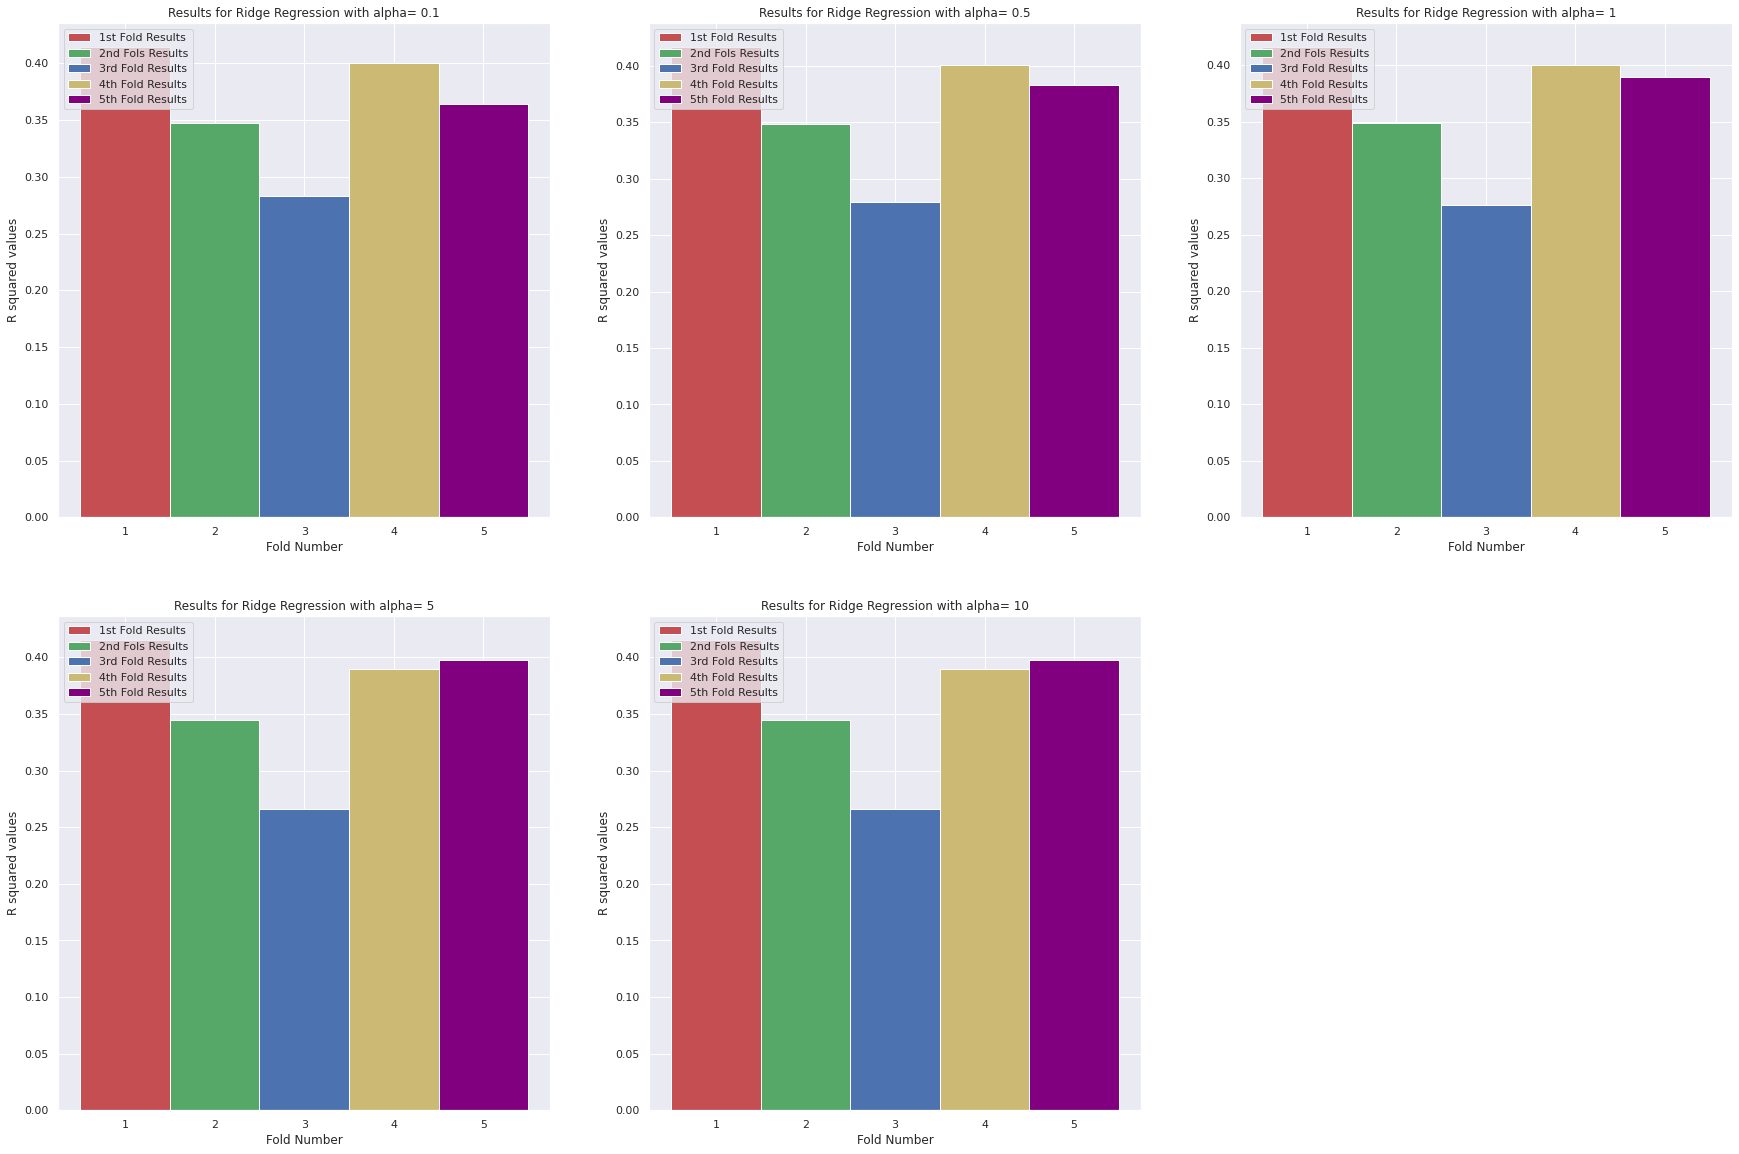

In [ ]:
x= ['1st trial', '2nd trial', '3rd trial', '4th trial', '5th trial']
x= [3]

trial_one_results = results[0]
trial_two_results = results[1]
trial_three_results = results[2]
trial_four_results = results[3]
trial_five_results = results[4]

ax = plt.subplot(231)
plt.gcf().set_size_inches(30, 20)
red= ax.bar(x[0]-2, trial_one_results[0], width= 1, color= 'r', align='center')
green= ax.bar(x[0]-1, trial_one_results[1], width= 1, color= 'g', align='center')
blue= ax.bar(x[0], trial_one_results[2], width= 1, color= 'b', align='center')
yellow= ax.bar(x[0]+1, trial_one_results[3], width= 1, color= 'y', align='center')
purple= ax.bar(x[0]+2, trial_one_results[4], width= 1, color= 'purple', align='center')
ax.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax.set_ylabel("R squared values")
ax.set_xlabel("Fold Number")
ax.set_title("Results for Ridge Regression with alpha= 0.1")

ax2 = plt.subplot(232)
plt.gcf().set_size_inches(30, 20)
red= ax2.bar(x[0]-2, trial_two_results[0], width= 1, color= 'r', align='center')
green= ax2.bar(x[0]-1, trial_two_results[1], width= 1, color= 'g', align='center')
blue= ax2.bar(x[0], trial_two_results[2], width= 1, color= 'b', align='center')
yellow= ax2.bar(x[0]+1, trial_two_results[3], width= 1, color= 'y', align='center')
purple= ax2.bar(x[0]+2, trial_two_results[4], width= 1, color= 'purple', align='center')
ax2.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax2.set_ylabel("R squared values")
ax2.set_xlabel("Fold Number")
ax2.set_title("Results for Ridge Regression with alpha= 0.5")

ax3 = plt.subplot(233)
plt.gcf().set_size_inches(30, 20)
red= ax3.bar(x[0]-2, trial_three_results[0], width= 1, color= 'r', align='center')
green= ax3.bar(x[0]-1, trial_three_results[1], width= 1, color= 'g', align='center')
blue= ax3.bar(x[0], trial_three_results[2], width= 1, color= 'b', align='center')
yellow= ax3.bar(x[0]+1, trial_three_results[3], width= 1, color= 'y', align='center')
purple= ax3.bar(x[0]+2, trial_three_results[4], width= 1, color= 'purple', align='center')
ax3.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax3.set_ylabel("R squared values")
ax3.set_xlabel("Fold Number")
ax3.set_title("Results for Ridge Regression with alpha= 1")

ax4 = plt.subplot(234)
plt.gcf().set_size_inches(30, 20)
red= ax4.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax4.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax4.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax4.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax4.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax4.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax4.set_ylabel("R squared values")
ax4.set_xlabel("Fold Number")
ax4.set_title("Results for Ridge Regression with alpha= 5")

ax5 = plt.subplot(235)
plt.gcf().set_size_inches(30, 20)
red= ax5.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax5.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax5.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax5.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax5.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax5.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax5.set_ylabel("R squared values")
ax5.set_xlabel("Fold Number")
ax5.set_title("Results for Ridge Regression with alpha= 10")

In [ ]:
results_mean_for_this_regressor

[('Ridge Regression Model with parameter: (alpha= 0.1)', 0.3618927604657685),
 ('Ridge Regression Model with parameter: (alpha= 0.5)', 0.3656896694846674),
 ('Ridge Regression Model with parameter: (alpha= 1)', 0.36610605233187943),
 ('Ridge Regression Model with parameter: (alpha= 5)', 0.362607893394407),
 ('Ridge Regression Model with parameter: (alpha= 10)', 0.3565120870527233)]

This plot above shows the r^2 values the Ridge Regressors were able to achieve with all of the data on each fold. The Ridge Regression Model with parameter: (alpha= 1) had the highest r^2 value out of them all, with r^2 = 0.3661

In [ ]:
knn_regressor_three_uniform= KNeighborsRegressor(n_neighbors= 3, weights= 'uniform')
knn_regressor_three_dist= KNeighborsRegressor(n_neighbors= 3, weights= 'distance')

knn_regressor_five_uniform= KNeighborsRegressor(n_neighbors= 5, weights= 'uniform')
knn_regressor_five_dist= KNeighborsRegressor(n_neighbors= 5, weights= 'distance')

knn_regressor_seven_uniform= KNeighborsRegressor(n_neighbors= 7, weights= 'uniform')
knn_regressor_seven_dist= KNeighborsRegressor(n_neighbors= 7, weights= 'distance')

knn_regressor_nine_uniform= KNeighborsRegressor(n_neighbors= 9, weights= 'uniform')
knn_regressor_nine_dist= KNeighborsRegressor(n_neighbors= 9, weights= 'distance')


list_of_models = []

list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 3, weights= "uniform")', knn_regressor_three_uniform))
list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 3, weights= "dist")', knn_regressor_three_dist))

list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 5, weights= "uniform")', knn_regressor_five_uniform))
list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 5, weights= "dist")', knn_regressor_five_dist))

list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 7, weights= "uniform")', knn_regressor_seven_uniform))
list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 7, weights= "dist")', knn_regressor_seven_dist))

list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 9, weights= "uniform")', knn_regressor_nine_uniform))
list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 9, weights= "dist")', knn_regressor_nine_dist))

results = []
names = []
results_mean_for_this_regressor = []

for name, model in list_of_models:

    kfold = sklearn.model_selection.KFold()
    cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv= 5, scoring= 'r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: The r^2 value is %f (with a standard deviation of %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    results_mean.append((name,cv_results.mean()))
    results_mean_for_this_regressor.append((name,cv_results.mean()))
    print("List of r^2 values for each fold: ", cv_results)
    print()

KNN Regression Model with parameters: (n_neighbors= 3, weights= "uniform"): The r^2 value is 0.252786 (with a standard deviation of 0.034943)
List of r^2 values for each fold:  [0.30376565 0.20350484 0.22544048 0.26493777 0.2662825 ]

KNN Regression Model with parameters: (n_neighbors= 3, weights= "dist"): The r^2 value is 0.263976 (with a standard deviation of 0.035415)
List of r^2 values for each fold:  [0.31087206 0.20746501 0.24527891 0.28613549 0.27012841]

KNN Regression Model with parameters: (n_neighbors= 5, weights= "uniform"): The r^2 value is 0.311153 (with a standard deviation of 0.048432)
List of r^2 values for each fold:  [0.36781339 0.26175791 0.24594807 0.3315247  0.34872303]

KNN Regression Model with parameters: (n_neighbors= 5, weights= "dist"): The r^2 value is 0.319063 (with a standard deviation of 0.044369)
List of r^2 values for each fold:  [0.37007185 0.2671352  0.2643369  0.34780039 0.34596915]

KNN Regression Model with parameters: (n_neighbors= 7, weights= "u

Text(0.5, 1.0, 'Results for KNN Regression with parameters: (n_neighbors= 9, weights= "dist")')

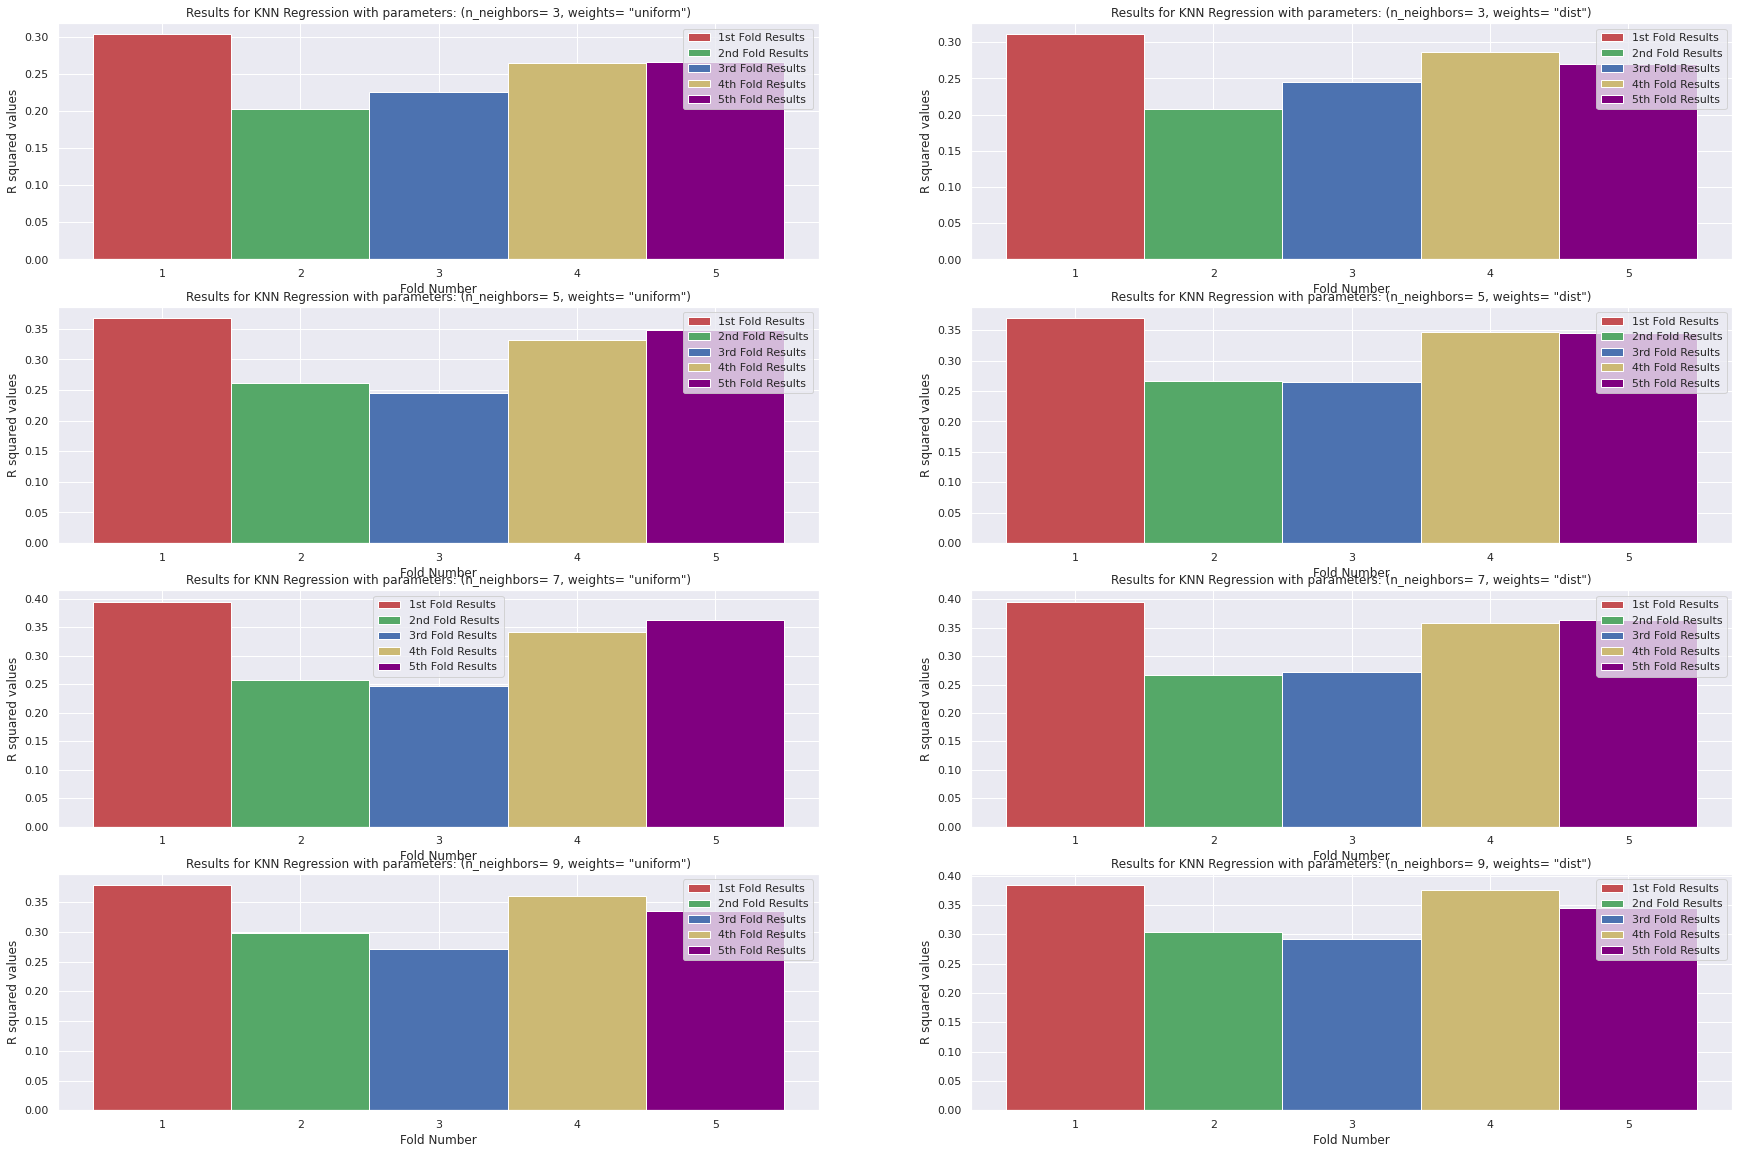

In [ ]:
x= ['1st trial', '2nd trial', '3rd trial', '4th trial', '5th trial', '6th trial', '7th trial', '8th trial']
x= [3]

trial_one_results = results[0]
trial_two_results = results[1]
trial_three_results = results[2]
trial_four_results = results[3]
trial_five_results = results[4]
trial_six_results = results[5]
trial_seven_results = results[6]
trial_eight_results = results[7]

ax = plt.subplot(421)
plt.gcf().set_size_inches(30, 20)
red= ax.bar(x[0]-2, trial_one_results[0], width= 1, color= 'r', align='center')
green= ax.bar(x[0]-1, trial_one_results[1], width= 1, color= 'g', align='center')
blue= ax.bar(x[0], trial_one_results[2], width= 1, color= 'b', align='center')
yellow= ax.bar(x[0]+1, trial_one_results[3], width= 1, color= 'y', align='center')
purple= ax.bar(x[0]+2, trial_one_results[4], width= 1, color= 'purple', align='center')
ax.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax.set_ylabel("R squared values")
ax.set_xlabel("Fold Number")
ax.set_title('Results for KNN Regression with parameters: (n_neighbors= 3, weights= "uniform")')

ax2 = plt.subplot(422)
plt.gcf().set_size_inches(30, 20)
red= ax2.bar(x[0]-2, trial_two_results[0], width= 1, color= 'r', align='center')
green= ax2.bar(x[0]-1, trial_two_results[1], width= 1, color= 'g', align='center')
blue= ax2.bar(x[0], trial_two_results[2], width= 1, color= 'b', align='center')
yellow= ax2.bar(x[0]+1, trial_two_results[3], width= 1, color= 'y', align='center')
purple= ax2.bar(x[0]+2, trial_two_results[4], width= 1, color= 'purple', align='center')
ax2.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax2.set_ylabel("R squared values")
ax2.set_xlabel("Fold Number")
ax2.set_title('Results for KNN Regression with parameters: (n_neighbors= 3, weights= "dist")')

ax3 = plt.subplot(423)
plt.gcf().set_size_inches(30, 20)
red= ax3.bar(x[0]-2, trial_three_results[0], width= 1, color= 'r', align='center')
green= ax3.bar(x[0]-1, trial_three_results[1], width= 1, color= 'g', align='center')
blue= ax3.bar(x[0], trial_three_results[2], width= 1, color= 'b', align='center')
yellow= ax3.bar(x[0]+1, trial_three_results[3], width= 1, color= 'y', align='center')
purple= ax3.bar(x[0]+2, trial_three_results[4], width= 1, color= 'purple', align='center')
ax3.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax3.set_ylabel("R squared values")
ax3.set_xlabel("Fold Number")
ax3.set_title('Results for KNN Regression with parameters: (n_neighbors= 5, weights= "uniform")')

ax4 = plt.subplot(424)
plt.gcf().set_size_inches(30, 20)
red= ax4.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax4.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax4.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax4.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax4.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax4.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax4.set_ylabel("R squared values")
ax4.set_xlabel("Fold Number")
ax4.set_title('Results for KNN Regression with parameters: (n_neighbors= 5, weights= "dist")')

ax5 = plt.subplot(425)
plt.gcf().set_size_inches(30, 20)
red= ax5.bar(x[0]-2, trial_five_results[0], width= 1, color= 'r', align='center')
green= ax5.bar(x[0]-1, trial_five_results[1], width= 1, color= 'g', align='center')
blue= ax5.bar(x[0], trial_five_results[2], width= 1, color= 'b', align='center')
yellow= ax5.bar(x[0]+1, trial_five_results[3], width= 1, color= 'y', align='center')
purple= ax5.bar(x[0]+2, trial_five_results[4], width= 1, color= 'purple', align='center')
ax5.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax5.set_ylabel("R squared values")
ax5.set_xlabel("Fold Number")
ax5.set_title('Results for KNN Regression with parameters: (n_neighbors= 7, weights= "uniform")')

ax6 = plt.subplot(426)
plt.gcf().set_size_inches(30, 20)
red= ax6.bar(x[0]-2, trial_six_results[0], width= 1, color= 'r', align='center')
green= ax6.bar(x[0]-1, trial_six_results[1], width= 1, color= 'g', align='center')
blue= ax6.bar(x[0], trial_six_results[2], width= 1, color= 'b', align='center')
yellow= ax6.bar(x[0]+1, trial_six_results[3], width= 1, color= 'y', align='center')
purple= ax6.bar(x[0]+2, trial_six_results[4], width= 1, color= 'purple', align='center')
ax6.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax6.set_ylabel("R squared values")
ax6.set_xlabel("Fold Number")
ax6.set_title('Results for KNN Regression with parameters: (n_neighbors= 7, weights= "dist")')

ax7 = plt.subplot(427)
plt.gcf().set_size_inches(30, 20)
red= ax7.bar(x[0]-2, trial_seven_results[0], width= 1, color= 'r', align='center')
green= ax7.bar(x[0]-1, trial_seven_results[1], width= 1, color= 'g', align='center')
blue= ax7.bar(x[0], trial_seven_results[2], width= 1, color= 'b', align='center')
yellow= ax7.bar(x[0]+1, trial_seven_results[3], width= 1, color= 'y', align='center')
purple= ax7.bar(x[0]+2, trial_seven_results[4], width= 1, color= 'purple', align='center')
ax7.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax7.set_ylabel("R squared values")
ax7.set_xlabel("Fold Number")
ax7.set_title('Results for KNN Regression with parameters: (n_neighbors= 9, weights= "uniform")')

ax8 = plt.subplot(428)
plt.gcf().set_size_inches(30, 20)
red= ax8.bar(x[0]-2, trial_eight_results[0], width= 1, color= 'r', align='center')
green= ax8.bar(x[0]-1, trial_eight_results[1], width= 1, color= 'g', align='center')
blue= ax8.bar(x[0], trial_eight_results[2], width= 1, color= 'b', align='center')
yellow= ax8.bar(x[0]+1, trial_eight_results[3], width= 1, color= 'y', align='center')
purple= ax8.bar(x[0]+2, trial_eight_results[4], width= 1, color= 'purple', align='center')
ax8.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax8.set_ylabel("R squared values")
ax8.set_xlabel("Fold Number")
ax8.set_title('Results for KNN Regression with parameters: (n_neighbors= 9, weights= "dist")')

In [ ]:
results_mean_for_this_regressor

[('KNN Regression Model with parameters: (n_neighbors= 3, weights= "uniform")',
  0.25278624882676215),
 ('KNN Regression Model with parameters: (n_neighbors= 3, weights= "dist")',
  0.2639759765008381),
 ('KNN Regression Model with parameters: (n_neighbors= 5, weights= "uniform")',
  0.3111534198863322),
 ('KNN Regression Model with parameters: (n_neighbors= 5, weights= "dist")',
  0.31906269834391393),
 ('KNN Regression Model with parameters: (n_neighbors= 7, weights= "uniform")',
  0.32044632183700045),
 ('KNN Regression Model with parameters: (n_neighbors= 7, weights= "dist")',
  0.3315887775920879),
 ('KNN Regression Model with parameters: (n_neighbors= 9, weights= "uniform")',
  0.3285592179381144),
 ('KNN Regression Model with parameters: (n_neighbors= 9, weights= "dist")',
  0.3398152524409498)]

This plot above shows the r^2 values the KNN Regressors were able to achieve with all of the data on each fold. The KNN Regression Model with parameters: (n_neighbors= 9, weights= "dist") had the highest r^2 value out of them all, with r^2 = 0.0.3398.

In [ ]:
nn_one_millionth= MLPRegressor(alpha= 0.000001, random_state= 42)
nn_hundred_thousandth= MLPRegressor(alpha= 0.00001, random_state= 42)
nn_ten_thousandth= MLPRegressor(alpha= 0.0001, random_state= 42)
nn_one_thousandth= MLPRegressor(alpha= 0.001, random_state= 42)
nn_one_hundredth= MLPRegressor(alpha= 0.01, random_state= 42)

list_of_models = []

list_of_models.append(('MLP Neural Network Model with parameters: (alpha= 0.000001, random_state= 42)', nn_one_millionth))
list_of_models.append(('MLP Neural Network Model with parameters: (alpha= 0.00001, random_state= 42)', nn_hundred_thousandth))
list_of_models.append(('MLP Neural Network Model with parameters: (alpha= 0.0001, random_state= 42)', nn_ten_thousandth))
list_of_models.append(('MLP Neural Network Model with parameters: (alpha= 0.001, random_state= 42)', nn_one_thousandth))
list_of_models.append(('MLP Neural Network Model with parameters: (alpha= 0.01, random_state= 42)', nn_one_hundredth))

results = []
names = []
results_mean_for_this_regressor= []

for name, model in list_of_models:

    kfold = sklearn.model_selection.KFold()
    cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv= 5, scoring= 'r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: The r^2 value is %f (with a standard deviation of %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    results_mean.append((name,cv_results.mean()))
    results_mean_for_this_regressor.append((name,cv_results.mean()))
    print("List of r^2 values for each fold: ", cv_results)
    print()

MLP Neural Network Model with parameters: (alpha= 0.000001, random_state= 42): The r^2 value is 0.305382 (with a standard deviation of 0.041925)
List of r^2 values for each fold:  [0.35863473 0.30763056 0.24457481 0.3414711  0.27459742]

MLP Neural Network Model with parameters: (alpha= 0.00001, random_state= 42): The r^2 value is 0.306289 (with a standard deviation of 0.046160)
List of r^2 values for each fold:  [0.37973368 0.30636075 0.24754886 0.32805432 0.26974534]

MLP Neural Network Model with parameters: (alpha= 0.0001, random_state= 42): The r^2 value is 0.308124 (with a standard deviation of 0.049412)
List of r^2 values for each fold:  [0.38290893 0.30342557 0.24764999 0.34132817 0.2653076 ]

MLP Neural Network Model with parameters: (alpha= 0.001, random_state= 42): The r^2 value is 0.306599 (with a standard deviation of 0.041084)
List of r^2 values for each fold:  [0.36583556 0.30662427 0.25347507 0.33585103 0.27120857]

MLP Neural Network Model with parameters: (alpha= 0.01

Text(0.5, 1.0, 'Results for MLP with alpha= 0.01')

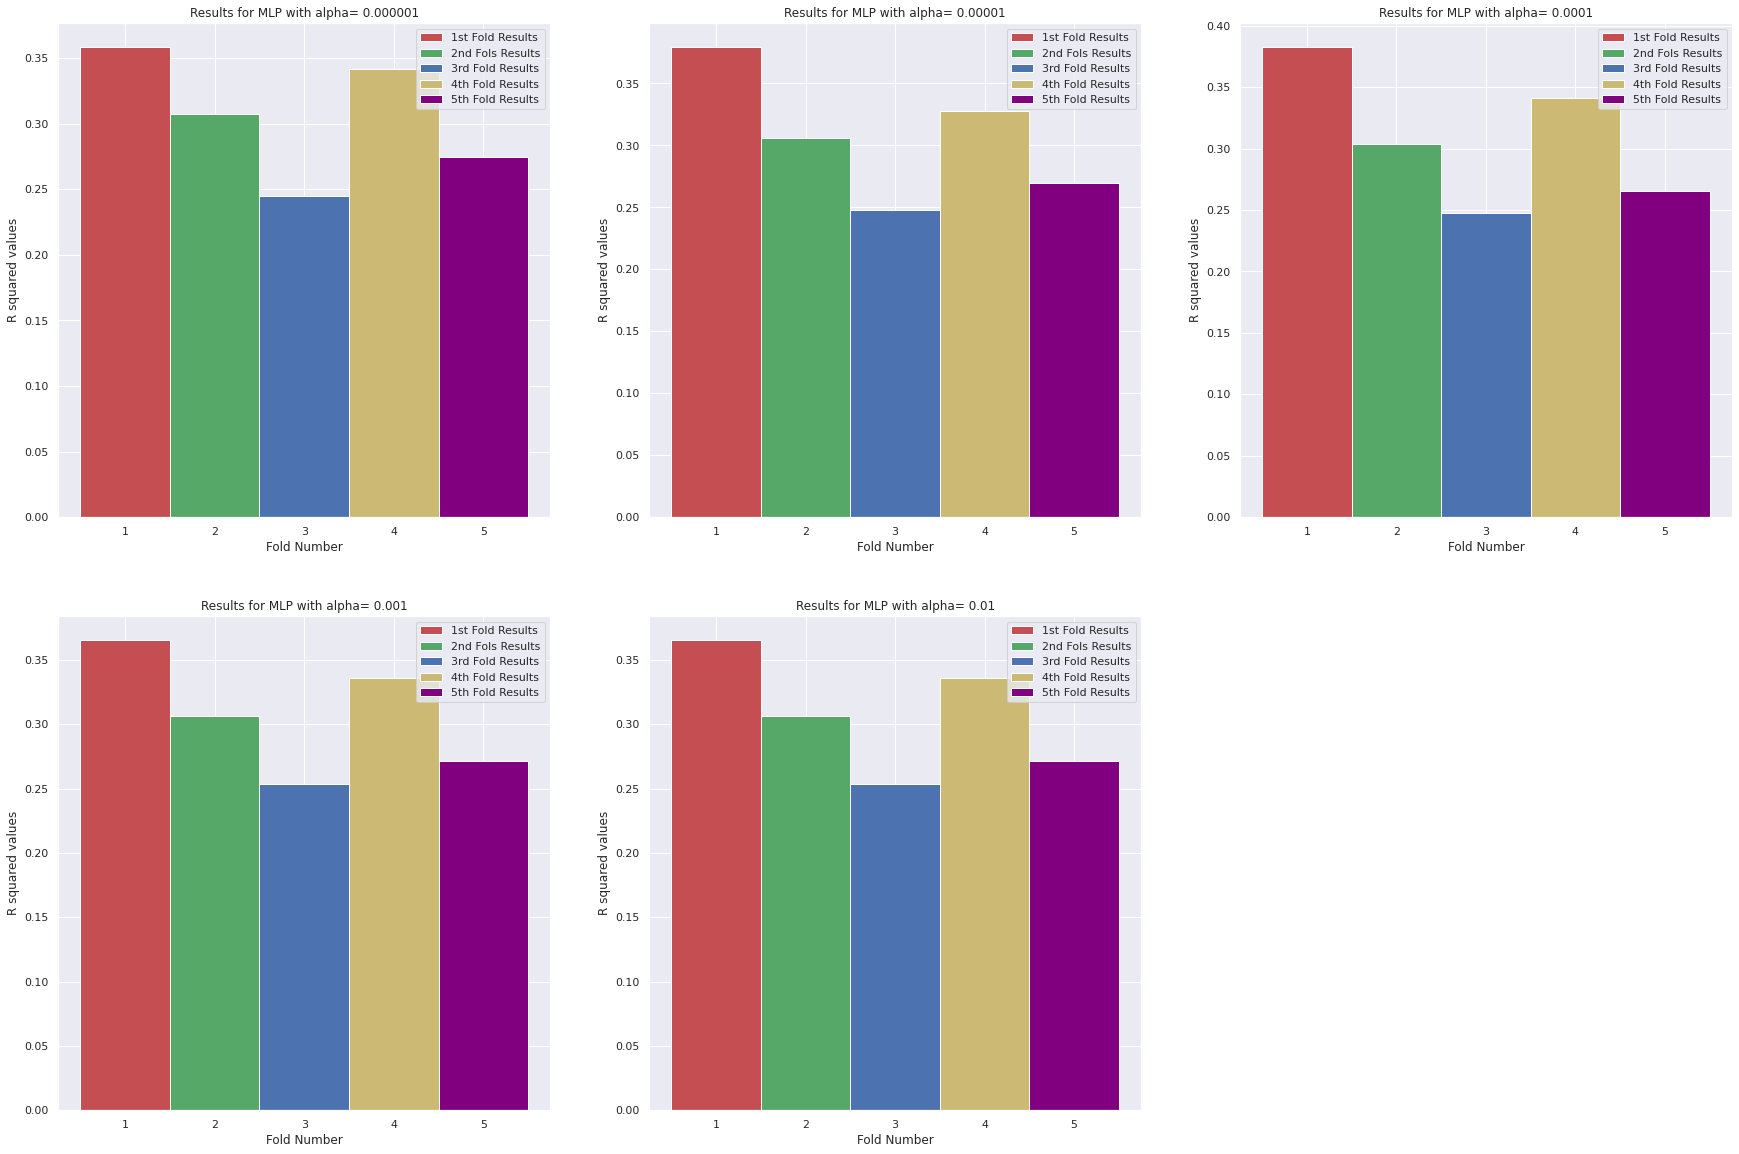

In [ ]:
x= ['1st trial', '2nd trial', '3rd trial', '4th trial', '5th trial']
x= [3]

trial_one_results = results[0]
trial_two_results = results[1]
trial_three_results = results[2]
trial_four_results = results[3]
trial_five_results = results[4]

ax = plt.subplot(231)
plt.gcf().set_size_inches(30, 20)
red= ax.bar(x[0]-2, trial_one_results[0], width= 1, color= 'r', align='center')
green= ax.bar(x[0]-1, trial_one_results[1], width= 1, color= 'g', align='center')
blue= ax.bar(x[0], trial_one_results[2], width= 1, color= 'b', align='center')
yellow= ax.bar(x[0]+1, trial_one_results[3], width= 1, color= 'y', align='center')
purple= ax.bar(x[0]+2, trial_one_results[4], width= 1, color= 'purple', align='center')
ax.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax.set_ylabel("R squared values")
ax.set_xlabel("Fold Number")
ax.set_title("Results for MLP with alpha= 0.000001")

ax2 = plt.subplot(232)
plt.gcf().set_size_inches(30, 20)
red= ax2.bar(x[0]-2, trial_two_results[0], width= 1, color= 'r', align='center')
green= ax2.bar(x[0]-1, trial_two_results[1], width= 1, color= 'g', align='center')
blue= ax2.bar(x[0], trial_two_results[2], width= 1, color= 'b', align='center')
yellow= ax2.bar(x[0]+1, trial_two_results[3], width= 1, color= 'y', align='center')
purple= ax2.bar(x[0]+2, trial_two_results[4], width= 1, color= 'purple', align='center')
ax2.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax2.set_ylabel("R squared values")
ax2.set_xlabel("Fold Number")
ax2.set_title("Results for MLP with alpha= 0.00001")

ax3 = plt.subplot(233)
plt.gcf().set_size_inches(30, 20)
red= ax3.bar(x[0]-2, trial_three_results[0], width= 1, color= 'r', align='center')
green= ax3.bar(x[0]-1, trial_three_results[1], width= 1, color= 'g', align='center')
blue= ax3.bar(x[0], trial_three_results[2], width= 1, color= 'b', align='center')
yellow= ax3.bar(x[0]+1, trial_three_results[3], width= 1, color= 'y', align='center')
purple= ax3.bar(x[0]+2, trial_three_results[4], width= 1, color= 'purple', align='center')
ax3.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax3.set_ylabel("R squared values")
ax3.set_xlabel("Fold Number")
ax3.set_title("Results for MLP with alpha= 0.0001")

ax4 = plt.subplot(234)
plt.gcf().set_size_inches(30, 20)
red= ax4.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax4.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax4.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax4.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax4.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax4.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax4.set_ylabel("R squared values")
ax4.set_xlabel("Fold Number")
ax4.set_title("Results for MLP with alpha= 0.001")

ax5 = plt.subplot(235)
plt.gcf().set_size_inches(30, 20)
red= ax5.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax5.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax5.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax5.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax5.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax5.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax5.set_ylabel("R squared values")
ax5.set_xlabel("Fold Number")
ax5.set_title("Results for MLP with alpha= 0.01")

In [ ]:
results_mean_for_this_regressor

[('MLP Neural Network Model with parameters: (alpha= 0.000001, random_state= 42)',
  0.30538172097136196),
 ('MLP Neural Network Model with parameters: (alpha= 0.00001, random_state= 42)',
  0.30628859067481),
 ('MLP Neural Network Model with parameters: (alpha= 0.0001, random_state= 42)',
  0.3081240525157639),
 ('MLP Neural Network Model with parameters: (alpha= 0.001, random_state= 42)',
  0.30659889902689547),
 ('MLP Neural Network Model with parameters: (alpha= 0.01, random_state= 42)',
  0.3312401083440535)]

This plot above shows the r^2 values the MLP Neural Networks were able to achieve with all of the data on each fold. The MLP Neural Network Model with parameter: (alpha= 0.01) had the highest r^2 value out of them all, with r^2 = 0.3312

Text(0.5, 1.0, 'Average R^2 for all Regressors')

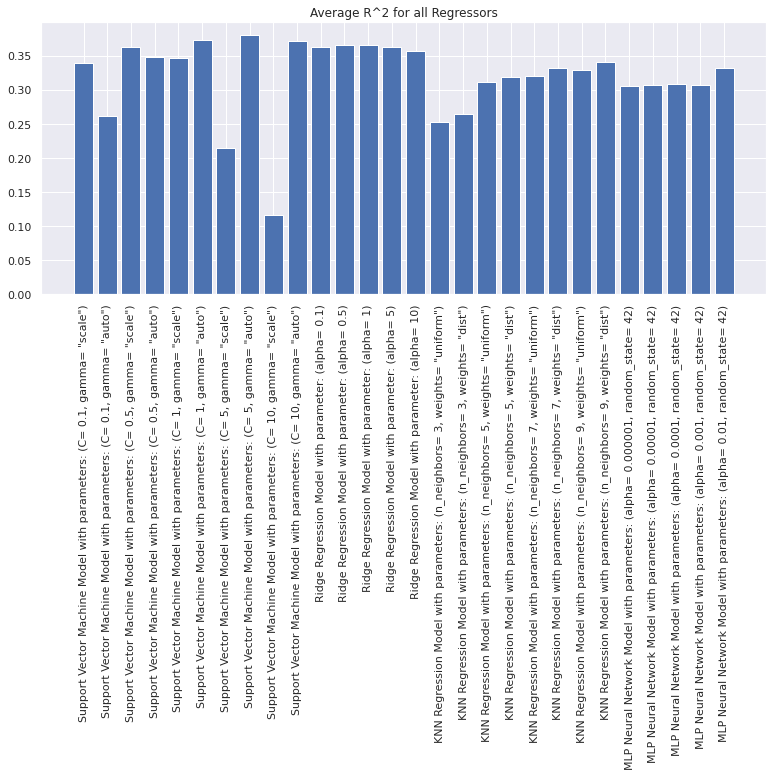

In [ ]:
list_of_names= []
for model in range(len(results_mean)):
  list_of_names.append(results_mean[model][0])

list_of_means= []
for model in range(len(results_mean)):
  list_of_means.append(results_mean[model][1])

plt.bar(list_of_names, list_of_means)
plt.xticks(rotation = 90)
plt.title("Average R^2 for all Regressors")

In [ ]:
best_regressor_index= list_of_means.index(max(list_of_means))
print("the best regressor was the:", list_of_names[best_regressor_index], "which had an r^2 value of: ", max(list_of_means))

the best regressor was the: Support Vector Machine Model with parameters: (C= 5, gamma= "auto") which had an r^2 value of:  0.37963166480198174


** Interpretation ** 
- The key takeaway here is that none of these classifiers did very well. The best r^2 value one was able to achieve was 0.36. Generally speaking, the four models all were able to achieve r^2 values between 0.3 and 0.36 (we say generally because, if the parameters were not tuned correctly, the r^2 values were significantly worse).
- Additionally, it is important to note that, in the graphs above, the r^2 values depended on cross validation. Some models were able to do achieve high r^2 values on a particular fold but struggled with others. This goes to show the importance of cross validation to determine how well the models perform.

While the previous section about machine learning contained information above every plot and regressor, these next two section are only concerned with finding whether or not the regressors are better able to make predictions using only time-based and categorical data. Therefore, only the final plots in both sections (which show average r^2 values will be discussed)

### Machine Learning with only Time Data

In [ ]:
X= copy[['cos_weekday', 'sin_weekday', 'sin_day_of_month', 'cos_day_of_month', 'sin_month', 'cos_month', 'sin_weekday', 'cos_weekday']]

In [ ]:
svr_regressor_one_tenth_scale= svm.SVR(C= 0.1, gamma= 'scale')
svr_regressor_one_tenth_auto= svm.SVR(C= 0.1, gamma= 'auto')

svr_regressor_one_fifth_scale= svm.SVR(C= 0.5, gamma= 'scale')
svr_regressor_one_fifth_auto= svm.SVR(C= 0.5, gamma= 'auto')

svr_regressor_one_scale= svm.SVR(C= 1, gamma= 'scale')
svr_regressor_one_auto= svm.SVR(C= 1, gamma= 'auto')

svr_regressor_five_scale= svm.SVR(C= 5, gamma= 'scale')
svr_regressor_five_auto= svm.SVR(C= 5, gamma= 'auto')

svr_regressor_ten_scale= svm.SVR(C= 10, gamma= 'scale')
svr_regressor_ten_auto= svm.SVR(C= 10, gamma= 'auto')


list_of_models = []

list_of_models.append(('Support Vector Machine Model with parameters: (C= 0.1, gamma= "scale")', svr_regressor_one_tenth_scale))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 0.1, gamma= "auto")', svr_regressor_one_tenth_auto))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 0.5, gamma= "scale")', svr_regressor_one_fifth_scale))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 0.5, gamma= "auto")', svr_regressor_one_fifth_auto))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 1, gamma= "scale")', svr_regressor_one_scale))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 1, gamma= "auto")', svr_regressor_one_auto))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 5, gamma= "scale")', svr_regressor_five_scale))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 5, gamma= "auto")', svr_regressor_five_auto))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 10, gamma= "scale")', svr_regressor_ten_scale))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 10, gamma= "auto")', svr_regressor_ten_auto))


results = []
names = []
results_mean= []

for name, model in list_of_models:

    kfold = sklearn.model_selection.KFold()
    cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv= 5, scoring= 'r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: The r^2 value is %f (with a standard deviation of %f)" % (name, cv_results.mean(), cv_results.std())
    results_mean.append((name,cv_results.mean()))
    print(msg)
    print("List of r^2 values for each fold: ", cv_results)
    print()

Support Vector Machine Model with parameters: (C= 0.1, gamma= "scale"): The r^2 value is -0.047092 (with a standard deviation of 0.029255)
List of r^2 values for each fold:  [-0.00092038 -0.07452348 -0.07253465 -0.02469845 -0.06278115]

Support Vector Machine Model with parameters: (C= 0.1, gamma= "auto"): The r^2 value is -0.035589 (with a standard deviation of 0.025611)
List of r^2 values for each fold:  [-0.00819541 -0.04303796 -0.07354797 -0.00571829 -0.04744383]

Support Vector Machine Model with parameters: (C= 0.5, gamma= "scale"): The r^2 value is -0.106874 (with a standard deviation of 0.057720)
List of r^2 values for each fold:  [-0.02342181 -0.20336598 -0.09816605 -0.11690843 -0.09250939]

Support Vector Machine Model with parameters: (C= 0.5, gamma= "auto"): The r^2 value is -0.070983 (with a standard deviation of 0.040820)
List of r^2 values for each fold:  [-0.00325514 -0.1226427  -0.0647111  -0.06232135 -0.10198631]

Support Vector Machine Model with parameters: (C= 1, g

Text(0.5, 1.0, 'Results for SVM Regression with parameters: (C= 1, gamma= "auto")')

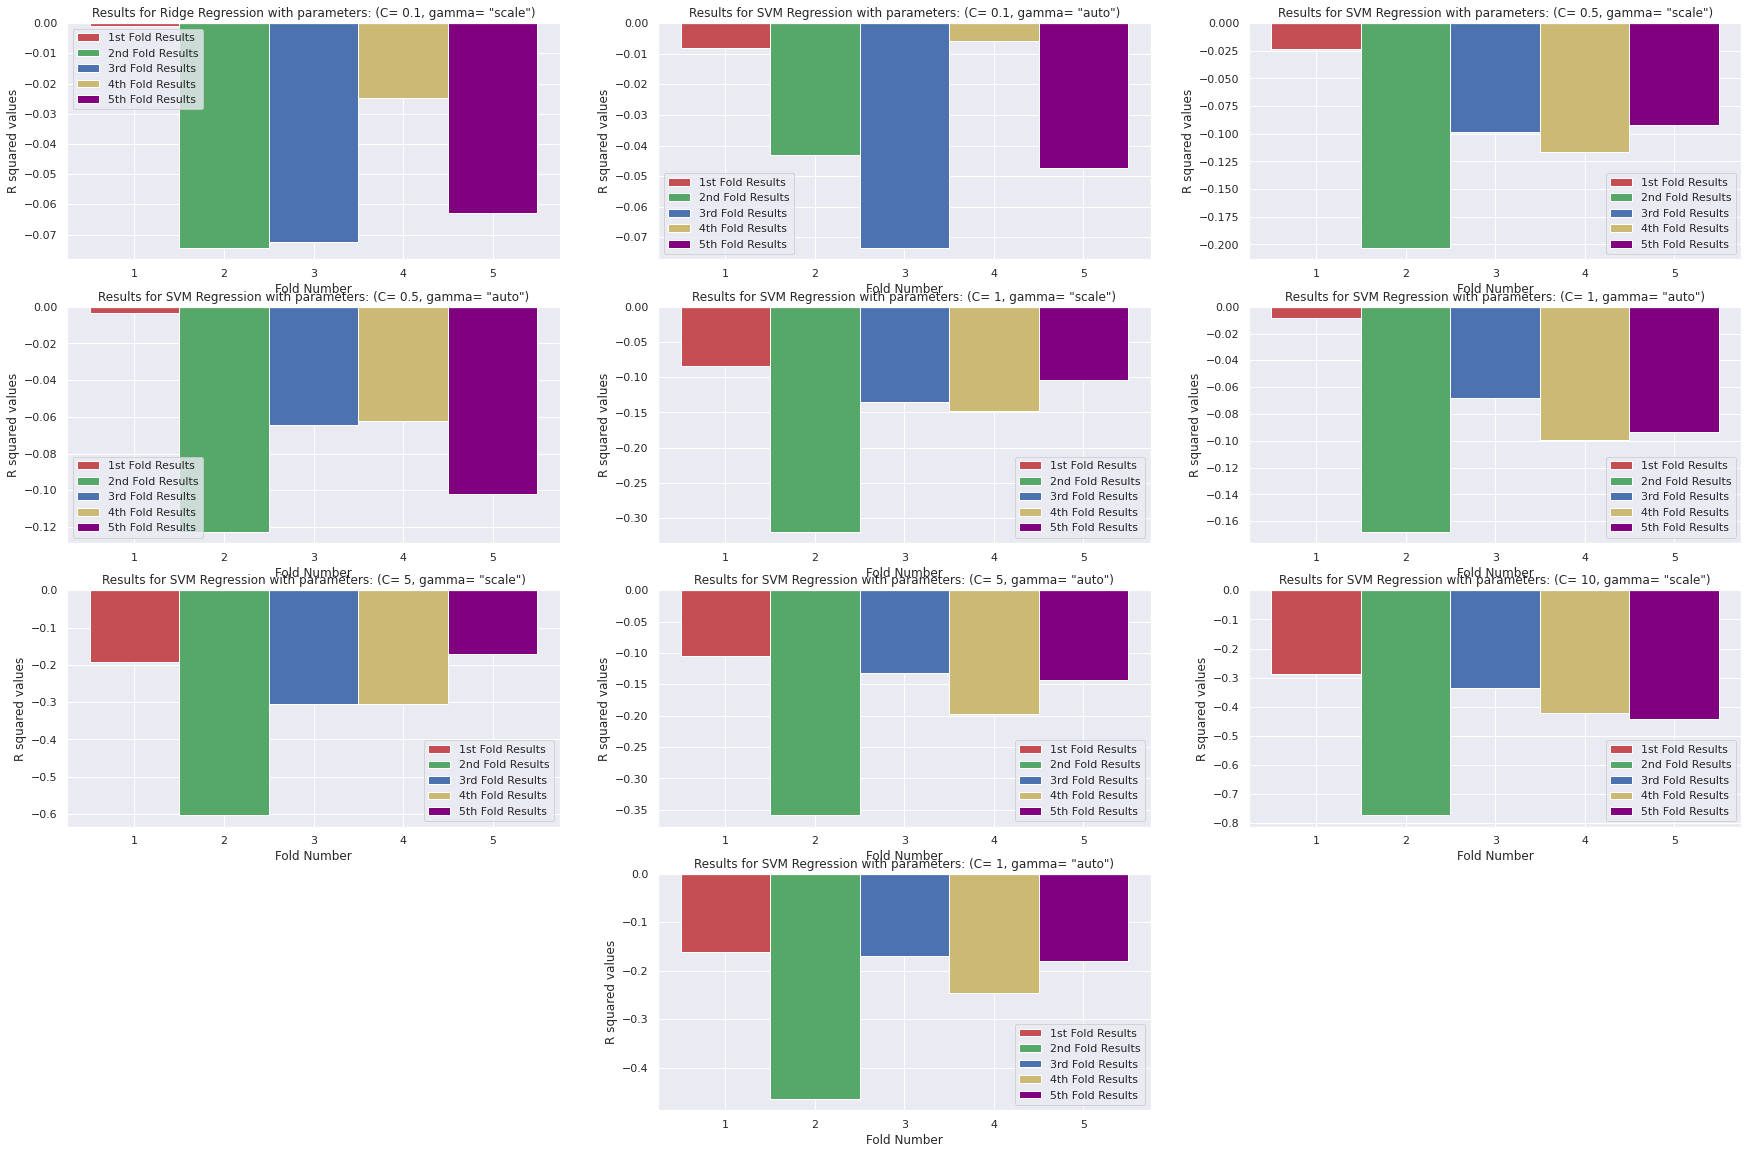

In [ ]:
x= ['1st trial', '2nd trial', '3rd trial', '4th trial', '5th trial', '6th trial', '7th trial', '8th trial', '9th trial', '10th trial']
x= [3]

trial_one_results = results[0]
trial_two_results = results[1]
trial_three_results = results[2]
trial_four_results = results[3]
trial_five_results = results[4]
trial_six_results = results[5]
trial_seven_results = results[6]
trial_eight_results = results[7]
trial_nine_results = results[8]
trial_ten_results = results[9]

ax = plt.subplot(431)
plt.gcf().set_size_inches(30, 20)
red= ax.bar(x[0]-2, trial_one_results[0], width= 1, color= 'r', align='center')
green= ax.bar(x[0]-1, trial_one_results[1], width= 1, color= 'g', align='center')
blue= ax.bar(x[0], trial_one_results[2], width= 1, color= 'b', align='center')
yellow= ax.bar(x[0]+1, trial_one_results[3], width= 1, color= 'y', align='center')
purple= ax.bar(x[0]+2, trial_one_results[4], width= 1, color= 'purple', align='center')
ax.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax.set_ylabel("R squared values")
ax.set_xlabel("Fold Number")
ax.set_title('Results for Ridge Regression with parameters: (C= 0.1, gamma= "scale")')

ax2 = plt.subplot(432)
plt.gcf().set_size_inches(30, 20)
red= ax2.bar(x[0]-2, trial_two_results[0], width= 1, color= 'r', align='center')
green= ax2.bar(x[0]-1, trial_two_results[1], width= 1, color= 'g', align='center')
blue= ax2.bar(x[0], trial_two_results[2], width= 1, color= 'b', align='center')
yellow= ax2.bar(x[0]+1, trial_two_results[3], width= 1, color= 'y', align='center')
purple= ax2.bar(x[0]+2, trial_two_results[4], width= 1, color= 'purple', align='center')
ax2.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax2.set_ylabel("R squared values")
ax2.set_xlabel("Fold Number")
ax2.set_title('Results for SVM Regression with parameters: (C= 0.1, gamma= "auto")')

ax3 = plt.subplot(433)
plt.gcf().set_size_inches(30, 20)
red= ax3.bar(x[0]-2, trial_three_results[0], width= 1, color= 'r', align='center')
green= ax3.bar(x[0]-1, trial_three_results[1], width= 1, color= 'g', align='center')
blue= ax3.bar(x[0], trial_three_results[2], width= 1, color= 'b', align='center')
yellow= ax3.bar(x[0]+1, trial_three_results[3], width= 1, color= 'y', align='center')
purple= ax3.bar(x[0]+2, trial_three_results[4], width= 1, color= 'purple', align='center')
ax3.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax3.set_ylabel("R squared values")
ax3.set_xlabel("Fold Number")
ax3.set_title('Results for SVM Regression with parameters: (C= 0.5, gamma= "scale")')

ax4 = plt.subplot(434)
plt.gcf().set_size_inches(30, 20)
red= ax4.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax4.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax4.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax4.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax4.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax4.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax4.set_ylabel("R squared values")
ax4.set_xlabel("Fold Number")
ax4.set_title('Results for SVM Regression with parameters: (C= 0.5, gamma= "auto")')

ax5 = plt.subplot(435)
plt.gcf().set_size_inches(30, 20)
red= ax5.bar(x[0]-2, trial_five_results[0], width= 1, color= 'r', align='center')
green= ax5.bar(x[0]-1, trial_five_results[1], width= 1, color= 'g', align='center')
blue= ax5.bar(x[0], trial_five_results[2], width= 1, color= 'b', align='center')
yellow= ax5.bar(x[0]+1, trial_five_results[3], width= 1, color= 'y', align='center')
purple= ax5.bar(x[0]+2, trial_five_results[4], width= 1, color= 'purple', align='center')
ax5.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax5.set_ylabel("R squared values")
ax5.set_xlabel("Fold Number")
ax5.set_title('Results for SVM Regression with parameters: (C= 1, gamma= "scale")')

ax6 = plt.subplot(436)
plt.gcf().set_size_inches(30, 20)
red= ax6.bar(x[0]-2, trial_six_results[0], width= 1, color= 'r', align='center')
green= ax6.bar(x[0]-1, trial_six_results[1], width= 1, color= 'g', align='center')
blue= ax6.bar(x[0], trial_six_results[2], width= 1, color= 'b', align='center')
yellow= ax6.bar(x[0]+1, trial_six_results[3], width= 1, color= 'y', align='center')
purple= ax6.bar(x[0]+2, trial_six_results[4], width= 1, color= 'purple', align='center')
ax6.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax6.set_ylabel("R squared values")
ax6.set_xlabel("Fold Number")
ax6.set_title('Results for SVM Regression with parameters: (C= 1, gamma= "auto")')

ax7 = plt.subplot(437)
plt.gcf().set_size_inches(30, 20)
red= ax7.bar(x[0]-2, trial_seven_results[0], width= 1, color= 'r', align='center')
green= ax7.bar(x[0]-1, trial_seven_results[1], width= 1, color= 'g', align='center')
blue= ax7.bar(x[0], trial_seven_results[2], width= 1, color= 'b', align='center')
yellow= ax7.bar(x[0]+1, trial_seven_results[3], width= 1, color= 'y', align='center')
purple= ax7.bar(x[0]+2, trial_seven_results[4], width= 1, color= 'purple', align='center')
ax7.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax7.set_ylabel("R squared values")
ax7.set_xlabel("Fold Number")
ax7.set_title('Results for SVM Regression with parameters: (C= 5, gamma= "scale")')

ax8 = plt.subplot(438)
plt.gcf().set_size_inches(30, 20)
red= ax8.bar(x[0]-2, trial_eight_results[0], width= 1, color= 'r', align='center')
green= ax8.bar(x[0]-1, trial_eight_results[1], width= 1, color= 'g', align='center')
blue= ax8.bar(x[0], trial_eight_results[2], width= 1, color= 'b', align='center')
yellow= ax8.bar(x[0]+1, trial_eight_results[3], width= 1, color= 'y', align='center')
purple= ax8.bar(x[0]+2, trial_eight_results[4], width= 1, color= 'purple', align='center')
ax8.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax8.set_ylabel("R squared values")
ax8.set_xlabel("Fold Number")
ax8.set_title('Results for SVM Regression with parameters: (C= 5, gamma= "auto")')

ax9 = plt.subplot(439)
plt.gcf().set_size_inches(30, 20)
red= ax9.bar(x[0]-2, trial_nine_results[0], width= 1, color= 'r', align='center')
green= ax9.bar(x[0]-1, trial_nine_results[1], width= 1, color= 'g', align='center')
blue= ax9.bar(x[0], trial_nine_results[2], width= 1, color= 'b', align='center')
yellow= ax9.bar(x[0]+1, trial_nine_results[3], width= 1, color= 'y', align='center')
purple= ax9.bar(x[0]+2, trial_nine_results[4], width= 1, color= 'purple', align='center')
ax9.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax9.set_ylabel("R squared values")
ax9.set_xlabel("Fold Number")
ax9.set_title('Results for SVM Regression with parameters: (C= 10, gamma= "scale")')

ax10 = plt.subplot(4,3,11)
plt.gcf().set_size_inches(30, 20)
red= ax10.bar(x[0]-2, trial_ten_results[0], width= 1, color= 'r', align='center')
green= ax10.bar(x[0]-1, trial_ten_results[1], width= 1, color= 'g', align='center')
blue= ax10.bar(x[0], trial_ten_results[2], width= 1, color= 'b', align='center')
yellow= ax10.bar(x[0]+1, trial_ten_results[3], width= 1, color= 'y', align='center')
purple= ax10.bar(x[0]+2, trial_ten_results[4], width= 1, color= 'purple', align='center')
ax10.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax10.set_ylabel("R squared values")
ax10.set_xlabel("Fold Number")
ax10.set_title('Results for SVM Regression with parameters: (C= 1, gamma= "auto")')

In [ ]:
ridge_regressor_one_tenth= Ridge(alpha= 0.1)
ridge_regressor_one_fifth= Ridge(alpha= 0.5)
ridge_regressor_one= Ridge(alpha= 1)
ridge_regressor_five= Ridge(alpha= 5)
ridge_regressor_ten= Ridge(alpha= 10)


list_of_models = []

list_of_models.append(('Ridge Regression Model with parameter: (alpha= 0.1)', ridge_regressor_one_tenth))
list_of_models.append(('Ridge Regression Model with parameter: (alpha= 0.5)', ridge_regressor_one_fifth))
list_of_models.append(('Ridge Regression Model with parameter: (alpha= 1)', ridge_regressor_one))
list_of_models.append(('Ridge Regression Model with parameter: (alpha= 5)', ridge_regressor_five))
list_of_models.append(('Ridge Regression Model with parameter: (alpha= 10)', ridge_regressor_ten))


results = []
names = []

for name, model in list_of_models:

    kfold = sklearn.model_selection.KFold()
    cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv= 5, scoring= 'r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: The r^2 value is %f (with a standard deviation of %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    results_mean.append((name,cv_results.mean()))
    print("List of r^2 values for each fold: ", cv_results)
    print()

Ridge Regression Model with parameter: (alpha= 0.1): The r^2 value is -0.019704 (with a standard deviation of 0.026849)
List of r^2 values for each fold:  [ 0.00160996 -0.04004535 -0.05986974 -0.01342804  0.01321341]

Ridge Regression Model with parameter: (alpha= 0.5): The r^2 value is -0.019684 (with a standard deviation of 0.026823)
List of r^2 values for each fold:  [ 0.0016066  -0.04001944 -0.05979908 -0.01341871  0.01320931]

Ridge Regression Model with parameter: (alpha= 1): The r^2 value is -0.019660 (with a standard deviation of 0.026790)
List of r^2 values for each fold:  [ 0.00160241 -0.03998711 -0.05971101 -0.01340708  0.01320417]

Ridge Regression Model with parameter: (alpha= 5): The r^2 value is -0.019466 (with a standard deviation of 0.026532)
List of r^2 values for each fold:  [ 0.00156896 -0.03973061 -0.05901588 -0.01331508  0.01316316]

Ridge Regression Model with parameter: (alpha= 10): The r^2 value is -0.019230 (with a standard deviation of 0.026218)
List of r^2 v

Text(0.5, 1.0, 'Results for Ridge Regression with alpha= 10')

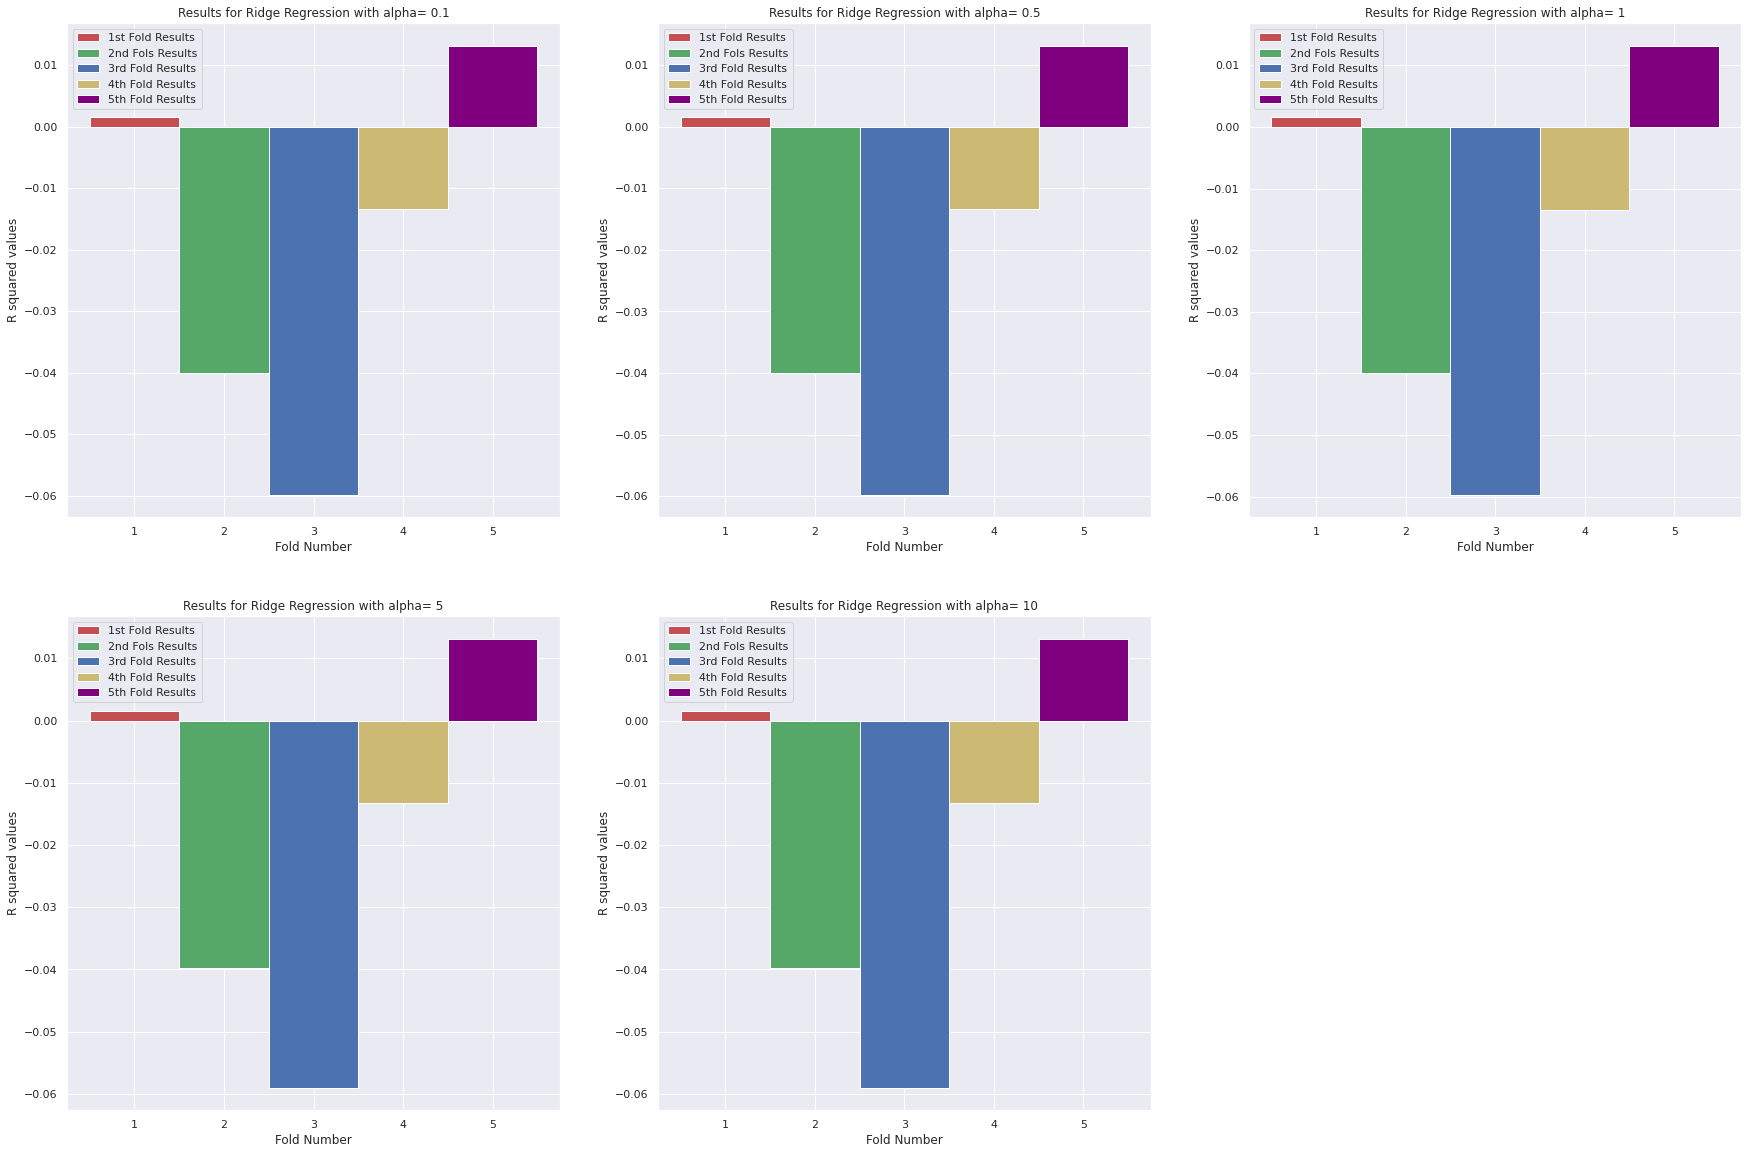

In [ ]:
x= ['1st trial', '2nd trial', '3rd trial', '4th trial', '5th trial']
x= [3]

trial_one_results = results[0]
trial_two_results = results[1]
trial_three_results = results[2]
trial_four_results = results[3]
trial_five_results = results[4]

ax = plt.subplot(231)
plt.gcf().set_size_inches(30, 20)
red= ax.bar(x[0]-2, trial_one_results[0], width= 1, color= 'r', align='center')
green= ax.bar(x[0]-1, trial_one_results[1], width= 1, color= 'g', align='center')
blue= ax.bar(x[0], trial_one_results[2], width= 1, color= 'b', align='center')
yellow= ax.bar(x[0]+1, trial_one_results[3], width= 1, color= 'y', align='center')
purple= ax.bar(x[0]+2, trial_one_results[4], width= 1, color= 'purple', align='center')
ax.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax.set_ylabel("R squared values")
ax.set_xlabel("Fold Number")
ax.set_title("Results for Ridge Regression with alpha= 0.1")

ax2 = plt.subplot(232)
plt.gcf().set_size_inches(30, 20)
red= ax2.bar(x[0]-2, trial_two_results[0], width= 1, color= 'r', align='center')
green= ax2.bar(x[0]-1, trial_two_results[1], width= 1, color= 'g', align='center')
blue= ax2.bar(x[0], trial_two_results[2], width= 1, color= 'b', align='center')
yellow= ax2.bar(x[0]+1, trial_two_results[3], width= 1, color= 'y', align='center')
purple= ax2.bar(x[0]+2, trial_two_results[4], width= 1, color= 'purple', align='center')
ax2.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax2.set_ylabel("R squared values")
ax2.set_xlabel("Fold Number")
ax2.set_title("Results for Ridge Regression with alpha= 0.5")

ax3 = plt.subplot(233)
plt.gcf().set_size_inches(30, 20)
red= ax3.bar(x[0]-2, trial_three_results[0], width= 1, color= 'r', align='center')
green= ax3.bar(x[0]-1, trial_three_results[1], width= 1, color= 'g', align='center')
blue= ax3.bar(x[0], trial_three_results[2], width= 1, color= 'b', align='center')
yellow= ax3.bar(x[0]+1, trial_three_results[3], width= 1, color= 'y', align='center')
purple= ax3.bar(x[0]+2, trial_three_results[4], width= 1, color= 'purple', align='center')
ax3.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax3.set_ylabel("R squared values")
ax3.set_xlabel("Fold Number")
ax3.set_title("Results for Ridge Regression with alpha= 1")

ax4 = plt.subplot(234)
plt.gcf().set_size_inches(30, 20)
red= ax4.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax4.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax4.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax4.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax4.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax4.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax4.set_ylabel("R squared values")
ax4.set_xlabel("Fold Number")
ax4.set_title("Results for Ridge Regression with alpha= 5")

ax5 = plt.subplot(235)
plt.gcf().set_size_inches(30, 20)
red= ax5.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax5.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax5.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax5.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax5.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax5.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax5.set_ylabel("R squared values")
ax5.set_xlabel("Fold Number")
ax5.set_title("Results for Ridge Regression with alpha= 10")

In [ ]:
knn_regressor_three_uniform= KNeighborsRegressor(n_neighbors= 3, weights= 'uniform')
knn_regressor_three_dist= KNeighborsRegressor(n_neighbors= 3, weights= 'distance')

knn_regressor_five_uniform= KNeighborsRegressor(n_neighbors= 5, weights= 'uniform')
knn_regressor_five_dist= KNeighborsRegressor(n_neighbors= 5, weights= 'distance')

knn_regressor_seven_uniform= KNeighborsRegressor(n_neighbors= 7, weights= 'uniform')
knn_regressor_seven_dist= KNeighborsRegressor(n_neighbors= 7, weights= 'distance')

knn_regressor_nine_uniform= KNeighborsRegressor(n_neighbors= 9, weights= 'uniform')
knn_regressor_nine_dist= KNeighborsRegressor(n_neighbors= 9, weights= 'distance')


list_of_models = []

list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 3, weights= "uniform")', knn_regressor_three_uniform))
list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 3, weights= "dist")', knn_regressor_three_dist))

list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 5, weights= "uniform")', knn_regressor_five_uniform))
list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 5, weights= "dist")', knn_regressor_five_dist))

list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 7, weights= "uniform")', knn_regressor_seven_uniform))
list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 7, weights= "dist")', knn_regressor_seven_dist))

list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 9, weights= "uniform")', knn_regressor_nine_uniform))
list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 9, weights= "dist")', knn_regressor_nine_dist))

results = []
names = []

for name, model in list_of_models:

    kfold = sklearn.model_selection.KFold()
    cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv= 5, scoring= 'r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: The r^2 value is %f (with a standard deviation of %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    results_mean.append((name,cv_results.mean()))
    print("List of r^2 values for each fold: ", cv_results)
    print()

KNN Regression Model with parameters: (n_neighbors= 3, weights= "uniform"): The r^2 value is -0.408213 (with a standard deviation of 0.115666)
List of r^2 values for each fold:  [-0.25078956 -0.52028298 -0.53221857 -0.29445154 -0.44332086]

KNN Regression Model with parameters: (n_neighbors= 3, weights= "dist"): The r^2 value is -0.439945 (with a standard deviation of 0.154928)
List of r^2 values for each fold:  [-0.24943681 -0.67423447 -0.53581705 -0.29981306 -0.44042151]

KNN Regression Model with parameters: (n_neighbors= 5, weights= "uniform"): The r^2 value is -0.208684 (with a standard deviation of 0.076204)
List of r^2 values for each fold:  [-0.14829785 -0.31623766 -0.25556196 -0.10165636 -0.22166383]

KNN Regression Model with parameters: (n_neighbors= 5, weights= "dist"): The r^2 value is -0.239400 (with a standard deviation of 0.133262)
List of r^2 values for each fold:  [-0.12937927 -0.4804772  -0.26125497 -0.10636333 -0.21952311]

KNN Regression Model with parameters: (n_n

Text(0.5, 1.0, 'Results for KNN Regression with parameters: (n_neighbors= 9, weights= "dist")')

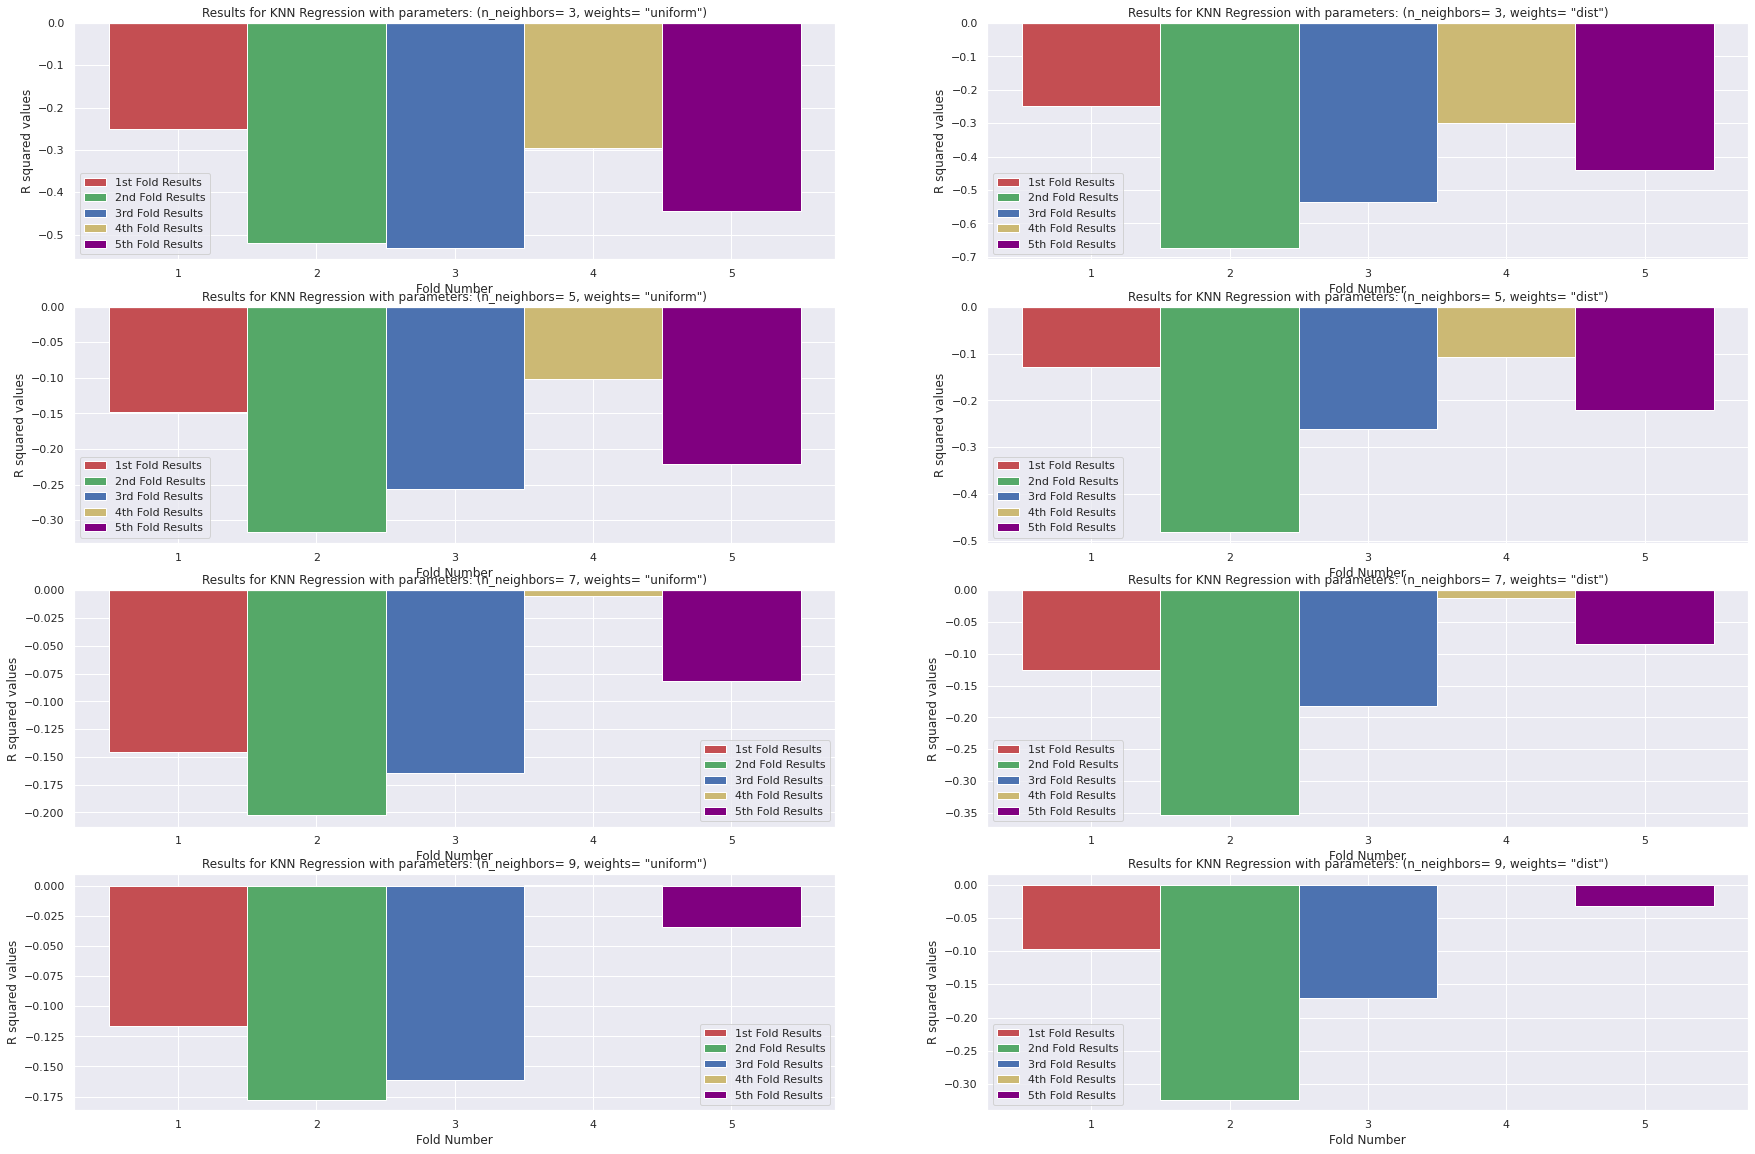

In [ ]:
x= ['1st trial', '2nd trial', '3rd trial', '4th trial', '5th trial', '6th trial', '7th trial', '8th trial']
x= [3]

trial_one_results = results[0]
trial_two_results = results[1]
trial_three_results = results[2]
trial_four_results = results[3]
trial_five_results = results[4]
trial_six_results = results[5]
trial_seven_results = results[6]
trial_eight_results = results[7]

ax = plt.subplot(421)
plt.gcf().set_size_inches(30, 20)
red= ax.bar(x[0]-2, trial_one_results[0], width= 1, color= 'r', align='center')
green= ax.bar(x[0]-1, trial_one_results[1], width= 1, color= 'g', align='center')
blue= ax.bar(x[0], trial_one_results[2], width= 1, color= 'b', align='center')
yellow= ax.bar(x[0]+1, trial_one_results[3], width= 1, color= 'y', align='center')
purple= ax.bar(x[0]+2, trial_one_results[4], width= 1, color= 'purple', align='center')
ax.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax.set_ylabel("R squared values")
ax.set_xlabel("Fold Number")
ax.set_title('Results for KNN Regression with parameters: (n_neighbors= 3, weights= "uniform")')

ax2 = plt.subplot(422)
plt.gcf().set_size_inches(30, 20)
red= ax2.bar(x[0]-2, trial_two_results[0], width= 1, color= 'r', align='center')
green= ax2.bar(x[0]-1, trial_two_results[1], width= 1, color= 'g', align='center')
blue= ax2.bar(x[0], trial_two_results[2], width= 1, color= 'b', align='center')
yellow= ax2.bar(x[0]+1, trial_two_results[3], width= 1, color= 'y', align='center')
purple= ax2.bar(x[0]+2, trial_two_results[4], width= 1, color= 'purple', align='center')
ax2.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax2.set_ylabel("R squared values")
ax2.set_xlabel("Fold Number")
ax2.set_title('Results for KNN Regression with parameters: (n_neighbors= 3, weights= "dist")')

ax3 = plt.subplot(423)
plt.gcf().set_size_inches(30, 20)
red= ax3.bar(x[0]-2, trial_three_results[0], width= 1, color= 'r', align='center')
green= ax3.bar(x[0]-1, trial_three_results[1], width= 1, color= 'g', align='center')
blue= ax3.bar(x[0], trial_three_results[2], width= 1, color= 'b', align='center')
yellow= ax3.bar(x[0]+1, trial_three_results[3], width= 1, color= 'y', align='center')
purple= ax3.bar(x[0]+2, trial_three_results[4], width= 1, color= 'purple', align='center')
ax3.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax3.set_ylabel("R squared values")
ax3.set_xlabel("Fold Number")
ax3.set_title('Results for KNN Regression with parameters: (n_neighbors= 5, weights= "uniform")')

ax4 = plt.subplot(424)
plt.gcf().set_size_inches(30, 20)
red= ax4.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax4.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax4.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax4.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax4.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax4.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax4.set_ylabel("R squared values")
ax4.set_xlabel("Fold Number")
ax4.set_title('Results for KNN Regression with parameters: (n_neighbors= 5, weights= "dist")')

ax5 = plt.subplot(425)
plt.gcf().set_size_inches(30, 20)
red= ax5.bar(x[0]-2, trial_five_results[0], width= 1, color= 'r', align='center')
green= ax5.bar(x[0]-1, trial_five_results[1], width= 1, color= 'g', align='center')
blue= ax5.bar(x[0], trial_five_results[2], width= 1, color= 'b', align='center')
yellow= ax5.bar(x[0]+1, trial_five_results[3], width= 1, color= 'y', align='center')
purple= ax5.bar(x[0]+2, trial_five_results[4], width= 1, color= 'purple', align='center')
ax5.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax5.set_ylabel("R squared values")
ax5.set_xlabel("Fold Number")
ax5.set_title('Results for KNN Regression with parameters: (n_neighbors= 7, weights= "uniform")')

ax6 = plt.subplot(426)
plt.gcf().set_size_inches(30, 20)
red= ax6.bar(x[0]-2, trial_six_results[0], width= 1, color= 'r', align='center')
green= ax6.bar(x[0]-1, trial_six_results[1], width= 1, color= 'g', align='center')
blue= ax6.bar(x[0], trial_six_results[2], width= 1, color= 'b', align='center')
yellow= ax6.bar(x[0]+1, trial_six_results[3], width= 1, color= 'y', align='center')
purple= ax6.bar(x[0]+2, trial_six_results[4], width= 1, color= 'purple', align='center')
ax6.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax6.set_ylabel("R squared values")
ax6.set_xlabel("Fold Number")
ax6.set_title('Results for KNN Regression with parameters: (n_neighbors= 7, weights= "dist")')

ax7 = plt.subplot(427)
plt.gcf().set_size_inches(30, 20)
red= ax7.bar(x[0]-2, trial_seven_results[0], width= 1, color= 'r', align='center')
green= ax7.bar(x[0]-1, trial_seven_results[1], width= 1, color= 'g', align='center')
blue= ax7.bar(x[0], trial_seven_results[2], width= 1, color= 'b', align='center')
yellow= ax7.bar(x[0]+1, trial_seven_results[3], width= 1, color= 'y', align='center')
purple= ax7.bar(x[0]+2, trial_seven_results[4], width= 1, color= 'purple', align='center')
ax7.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax7.set_ylabel("R squared values")
ax7.set_xlabel("Fold Number")
ax7.set_title('Results for KNN Regression with parameters: (n_neighbors= 9, weights= "uniform")')

ax8 = plt.subplot(428)
plt.gcf().set_size_inches(30, 20)
red= ax8.bar(x[0]-2, trial_eight_results[0], width= 1, color= 'r', align='center')
green= ax8.bar(x[0]-1, trial_eight_results[1], width= 1, color= 'g', align='center')
blue= ax8.bar(x[0], trial_eight_results[2], width= 1, color= 'b', align='center')
yellow= ax8.bar(x[0]+1, trial_eight_results[3], width= 1, color= 'y', align='center')
purple= ax8.bar(x[0]+2, trial_eight_results[4], width= 1, color= 'purple', align='center')
ax8.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax8.set_ylabel("R squared values")
ax8.set_xlabel("Fold Number")
ax8.set_title('Results for KNN Regression with parameters: (n_neighbors= 9, weights= "dist")')

In [ ]:
nn_one_millionth= MLPRegressor(alpha= 0.000001, random_state= 42)
nn_hundred_thousandth= MLPRegressor(alpha= 0.00001, random_state= 42)
nn_ten_thousandth= MLPRegressor(alpha= 0.0001, random_state= 42)
nn_one_thousandth= MLPRegressor(alpha= 0.001, random_state= 42)
nn_one_hundredth= MLPRegressor(alpha= 0.01, random_state= 42)

list_of_models = []

list_of_models.append(('MLP Neural Network Model with parameters: (alpha= 0.000001, random_state= 42)', nn_one_millionth))
list_of_models.append(('MLP Neural Network Model with parameters: (alpha= 0.00001, random_state= 42)', nn_hundred_thousandth))
list_of_models.append(('MLP Neural Network Model with parameters: (alpha= 0.0001, random_state= 42)', nn_ten_thousandth))
list_of_models.append(('MLP Neural Network Model with parameters: (alpha= 0.001, random_state= 42)', nn_one_thousandth))
list_of_models.append(('MLP Neural Network Model with parameters: (alpha= 0.01, random_state= 42)', nn_one_hundredth))

results = []
names = []

for name, model in list_of_models:

    kfold = sklearn.model_selection.KFold()
    cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv= 5, scoring= 'r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: The r^2 value is %f (with a standard deviation of %f)" % (name, cv_results.mean(), cv_results.std())
    results_mean.append((name,cv_results.mean()))
    print(msg)
    print("List of r^2 values for each fold: ", cv_results)
    print()

MLP Neural Network Model with parameters: (alpha= 0.000001, random_state= 42): The r^2 value is -0.063977 (with a standard deviation of 0.046450)
List of r^2 values for each fold:  [ 0.02278562 -0.11633408 -0.07702743 -0.0668846  -0.08242683]

MLP Neural Network Model with parameters: (alpha= 0.00001, random_state= 42): The r^2 value is -0.063977 (with a standard deviation of 0.046448)
List of r^2 values for each fold:  [ 0.02278681 -0.11632637 -0.07703559 -0.06690485 -0.08240735]

MLP Neural Network Model with parameters: (alpha= 0.0001, random_state= 42): The r^2 value is -0.063868 (with a standard deviation of 0.046410)
List of r^2 values for each fold:  [ 0.02278113 -0.11632298 -0.07683257 -0.06685461 -0.08211204]

MLP Neural Network Model with parameters: (alpha= 0.001, random_state= 42): The r^2 value is -0.063015 (with a standard deviation of 0.046106)
List of r^2 values for each fold:  [ 0.02316141 -0.11486481 -0.07639966 -0.06587909 -0.08109405]

MLP Neural Network Model with 

Text(0.5, 1.0, 'Results for MLP with alpha= 0.01')

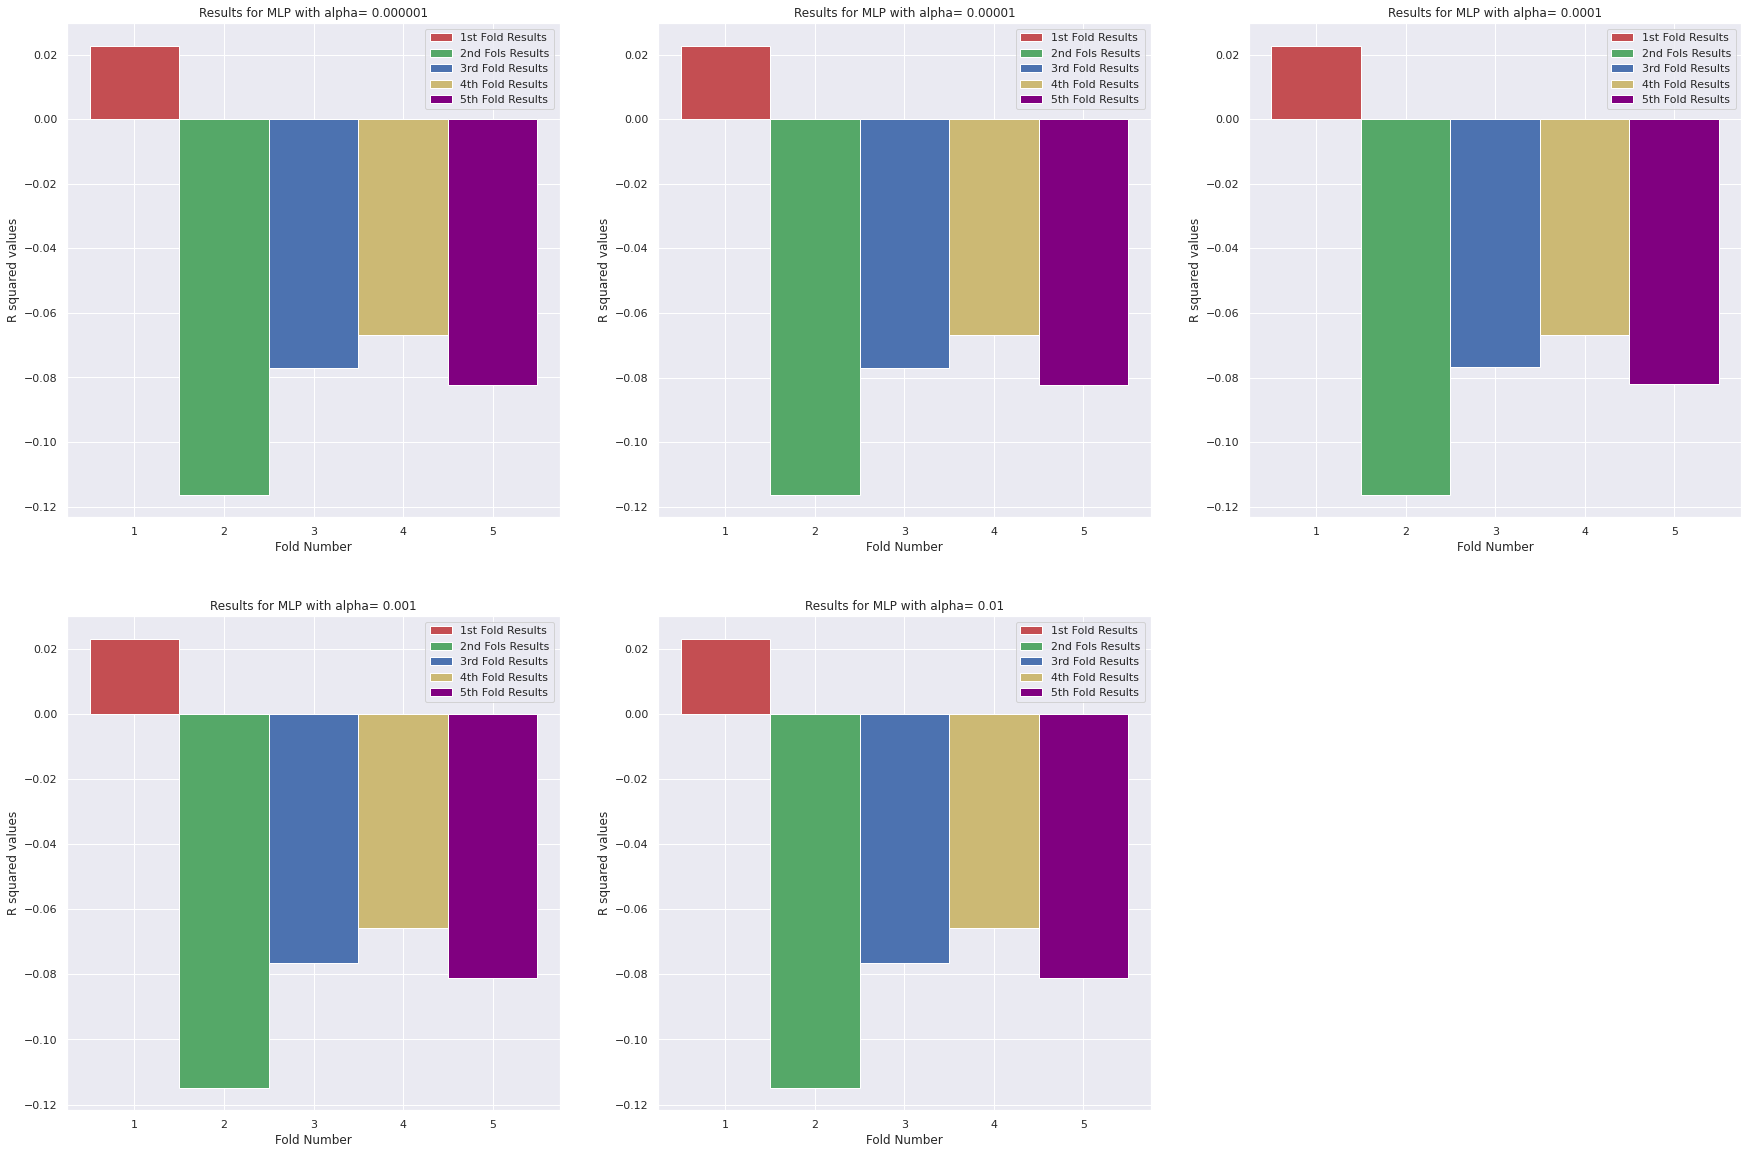

In [ ]:
x= ['1st trial', '2nd trial', '3rd trial', '4th trial', '5th trial']
x= [3]

trial_one_results = results[0]
trial_two_results = results[1]
trial_three_results = results[2]
trial_four_results = results[3]
trial_five_results = results[4]

ax = plt.subplot(231)
plt.gcf().set_size_inches(30, 20)
red= ax.bar(x[0]-2, trial_one_results[0], width= 1, color= 'r', align='center')
green= ax.bar(x[0]-1, trial_one_results[1], width= 1, color= 'g', align='center')
blue= ax.bar(x[0], trial_one_results[2], width= 1, color= 'b', align='center')
yellow= ax.bar(x[0]+1, trial_one_results[3], width= 1, color= 'y', align='center')
purple= ax.bar(x[0]+2, trial_one_results[4], width= 1, color= 'purple', align='center')
ax.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax.set_ylabel("R squared values")
ax.set_xlabel("Fold Number")
ax.set_title("Results for MLP with alpha= 0.000001")

ax2 = plt.subplot(232)
plt.gcf().set_size_inches(30, 20)
red= ax2.bar(x[0]-2, trial_two_results[0], width= 1, color= 'r', align='center')
green= ax2.bar(x[0]-1, trial_two_results[1], width= 1, color= 'g', align='center')
blue= ax2.bar(x[0], trial_two_results[2], width= 1, color= 'b', align='center')
yellow= ax2.bar(x[0]+1, trial_two_results[3], width= 1, color= 'y', align='center')
purple= ax2.bar(x[0]+2, trial_two_results[4], width= 1, color= 'purple', align='center')
ax2.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax2.set_ylabel("R squared values")
ax2.set_xlabel("Fold Number")
ax2.set_title("Results for MLP with alpha= 0.00001")

ax3 = plt.subplot(233)
plt.gcf().set_size_inches(30, 20)
red= ax3.bar(x[0]-2, trial_three_results[0], width= 1, color= 'r', align='center')
green= ax3.bar(x[0]-1, trial_three_results[1], width= 1, color= 'g', align='center')
blue= ax3.bar(x[0], trial_three_results[2], width= 1, color= 'b', align='center')
yellow= ax3.bar(x[0]+1, trial_three_results[3], width= 1, color= 'y', align='center')
purple= ax3.bar(x[0]+2, trial_three_results[4], width= 1, color= 'purple', align='center')
ax3.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax3.set_ylabel("R squared values")
ax3.set_xlabel("Fold Number")
ax3.set_title("Results for MLP with alpha= 0.0001")

ax4 = plt.subplot(234)
plt.gcf().set_size_inches(30, 20)
red= ax4.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax4.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax4.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax4.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax4.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax4.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax4.set_ylabel("R squared values")
ax4.set_xlabel("Fold Number")
ax4.set_title("Results for MLP with alpha= 0.001")

ax5 = plt.subplot(235)
plt.gcf().set_size_inches(30, 20)
red= ax5.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax5.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax5.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax5.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax5.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax5.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax5.set_ylabel("R squared values")
ax5.set_xlabel("Fold Number")
ax5.set_title("Results for MLP with alpha= 0.01")

Text(0.5, 1.0, 'Average R^2 for all Regressors')

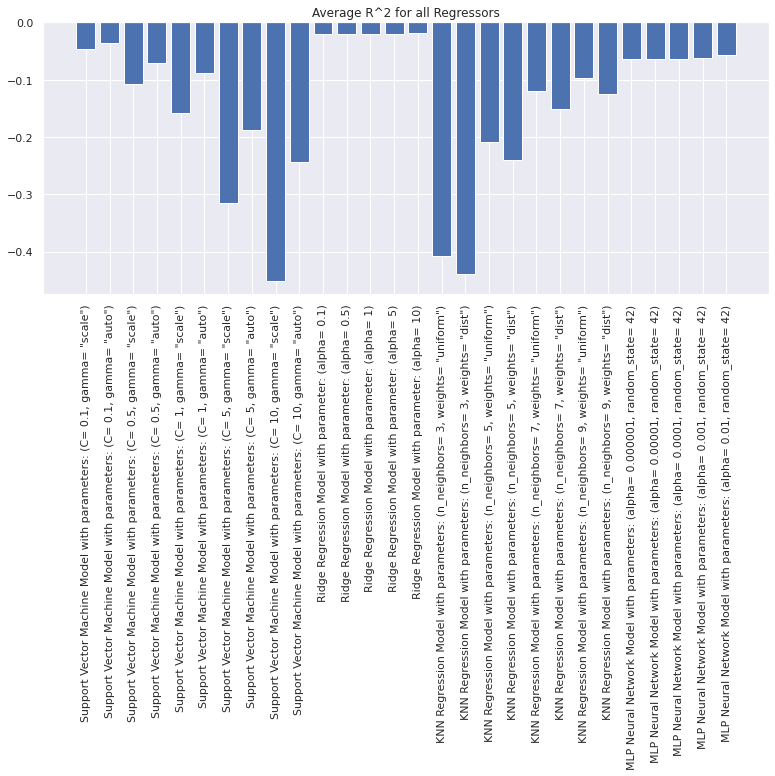

In [ ]:
list_of_names= []
for model in range(len(results_mean)):
  list_of_names.append(results_mean[model][0])

list_of_means= []
for model in range(len(results_mean)):
  list_of_means.append(results_mean[model][1])

plt.bar(list_of_names, list_of_means)
plt.xticks(rotation = 90)
plt.title("Average R^2 for all Regressors")

### Machine Learning with only Categorical Data

In [ ]:
X= copy.drop(['Percent Full', 'cos_weekday', 'sin_weekday', 'sin_day_of_month', 'cos_day_of_month', 'sin_month', 'cos_month', 'sin_weekday', 'cos_weekday'], axis= 1)

In [ ]:
svr_regressor_one_tenth_scale= svm.SVR(C= 0.1, gamma= 'scale')
svr_regressor_one_tenth_auto= svm.SVR(C= 0.1, gamma= 'auto')

svr_regressor_one_fifth_scale= svm.SVR(C= 0.5, gamma= 'scale')
svr_regressor_one_fifth_auto= svm.SVR(C= 0.5, gamma= 'auto')

svr_regressor_one_scale= svm.SVR(C= 1, gamma= 'scale')
svr_regressor_one_auto= svm.SVR(C= 1, gamma= 'auto')

svr_regressor_five_scale= svm.SVR(C= 5, gamma= 'scale')
svr_regressor_five_auto= svm.SVR(C= 5, gamma= 'auto')

svr_regressor_ten_scale= svm.SVR(C= 10, gamma= 'scale')
svr_regressor_ten_auto= svm.SVR(C= 10, gamma= 'auto')


list_of_models = []

list_of_models.append(('Support Vector Machine Model with parameters: (C= 0.1, gamma= "scale")', svr_regressor_one_tenth_scale))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 0.1, gamma= "auto")', svr_regressor_one_tenth_auto))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 0.5, gamma= "scale")', svr_regressor_one_fifth_scale))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 0.5, gamma= "auto")', svr_regressor_one_fifth_auto))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 1, gamma= "scale")', svr_regressor_one_scale))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 1, gamma= "auto")', svr_regressor_one_auto))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 5, gamma= "scale")', svr_regressor_five_scale))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 5, gamma= "auto")', svr_regressor_five_auto))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 10, gamma= "scale")', svr_regressor_ten_scale))
list_of_models.append(('Support Vector Machine Model with parameters: (C= 10, gamma= "auto")', svr_regressor_ten_auto))


results = []
names = []
results_mean = []
for name, model in list_of_models:

    kfold = sklearn.model_selection.KFold()
    cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv= 5, scoring= 'r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: The r^2 value is %f (with a standard deviation of %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    results_mean.append((name,cv_results.mean()))
    print("List of r^2 values for each fold: ", cv_results)
    print()

Support Vector Machine Model with parameters: (C= 0.1, gamma= "scale"): The r^2 value is 0.348360 (with a standard deviation of 0.039978)
List of r^2 values for each fold:  [0.37768607 0.37341327 0.27047955 0.36911216 0.35111012]

Support Vector Machine Model with parameters: (C= 0.1, gamma= "auto"): The r^2 value is 0.272635 (with a standard deviation of 0.028358)
List of r^2 values for each fold:  [0.27190159 0.30707253 0.22583829 0.29589465 0.26246574]

Support Vector Machine Model with parameters: (C= 0.5, gamma= "scale"): The r^2 value is 0.360239 (with a standard deviation of 0.037995)
List of r^2 values for each fold:  [0.3923454  0.35692011 0.28813985 0.37742932 0.38635961]

Support Vector Machine Model with parameters: (C= 0.5, gamma= "auto"): The r^2 value is 0.330210 (with a standard deviation of 0.035933)
List of r^2 values for each fold:  [0.34357594 0.34735427 0.25931534 0.35882287 0.34198376]

Support Vector Machine Model with parameters: (C= 1, gamma= "scale"): The r^2 

Text(0.5, 1.0, 'Results for SVM Regression with parameters: (C= 1, gamma= "auto")')

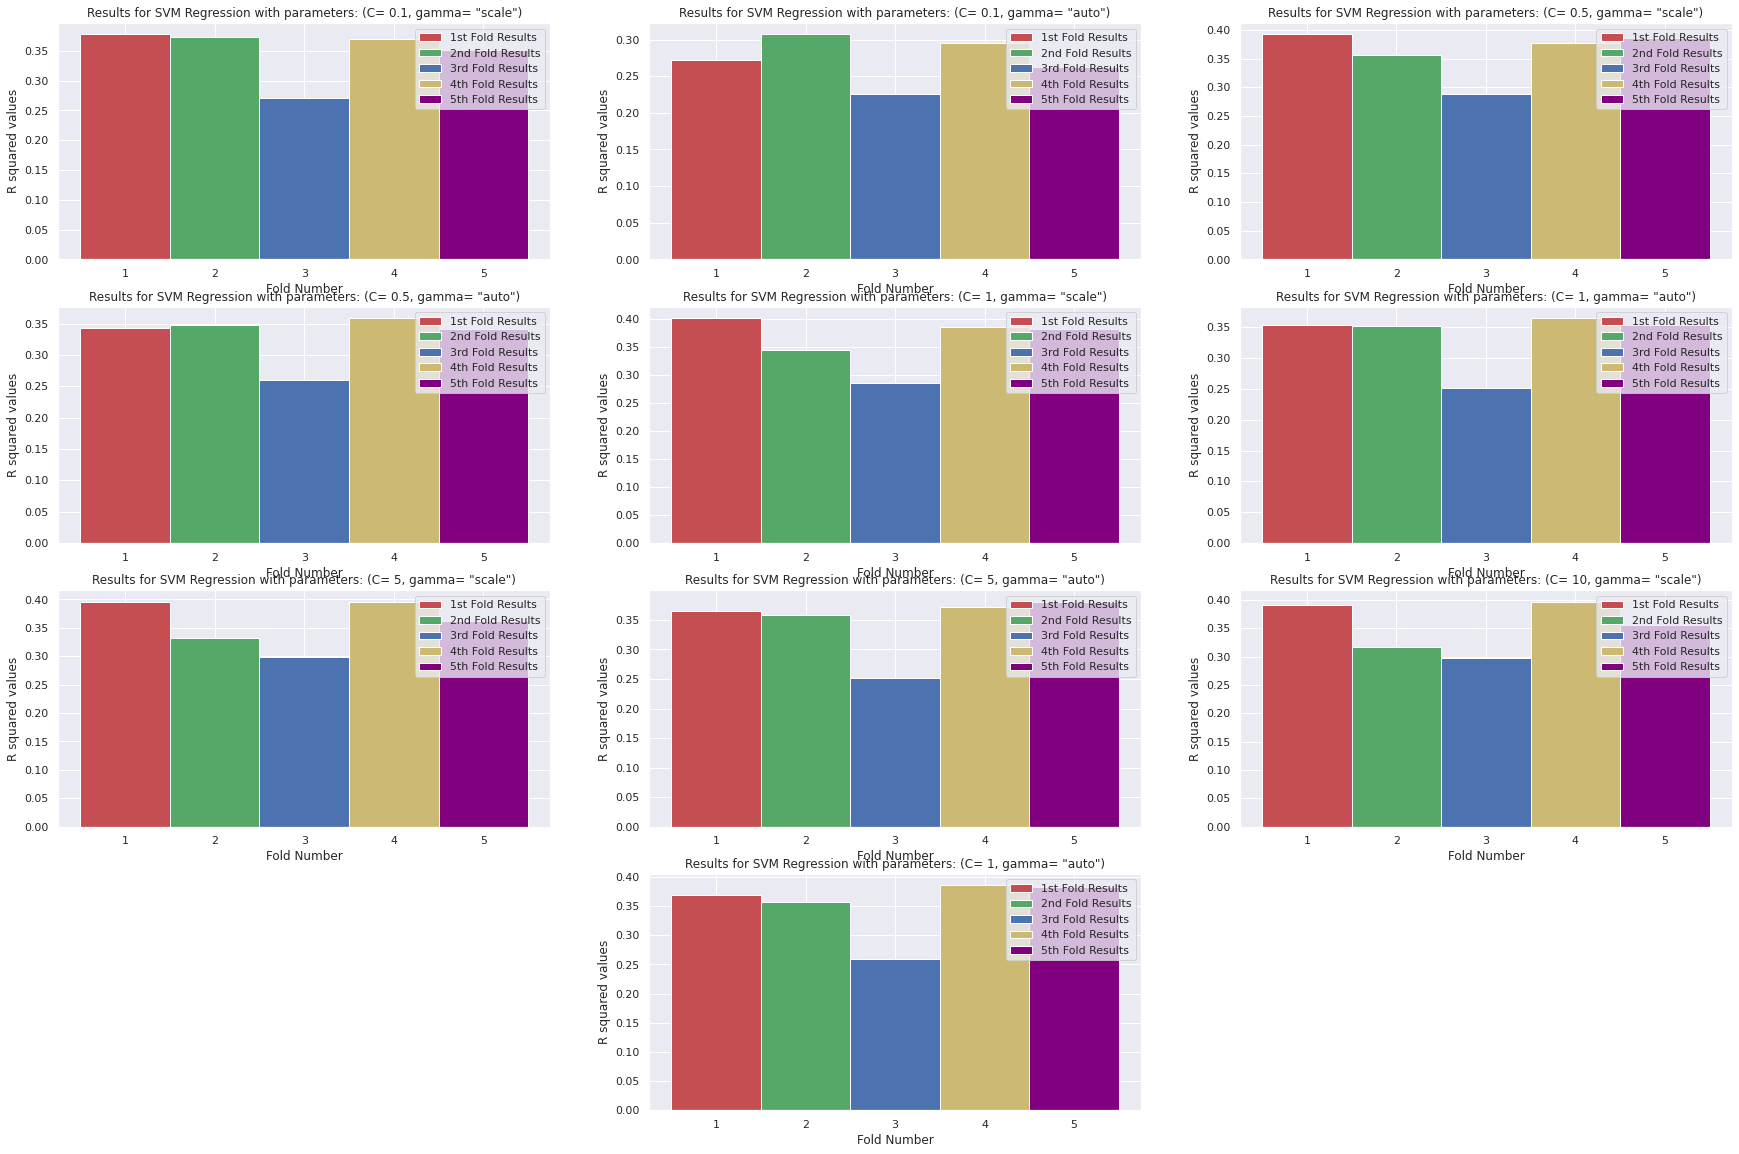

In [ ]:
x= ['1st trial', '2nd trial', '3rd trial', '4th trial', '5th trial', '6th trial', '7th trial', '8th trial', '9th trial', '10th trial']
x= [3]

trial_one_results = results[0]
trial_two_results = results[1]
trial_three_results = results[2]
trial_four_results = results[3]
trial_five_results = results[4]
trial_six_results = results[5]
trial_seven_results = results[6]
trial_eight_results = results[7]
trial_nine_results = results[8]
trial_ten_results = results[9]

ax = plt.subplot(431)
plt.gcf().set_size_inches(30, 20)
red= ax.bar(x[0]-2, trial_one_results[0], width= 1, color= 'r', align='center')
green= ax.bar(x[0]-1, trial_one_results[1], width= 1, color= 'g', align='center')
blue= ax.bar(x[0], trial_one_results[2], width= 1, color= 'b', align='center')
yellow= ax.bar(x[0]+1, trial_one_results[3], width= 1, color= 'y', align='center')
purple= ax.bar(x[0]+2, trial_one_results[4], width= 1, color= 'purple', align='center')
ax.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax.set_ylabel("R squared values")
ax.set_xlabel("Fold Number")
ax.set_title('Results for SVM Regression with parameters: (C= 0.1, gamma= "scale")')

ax2 = plt.subplot(432)
plt.gcf().set_size_inches(30, 20)
red= ax2.bar(x[0]-2, trial_two_results[0], width= 1, color= 'r', align='center')
green= ax2.bar(x[0]-1, trial_two_results[1], width= 1, color= 'g', align='center')
blue= ax2.bar(x[0], trial_two_results[2], width= 1, color= 'b', align='center')
yellow= ax2.bar(x[0]+1, trial_two_results[3], width= 1, color= 'y', align='center')
purple= ax2.bar(x[0]+2, trial_two_results[4], width= 1, color= 'purple', align='center')
ax2.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax2.set_ylabel("R squared values")
ax2.set_xlabel("Fold Number")
ax2.set_title('Results for SVM Regression with parameters: (C= 0.1, gamma= "auto")')

ax3 = plt.subplot(433)
plt.gcf().set_size_inches(30, 20)
red= ax3.bar(x[0]-2, trial_three_results[0], width= 1, color= 'r', align='center')
green= ax3.bar(x[0]-1, trial_three_results[1], width= 1, color= 'g', align='center')
blue= ax3.bar(x[0], trial_three_results[2], width= 1, color= 'b', align='center')
yellow= ax3.bar(x[0]+1, trial_three_results[3], width= 1, color= 'y', align='center')
purple= ax3.bar(x[0]+2, trial_three_results[4], width= 1, color= 'purple', align='center')
ax3.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax3.set_ylabel("R squared values")
ax3.set_xlabel("Fold Number")
ax3.set_title('Results for SVM Regression with parameters: (C= 0.5, gamma= "scale")')

ax4 = plt.subplot(434)
plt.gcf().set_size_inches(30, 20)
red= ax4.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax4.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax4.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax4.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax4.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax4.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax4.set_ylabel("R squared values")
ax4.set_xlabel("Fold Number")
ax4.set_title('Results for SVM Regression with parameters: (C= 0.5, gamma= "auto")')

ax5 = plt.subplot(435)
plt.gcf().set_size_inches(30, 20)
red= ax5.bar(x[0]-2, trial_five_results[0], width= 1, color= 'r', align='center')
green= ax5.bar(x[0]-1, trial_five_results[1], width= 1, color= 'g', align='center')
blue= ax5.bar(x[0], trial_five_results[2], width= 1, color= 'b', align='center')
yellow= ax5.bar(x[0]+1, trial_five_results[3], width= 1, color= 'y', align='center')
purple= ax5.bar(x[0]+2, trial_five_results[4], width= 1, color= 'purple', align='center')
ax5.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax5.set_ylabel("R squared values")
ax5.set_xlabel("Fold Number")
ax5.set_title('Results for SVM Regression with parameters: (C= 1, gamma= "scale")')

ax6 = plt.subplot(436)
plt.gcf().set_size_inches(30, 20)
red= ax6.bar(x[0]-2, trial_six_results[0], width= 1, color= 'r', align='center')
green= ax6.bar(x[0]-1, trial_six_results[1], width= 1, color= 'g', align='center')
blue= ax6.bar(x[0], trial_six_results[2], width= 1, color= 'b', align='center')
yellow= ax6.bar(x[0]+1, trial_six_results[3], width= 1, color= 'y', align='center')
purple= ax6.bar(x[0]+2, trial_six_results[4], width= 1, color= 'purple', align='center')
ax6.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax6.set_ylabel("R squared values")
ax6.set_xlabel("Fold Number")
ax6.set_title('Results for SVM Regression with parameters: (C= 1, gamma= "auto")')

ax7 = plt.subplot(437)
plt.gcf().set_size_inches(30, 20)
red= ax7.bar(x[0]-2, trial_seven_results[0], width= 1, color= 'r', align='center')
green= ax7.bar(x[0]-1, trial_seven_results[1], width= 1, color= 'g', align='center')
blue= ax7.bar(x[0], trial_seven_results[2], width= 1, color= 'b', align='center')
yellow= ax7.bar(x[0]+1, trial_seven_results[3], width= 1, color= 'y', align='center')
purple= ax7.bar(x[0]+2, trial_seven_results[4], width= 1, color= 'purple', align='center')
ax7.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax7.set_ylabel("R squared values")
ax7.set_xlabel("Fold Number")
ax7.set_title('Results for SVM Regression with parameters: (C= 5, gamma= "scale")')

ax8 = plt.subplot(438)
plt.gcf().set_size_inches(30, 20)
red= ax8.bar(x[0]-2, trial_eight_results[0], width= 1, color= 'r', align='center')
green= ax8.bar(x[0]-1, trial_eight_results[1], width= 1, color= 'g', align='center')
blue= ax8.bar(x[0], trial_eight_results[2], width= 1, color= 'b', align='center')
yellow= ax8.bar(x[0]+1, trial_eight_results[3], width= 1, color= 'y', align='center')
purple= ax8.bar(x[0]+2, trial_eight_results[4], width= 1, color= 'purple', align='center')
ax8.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax8.set_ylabel("R squared values")
ax8.set_xlabel("Fold Number")
ax8.set_title('Results for SVM Regression with parameters: (C= 5, gamma= "auto")')

ax9 = plt.subplot(439)
plt.gcf().set_size_inches(30, 20)
red= ax9.bar(x[0]-2, trial_nine_results[0], width= 1, color= 'r', align='center')
green= ax9.bar(x[0]-1, trial_nine_results[1], width= 1, color= 'g', align='center')
blue= ax9.bar(x[0], trial_nine_results[2], width= 1, color= 'b', align='center')
yellow= ax9.bar(x[0]+1, trial_nine_results[3], width= 1, color= 'y', align='center')
purple= ax9.bar(x[0]+2, trial_nine_results[4], width= 1, color= 'purple', align='center')
ax9.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax9.set_ylabel("R squared values")
ax9.set_xlabel("Fold Number")
ax9.set_title('Results for SVM Regression with parameters: (C= 10, gamma= "scale")')

ax10 = plt.subplot(4,3,11)
plt.gcf().set_size_inches(30, 20)
red= ax10.bar(x[0]-2, trial_ten_results[0], width= 1, color= 'r', align='center')
green= ax10.bar(x[0]-1, trial_ten_results[1], width= 1, color= 'g', align='center')
blue= ax10.bar(x[0], trial_ten_results[2], width= 1, color= 'b', align='center')
yellow= ax10.bar(x[0]+1, trial_ten_results[3], width= 1, color= 'y', align='center')
purple= ax10.bar(x[0]+2, trial_ten_results[4], width= 1, color= 'purple', align='center')
ax10.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax10.set_ylabel("R squared values")
ax10.set_xlabel("Fold Number")
ax10.set_title('Results for SVM Regression with parameters: (C= 1, gamma= "auto")')

In [ ]:
ridge_regressor_one_tenth= Ridge(alpha= 0.1)
ridge_regressor_one_fifth= Ridge(alpha= 0.5)
ridge_regressor_one= Ridge(alpha= 1)
ridge_regressor_five= Ridge(alpha= 5)
ridge_regressor_ten= Ridge(alpha= 10)


list_of_models = []

list_of_models.append(('Ridge Regression Model with parameter: (alpha= 0.1)', ridge_regressor_one_tenth))
list_of_models.append(('Ridge Regression Model with parameter: (alpha= 0.5)', ridge_regressor_one_fifth))
list_of_models.append(('Ridge Regression Model with parameter: (alpha= 1)', ridge_regressor_one))
list_of_models.append(('Ridge Regression Model with parameter: (alpha= 5)', ridge_regressor_five))
list_of_models.append(('Ridge Regression Model with parameter: (alpha= 10)', ridge_regressor_ten))


results = []
names = []

for name, model in list_of_models:

    kfold = sklearn.model_selection.KFold()
    cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv= 5, scoring= 'r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: The r^2 value is %f (with a standard deviation of %f)" % (name, cv_results.mean(), cv_results.std())
    results_mean.append((name,cv_results.mean()))
    print(msg)
    print("List of r^2 values for each fold: ", cv_results)
    print()

Ridge Regression Model with parameter: (alpha= 0.1): The r^2 value is 0.342150 (with a standard deviation of 0.041930)
List of r^2 values for each fold:  [0.38447253 0.31690388 0.27223719 0.37482349 0.36231277]

Ridge Regression Model with parameter: (alpha= 0.5): The r^2 value is 0.344568 (with a standard deviation of 0.043162)
List of r^2 values for each fold:  [0.38508853 0.31955018 0.2713203  0.37610745 0.37077519]

Ridge Regression Model with parameter: (alpha= 1): The r^2 value is 0.345523 (with a standard deviation of 0.043788)
List of r^2 values for each fold:  [0.38588588 0.32126016 0.27049867 0.37644953 0.37352099]

Ridge Regression Model with parameter: (alpha= 5): The r^2 value is 0.346622 (with a standard deviation of 0.043918)
List of r^2 values for each fold:  [0.38991794 0.32537147 0.2702573  0.37144241 0.37612171]

Ridge Regression Model with parameter: (alpha= 10): The r^2 value is 0.343660 (with a standard deviation of 0.042170)
List of r^2 values for each fold:  [0.

Text(0.5, 1.0, 'Results for Ridge Regression with alpha= 10')

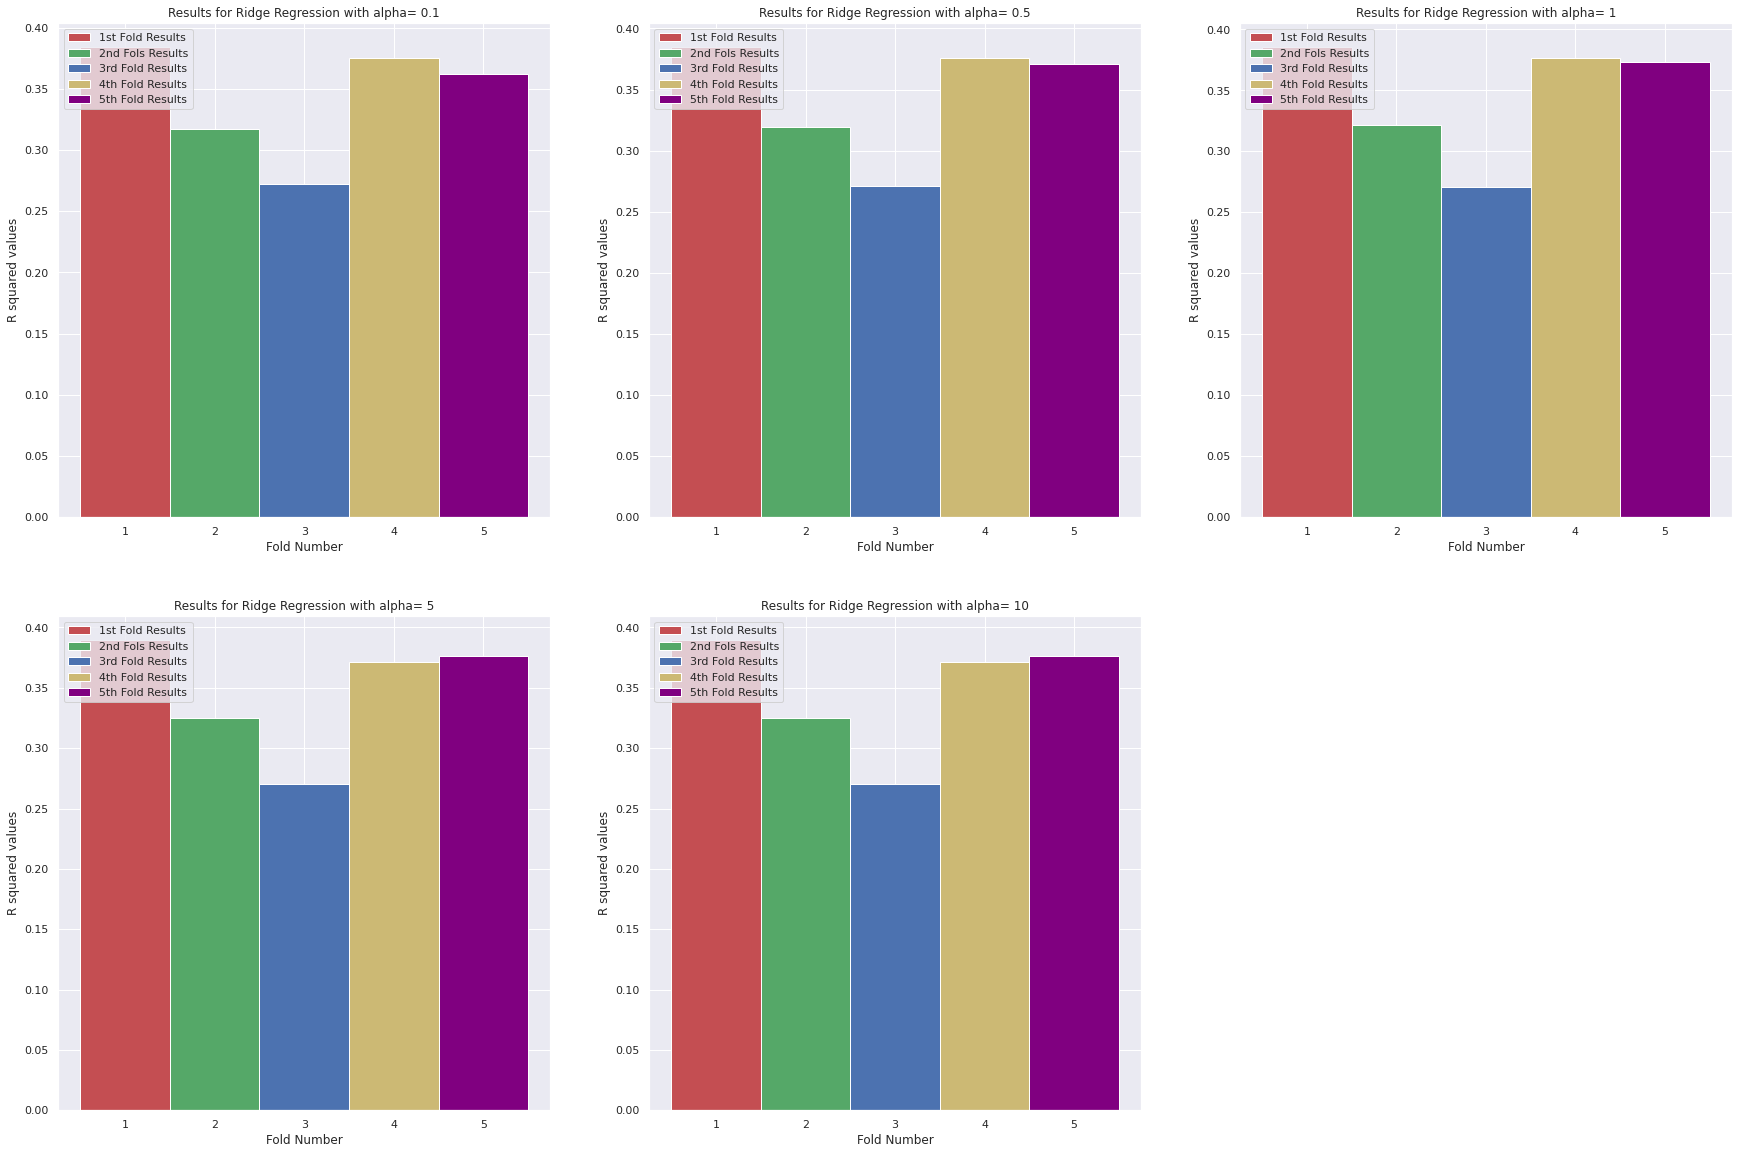

In [ ]:
x= ['1st trial', '2nd trial', '3rd trial', '4th trial', '5th trial']
x= [3]

trial_one_results = results[0]
trial_two_results = results[1]
trial_three_results = results[2]
trial_four_results = results[3]
trial_five_results = results[4]

ax = plt.subplot(231)
plt.gcf().set_size_inches(30, 20)
red= ax.bar(x[0]-2, trial_one_results[0], width= 1, color= 'r', align='center')
green= ax.bar(x[0]-1, trial_one_results[1], width= 1, color= 'g', align='center')
blue= ax.bar(x[0], trial_one_results[2], width= 1, color= 'b', align='center')
yellow= ax.bar(x[0]+1, trial_one_results[3], width= 1, color= 'y', align='center')
purple= ax.bar(x[0]+2, trial_one_results[4], width= 1, color= 'purple', align='center')
ax.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax.set_ylabel("R squared values")
ax.set_xlabel("Fold Number")
ax.set_title("Results for Ridge Regression with alpha= 0.1")

ax2 = plt.subplot(232)
plt.gcf().set_size_inches(30, 20)
red= ax2.bar(x[0]-2, trial_two_results[0], width= 1, color= 'r', align='center')
green= ax2.bar(x[0]-1, trial_two_results[1], width= 1, color= 'g', align='center')
blue= ax2.bar(x[0], trial_two_results[2], width= 1, color= 'b', align='center')
yellow= ax2.bar(x[0]+1, trial_two_results[3], width= 1, color= 'y', align='center')
purple= ax2.bar(x[0]+2, trial_two_results[4], width= 1, color= 'purple', align='center')
ax2.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax2.set_ylabel("R squared values")
ax2.set_xlabel("Fold Number")
ax2.set_title("Results for Ridge Regression with alpha= 0.5")

ax3 = plt.subplot(233)
plt.gcf().set_size_inches(30, 20)
red= ax3.bar(x[0]-2, trial_three_results[0], width= 1, color= 'r', align='center')
green= ax3.bar(x[0]-1, trial_three_results[1], width= 1, color= 'g', align='center')
blue= ax3.bar(x[0], trial_three_results[2], width= 1, color= 'b', align='center')
yellow= ax3.bar(x[0]+1, trial_three_results[3], width= 1, color= 'y', align='center')
purple= ax3.bar(x[0]+2, trial_three_results[4], width= 1, color= 'purple', align='center')
ax3.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax3.set_ylabel("R squared values")
ax3.set_xlabel("Fold Number")
ax3.set_title("Results for Ridge Regression with alpha= 1")

ax4 = plt.subplot(234)
plt.gcf().set_size_inches(30, 20)
red= ax4.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax4.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax4.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax4.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax4.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax4.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax4.set_ylabel("R squared values")
ax4.set_xlabel("Fold Number")
ax4.set_title("Results for Ridge Regression with alpha= 5")

ax5 = plt.subplot(235)
plt.gcf().set_size_inches(30, 20)
red= ax5.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax5.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax5.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax5.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax5.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax5.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax5.set_ylabel("R squared values")
ax5.set_xlabel("Fold Number")
ax5.set_title("Results for Ridge Regression with alpha= 10")

In [ ]:
knn_regressor_three_uniform= KNeighborsRegressor(n_neighbors= 3, weights= 'uniform')
knn_regressor_three_dist= KNeighborsRegressor(n_neighbors= 3, weights= 'distance')

knn_regressor_five_uniform= KNeighborsRegressor(n_neighbors= 5, weights= 'uniform')
knn_regressor_five_dist= KNeighborsRegressor(n_neighbors= 5, weights= 'distance')

knn_regressor_seven_uniform= KNeighborsRegressor(n_neighbors= 7, weights= 'uniform')
knn_regressor_seven_dist= KNeighborsRegressor(n_neighbors= 7, weights= 'distance')

knn_regressor_nine_uniform= KNeighborsRegressor(n_neighbors= 9, weights= 'uniform')
knn_regressor_nine_dist= KNeighborsRegressor(n_neighbors= 9, weights= 'distance')


list_of_models = []

list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 3, weights= "uniform")', knn_regressor_three_uniform))
list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 3, weights= "dist")', knn_regressor_three_dist))

list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 5, weights= "uniform")', knn_regressor_five_uniform))
list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 5, weights= "dist")', knn_regressor_five_dist))

list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 7, weights= "uniform")', knn_regressor_seven_uniform))
list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 7, weights= "dist")', knn_regressor_seven_dist))

list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 9, weights= "uniform")', knn_regressor_nine_uniform))
list_of_models.append(('KNN Regression Model with parameters: (n_neighbors= 9, weights= "dist")', knn_regressor_nine_dist))

results = []
names = []

for name, model in list_of_models:

    kfold = sklearn.model_selection.KFold()
    cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv= 5, scoring= 'r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: The r^2 value is %f (with a standard deviation of %f)" % (name, cv_results.mean(), cv_results.std())
    results_mean.append((name,cv_results.mean()))
    print(msg)
    print("List of r^2 values for each fold: ", cv_results)
    print()

KNN Regression Model with parameters: (n_neighbors= 3, weights= "uniform"): The r^2 value is 0.096692 (with a standard deviation of 0.183489)
List of r^2 values for each fold:  [ 0.42367254 -0.01970538 -0.09446039  0.0123156   0.16163871]

KNN Regression Model with parameters: (n_neighbors= 3, weights= "dist"): The r^2 value is 0.080244 (with a standard deviation of 0.182939)
List of r^2 values for each fold:  [ 0.39674572 -0.03981199 -0.11258793 -0.00975467  0.16663077]

KNN Regression Model with parameters: (n_neighbors= 5, weights= "uniform"): The r^2 value is 0.287613 (with a standard deviation of 0.057131)
List of r^2 values for each fold:  [0.25057721 0.29276622 0.20842679 0.30791646 0.37838031]

KNN Regression Model with parameters: (n_neighbors= 5, weights= "dist"): The r^2 value is 0.276211 (with a standard deviation of 0.055586)
List of r^2 values for each fold:  [0.23816261 0.29966084 0.1964198  0.28714025 0.35966974]

KNN Regression Model with parameters: (n_neighbors= 7, w

Text(0.5, 1.0, 'Results for KNN Regression with parameters: (n_neighbors= 9, weights= "dist")')

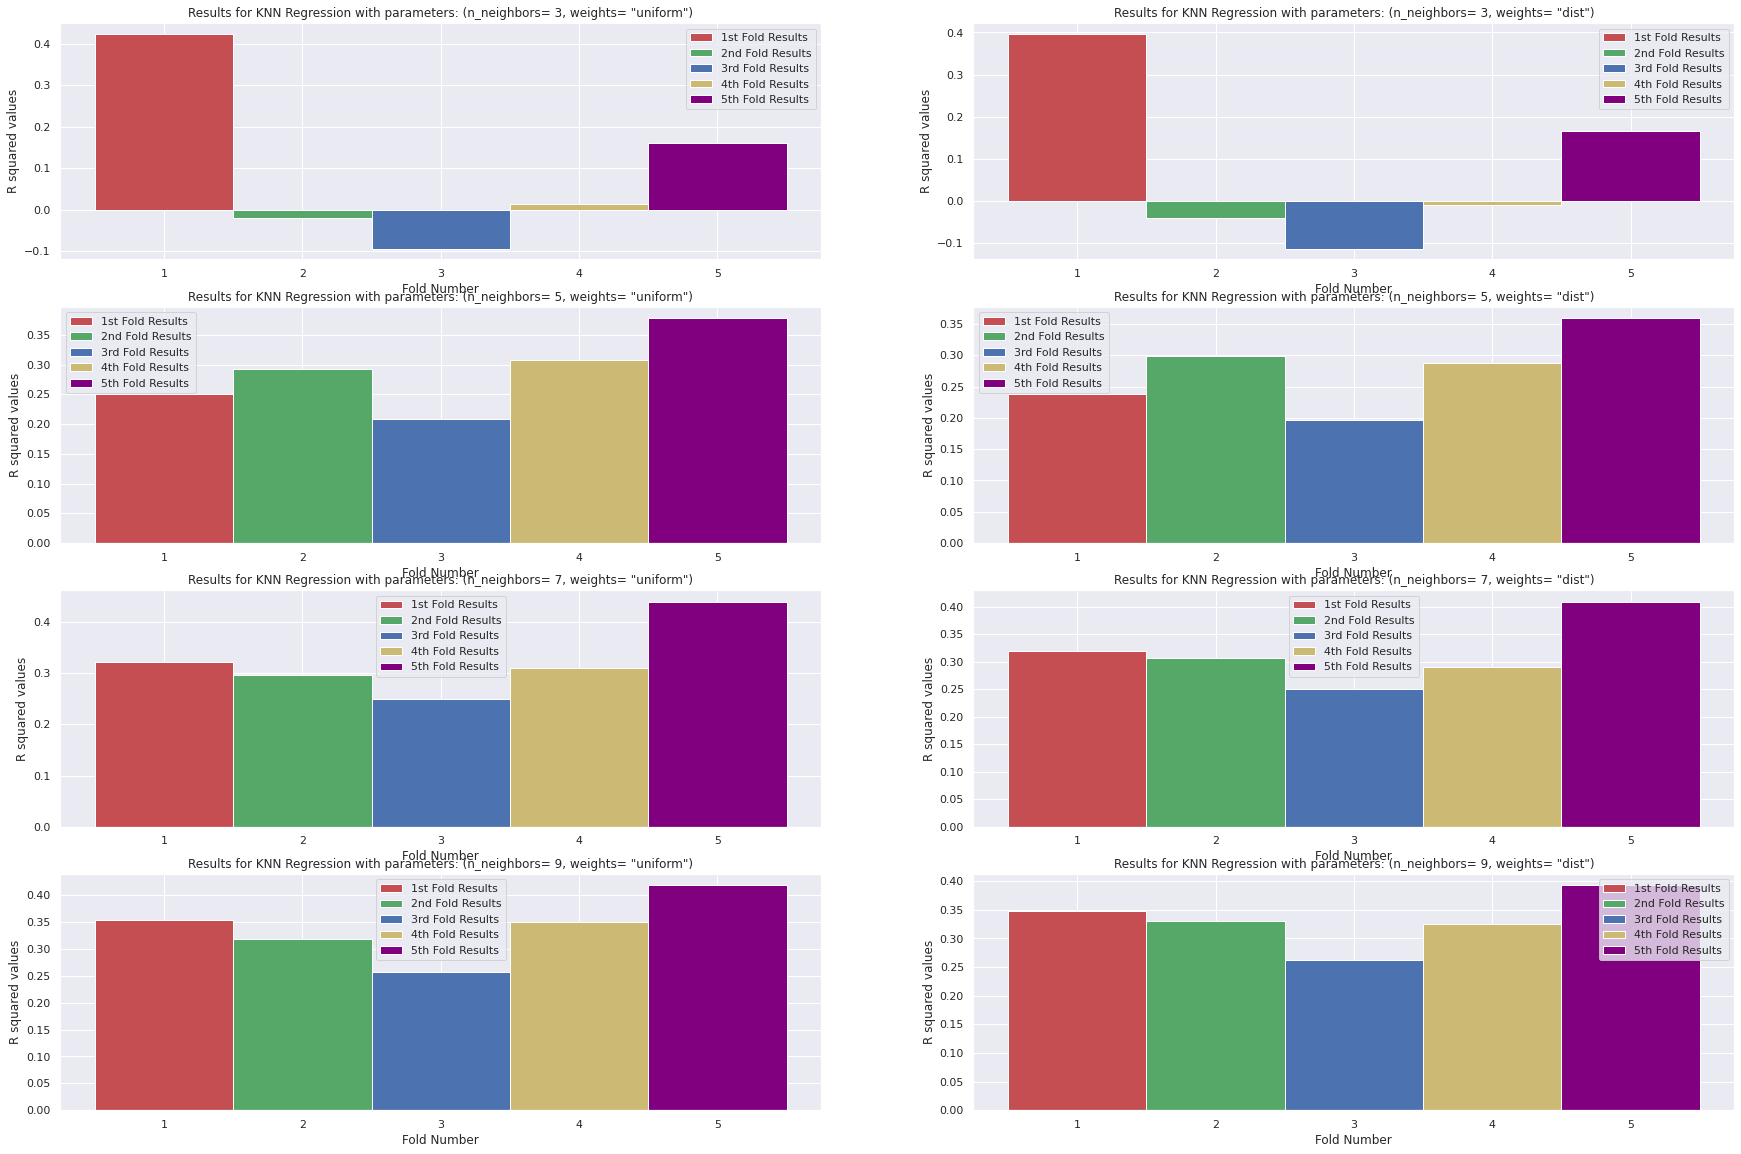

In [ ]:
x= ['1st trial', '2nd trial', '3rd trial', '4th trial', '5th trial', '6th trial', '7th trial', '8th trial']
x= [3]

trial_one_results = results[0]
trial_two_results = results[1]
trial_three_results = results[2]
trial_four_results = results[3]
trial_five_results = results[4]
trial_six_results = results[5]
trial_seven_results = results[6]
trial_eight_results = results[7]

ax = plt.subplot(421)
plt.gcf().set_size_inches(30, 20)
red= ax.bar(x[0]-2, trial_one_results[0], width= 1, color= 'r', align='center')
green= ax.bar(x[0]-1, trial_one_results[1], width= 1, color= 'g', align='center')
blue= ax.bar(x[0], trial_one_results[2], width= 1, color= 'b', align='center')
yellow= ax.bar(x[0]+1, trial_one_results[3], width= 1, color= 'y', align='center')
purple= ax.bar(x[0]+2, trial_one_results[4], width= 1, color= 'purple', align='center')
ax.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax.set_ylabel("R squared values")
ax.set_xlabel("Fold Number")
ax.set_title('Results for KNN Regression with parameters: (n_neighbors= 3, weights= "uniform")')

ax2 = plt.subplot(422)
plt.gcf().set_size_inches(30, 20)
red= ax2.bar(x[0]-2, trial_two_results[0], width= 1, color= 'r', align='center')
green= ax2.bar(x[0]-1, trial_two_results[1], width= 1, color= 'g', align='center')
blue= ax2.bar(x[0], trial_two_results[2], width= 1, color= 'b', align='center')
yellow= ax2.bar(x[0]+1, trial_two_results[3], width= 1, color= 'y', align='center')
purple= ax2.bar(x[0]+2, trial_two_results[4], width= 1, color= 'purple', align='center')
ax2.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax2.set_ylabel("R squared values")
ax2.set_xlabel("Fold Number")
ax2.set_title('Results for KNN Regression with parameters: (n_neighbors= 3, weights= "dist")')

ax3 = plt.subplot(423)
plt.gcf().set_size_inches(30, 20)
red= ax3.bar(x[0]-2, trial_three_results[0], width= 1, color= 'r', align='center')
green= ax3.bar(x[0]-1, trial_three_results[1], width= 1, color= 'g', align='center')
blue= ax3.bar(x[0], trial_three_results[2], width= 1, color= 'b', align='center')
yellow= ax3.bar(x[0]+1, trial_three_results[3], width= 1, color= 'y', align='center')
purple= ax3.bar(x[0]+2, trial_three_results[4], width= 1, color= 'purple', align='center')
ax3.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax3.set_ylabel("R squared values")
ax3.set_xlabel("Fold Number")
ax3.set_title('Results for KNN Regression with parameters: (n_neighbors= 5, weights= "uniform")')

ax4 = plt.subplot(424)
plt.gcf().set_size_inches(30, 20)
red= ax4.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax4.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax4.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax4.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax4.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax4.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax4.set_ylabel("R squared values")
ax4.set_xlabel("Fold Number")
ax4.set_title('Results for KNN Regression with parameters: (n_neighbors= 5, weights= "dist")')

ax5 = plt.subplot(425)
plt.gcf().set_size_inches(30, 20)
red= ax5.bar(x[0]-2, trial_five_results[0], width= 1, color= 'r', align='center')
green= ax5.bar(x[0]-1, trial_five_results[1], width= 1, color= 'g', align='center')
blue= ax5.bar(x[0], trial_five_results[2], width= 1, color= 'b', align='center')
yellow= ax5.bar(x[0]+1, trial_five_results[3], width= 1, color= 'y', align='center')
purple= ax5.bar(x[0]+2, trial_five_results[4], width= 1, color= 'purple', align='center')
ax5.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax5.set_ylabel("R squared values")
ax5.set_xlabel("Fold Number")
ax5.set_title('Results for KNN Regression with parameters: (n_neighbors= 7, weights= "uniform")')

ax6 = plt.subplot(426)
plt.gcf().set_size_inches(30, 20)
red= ax6.bar(x[0]-2, trial_six_results[0], width= 1, color= 'r', align='center')
green= ax6.bar(x[0]-1, trial_six_results[1], width= 1, color= 'g', align='center')
blue= ax6.bar(x[0], trial_six_results[2], width= 1, color= 'b', align='center')
yellow= ax6.bar(x[0]+1, trial_six_results[3], width= 1, color= 'y', align='center')
purple= ax6.bar(x[0]+2, trial_six_results[4], width= 1, color= 'purple', align='center')
ax6.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax6.set_ylabel("R squared values")
ax6.set_xlabel("Fold Number")
ax6.set_title('Results for KNN Regression with parameters: (n_neighbors= 7, weights= "dist")')

ax7 = plt.subplot(427)
plt.gcf().set_size_inches(30, 20)
red= ax7.bar(x[0]-2, trial_seven_results[0], width= 1, color= 'r', align='center')
green= ax7.bar(x[0]-1, trial_seven_results[1], width= 1, color= 'g', align='center')
blue= ax7.bar(x[0], trial_seven_results[2], width= 1, color= 'b', align='center')
yellow= ax7.bar(x[0]+1, trial_seven_results[3], width= 1, color= 'y', align='center')
purple= ax7.bar(x[0]+2, trial_seven_results[4], width= 1, color= 'purple', align='center')
ax7.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax7.set_ylabel("R squared values")
ax7.set_xlabel("Fold Number")
ax7.set_title('Results for KNN Regression with parameters: (n_neighbors= 9, weights= "uniform")')

ax8 = plt.subplot(428)
plt.gcf().set_size_inches(30, 20)
red= ax8.bar(x[0]-2, trial_eight_results[0], width= 1, color= 'r', align='center')
green= ax8.bar(x[0]-1, trial_eight_results[1], width= 1, color= 'g', align='center')
blue= ax8.bar(x[0], trial_eight_results[2], width= 1, color= 'b', align='center')
yellow= ax8.bar(x[0]+1, trial_eight_results[3], width= 1, color= 'y', align='center')
purple= ax8.bar(x[0]+2, trial_eight_results[4], width= 1, color= 'purple', align='center')
ax8.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fold Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax8.set_ylabel("R squared values")
ax8.set_xlabel("Fold Number")
ax8.set_title('Results for KNN Regression with parameters: (n_neighbors= 9, weights= "dist")')

In [ ]:
nn_one_millionth= MLPRegressor(alpha= 0.000001, random_state= 42)
nn_hundred_thousandth= MLPRegressor(alpha= 0.00001, random_state= 42)
nn_ten_thousandth= MLPRegressor(alpha= 0.0001, random_state= 42)
nn_one_thousandth= MLPRegressor(alpha= 0.001, random_state= 42)
nn_one_hundredth= MLPRegressor(alpha= 0.01, random_state= 42)

list_of_models = []

list_of_models.append(('MLP Neural Network Model with parameters: (alpha= 0.000001, random_state= 42)', nn_one_millionth))
list_of_models.append(('MLP Neural Network Model with parameters: (alpha= 0.00001, random_state= 42)', nn_hundred_thousandth))
list_of_models.append(('MLP Neural Network Model with parameters: (alpha= 0.0001, random_state= 42)', nn_ten_thousandth))
list_of_models.append(('MLP Neural Network Model with parameters: (alpha= 0.001, random_state= 42)', nn_one_thousandth))
list_of_models.append(('MLP Neural Network Model with parameters: (alpha= 0.01, random_state= 42)', nn_one_hundredth))

results = []
names = []

for name, model in list_of_models:

    kfold = sklearn.model_selection.KFold()
    cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv= 5, scoring= 'r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: The r^2 value is %f (with a standard deviation of %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    results_mean.append((name,cv_results.mean()))
    print("List of r^2 values for each fold: ", cv_results)
    print()

MLP Neural Network Model with parameters: (alpha= 0.000001, random_state= 42): The r^2 value is 0.314860 (with a standard deviation of 0.057695)
List of r^2 values for each fold:  [0.40157178 0.31762285 0.21956301 0.31474335 0.32080126]

MLP Neural Network Model with parameters: (alpha= 0.00001, random_state= 42): The r^2 value is 0.309650 (with a standard deviation of 0.046980)
List of r^2 values for each fold:  [0.36135544 0.32048802 0.22120412 0.31601836 0.32918356]

MLP Neural Network Model with parameters: (alpha= 0.0001, random_state= 42): The r^2 value is 0.310991 (with a standard deviation of 0.046740)
List of r^2 values for each fold:  [0.36418043 0.31907226 0.22367869 0.3182658  0.32975895]

MLP Neural Network Model with parameters: (alpha= 0.001, random_state= 42): The r^2 value is 0.311519 (with a standard deviation of 0.046667)
List of r^2 values for each fold:  [0.36134198 0.31944168 0.22330448 0.3197564  0.33374878]

MLP Neural Network Model with parameters: (alpha= 0.01

Text(0.5, 1.0, 'Results for MLP with alpha= 0.01')

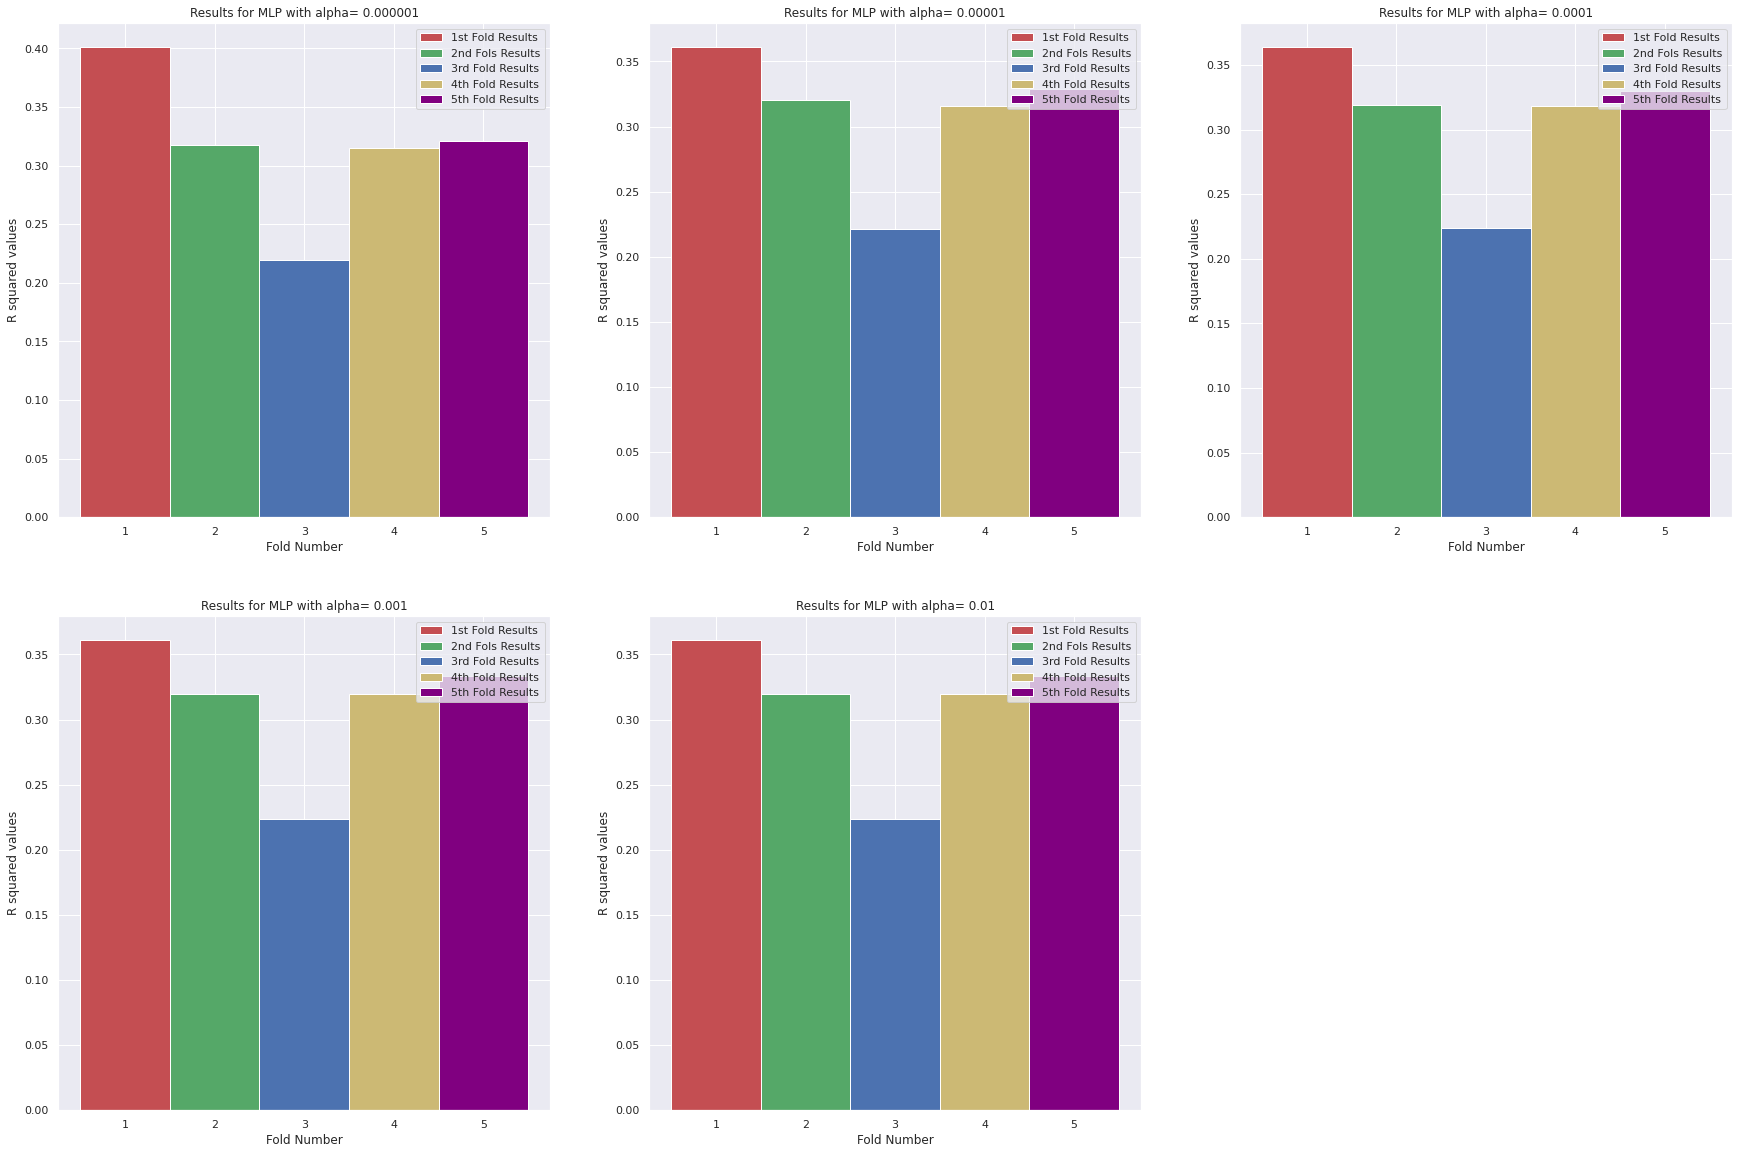

In [ ]:
x= ['1st trial', '2nd trial', '3rd trial', '4th trial', '5th trial']
x= [3]

trial_one_results = results[0]
trial_two_results = results[1]
trial_three_results = results[2]
trial_four_results = results[3]
trial_five_results = results[4]

ax = plt.subplot(231)
plt.gcf().set_size_inches(30, 20)
red= ax.bar(x[0]-2, trial_one_results[0], width= 1, color= 'r', align='center')
green= ax.bar(x[0]-1, trial_one_results[1], width= 1, color= 'g', align='center')
blue= ax.bar(x[0], trial_one_results[2], width= 1, color= 'b', align='center')
yellow= ax.bar(x[0]+1, trial_one_results[3], width= 1, color= 'y', align='center')
purple= ax.bar(x[0]+2, trial_one_results[4], width= 1, color= 'purple', align='center')
ax.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax.set_ylabel("R squared values")
ax.set_xlabel("Fold Number")
ax.set_title("Results for MLP with alpha= 0.000001")

ax2 = plt.subplot(232)
plt.gcf().set_size_inches(30, 20)
red= ax2.bar(x[0]-2, trial_two_results[0], width= 1, color= 'r', align='center')
green= ax2.bar(x[0]-1, trial_two_results[1], width= 1, color= 'g', align='center')
blue= ax2.bar(x[0], trial_two_results[2], width= 1, color= 'b', align='center')
yellow= ax2.bar(x[0]+1, trial_two_results[3], width= 1, color= 'y', align='center')
purple= ax2.bar(x[0]+2, trial_two_results[4], width= 1, color= 'purple', align='center')
ax2.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax2.set_ylabel("R squared values")
ax2.set_xlabel("Fold Number")
ax2.set_title("Results for MLP with alpha= 0.00001")

ax3 = plt.subplot(233)
plt.gcf().set_size_inches(30, 20)
red= ax3.bar(x[0]-2, trial_three_results[0], width= 1, color= 'r', align='center')
green= ax3.bar(x[0]-1, trial_three_results[1], width= 1, color= 'g', align='center')
blue= ax3.bar(x[0], trial_three_results[2], width= 1, color= 'b', align='center')
yellow= ax3.bar(x[0]+1, trial_three_results[3], width= 1, color= 'y', align='center')
purple= ax3.bar(x[0]+2, trial_three_results[4], width= 1, color= 'purple', align='center')
ax3.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax3.set_ylabel("R squared values")
ax3.set_xlabel("Fold Number")
ax3.set_title("Results for MLP with alpha= 0.0001")

ax4 = plt.subplot(234)
plt.gcf().set_size_inches(30, 20)
red= ax4.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax4.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax4.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax4.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax4.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax4.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax4.set_ylabel("R squared values")
ax4.set_xlabel("Fold Number")
ax4.set_title("Results for MLP with alpha= 0.001")

ax5 = plt.subplot(235)
plt.gcf().set_size_inches(30, 20)
red= ax5.bar(x[0]-2, trial_four_results[0], width= 1, color= 'r', align='center')
green= ax5.bar(x[0]-1, trial_four_results[1], width= 1, color= 'g', align='center')
blue= ax5.bar(x[0], trial_four_results[2], width= 1, color= 'b', align='center')
yellow= ax5.bar(x[0]+1, trial_four_results[3], width= 1, color= 'y', align='center')
purple= ax5.bar(x[0]+2, trial_four_results[4], width= 1, color= 'purple', align='center')
ax5.legend([red, green, blue, yellow, purple], ['1st Fold Results','2nd Fols Results','3rd Fold Results', '4th Fold Results', '5th Fold Results'])
ax5.set_ylabel("R squared values")
ax5.set_xlabel("Fold Number")
ax5.set_title("Results for MLP with alpha= 0.01")

Text(0.5, 1.0, 'Average R^2 for all Regressors')

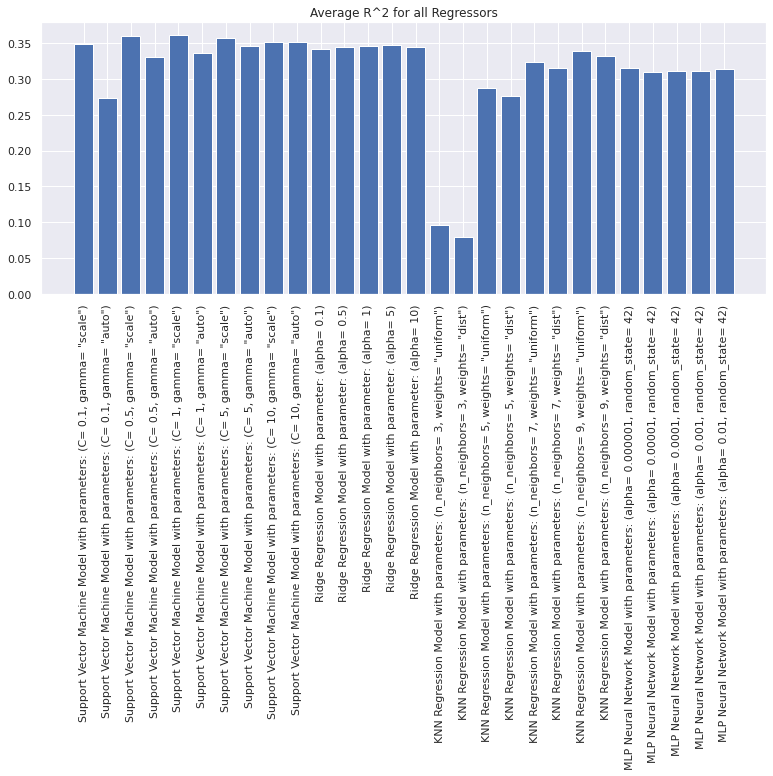

In [ ]:
list_of_names= []
for model in range(len(results_mean)):
  list_of_names.append(results_mean[model][0])

list_of_means= []
for model in range(len(results_mean)):
  list_of_means.append(results_mean[model][1])

plt.bar(list_of_names, list_of_means)
plt.xticks(rotation = 90)
plt.title("Average R^2 for all Regressors")

** Interpretation of r^2 plots for time-only and categorical-only data**


- The average r^2 values in the time-only section are far lower than the average r^2 values in the categorical-only section for all classifiers.
- Additonally, the average r^2 value bar chart for the categorical data is nearly the same as the one for the full dataset
This tells us that the regressors being used for the full dataset are likely using the categorical data for regression and nearly ignoring the time based data.
- Additionally, just like before, in the graphs above the r^2 values depended on cross validation. Some models were able to do achieve high r^2 values on a particular fold but struggled with others. This goes to show the importance of cross validation to determine how well the models perform.

## Results

Despite the various parameters and regressors we used, if the parameters were tuned correctly, they were consistently only achieveing an r^2 value between 0.3 and 0.36. As was said earlier, the best regressor was the Support Vector Machine Model with parameters: (C= 1, gamma= "scale") which only achieved an average r^2 value of:  0.36056531240981526. 

This indicates that the data we had was simply not predictive of the target variable, percent attendance. We would need different data about the classes in order to reattempt to predict class attendance. In other words, despite our best efforts, we were not able to accurately predict the results from our project because the data was insufficient for this purpose.

However, we did find that the data was not easily linearly separable (both from the PCA and the poor results of the Ridge Regression).

We also found, from the sections in which only categorical and only time-based data was considered, that the regressors performed better with the categroical data than the time based data. In fact, all of the average r^2 for the time based data were negative!

The cross validation we performed when reporting our r-squared values (using cross_val_score()) was extremely important too, as various regressors sometimes better better or worse depnding on the training and testing datasets.

## Evaluation

To evaulate whether or not or project was sucessful, we have to look at our inintial objectives.

Our first objective was to use Exploratory Data Analysis to identify and describe patterns in class attendance based on time-based and categorical features.

We were sucessful on this metric, since we were able to visualize various trends in the data and discuss what they meant for the Moxy business. For example, we showed and discussed the attendance percentages for individuals classes as well as throughout the year. We were able to make some predictions on how Moxy could improve its class attendance based on the discusssion of the popularity of various classes.


Our second objective was to predict class attendance based on the features we extracted from the data.

We were not as sucessful on this metric because our data was not very predictive of class attendnace. However, as discussed in the results section, we did find some patterns about our data through dimensional analysis and machine learning. 

For example, our PCA plot waqs able to show us that our data was not linear, and the poor performance of the Ridge Regression method corroborated this.

We also found that, due to the fact that the r^2 values found when only the categorical data was used were approxiamtely the same as the r^2 values found when all of the data was used, the regressors were mainly making predictions with the categorical data, not the time based data. This was corroborated by the fact that the time based data had negative r squared values.

All in all, we would say that we suceeded on our first metric and partially suceeded on the second one.

## Ethical Considerations

Before settling on this idea for our final project, we reached out to the owner of the gym which we are scraping the class attendance data from. She gave us permission to analyze it, persue the objectives listed above with it, and present our findings in it to the class.

Another minor ethical consideration here is nonresponse bias: The people who are unable to attend classes because they don't fit in their schedule aren't included in the attendance data. If each attendance point is viewed as a vote for having a particular class at a particular time, these individuals never have an opportunity to express their preferences.

Since the results we obtained from our machine learning section were poor, they should not be used when trying to optimize a schedule for the Moxy Movement. When we discuss our results with the owner, we will explicitly mention this, as we would not want to create harm to her business. 

All optimization suggestions are contingent on teacher and space availablity as well, which our data set does not take into consideration.


A major ethical consideration we've encountered since beginning our work on this project is how misleading some of the metrics we are using to identify trends in the data can be. For example, on the bar graph of teachers and the average percentage full of their classes, the two "top" teachers only taught one class each which just so happened to be full. The same thing happened with certain class timeslots. Emily has firsthand knowledge of the gym from going there and pointed these things out, but our plots would be misleading to an uninformed observer. 

Another concern is that the teacher's names (first and last) are used in this project as variables for regression. This, however, is not confidential information, as it is available on the Project Moxy scheduling website. Ultimately, even if we did try to mask the teacher's names, we have still used a lot of other data including the time of each class and the name of the class. Therefore, it would be fairly easy to find to the name of teachers teaching each class.

The final concern to look at here is reproducibilty of our analysis. To ensure that our analysis is reproducible, we have taken great care to make sure that we have included the random_state parameters in the right places (for example, in our neural networks). If anyone were to rerun our code, they would get the same results that we did.

## Project Summary

1. We have examined the trends in class attendance at a gym over the course of a year by collecting and showing categroical and time-based data about these classes. We have also attempted to predict class attendance at this gym using the aforementioned data and various machine learning teachniques, but did not succeed due to the fact that the data was not predictive of class attendance.
2. Our project objectives are to identify and describe patterns in class attendance based on time-based and categorical features as well as to attempt to predict class attendance based on the features we extracted from the data.
3. Our technical contributions include the code we wrote to try to accomplish our project objectives, the descriptions we made of our results, and the precautions we took to create this project as ethically as we could.
4. The main results are that the categorical variables we had were better predictors of class attendace than the time based variables, the machine learning models, when properly tuned, were achieving around 0.30 to 0.36 average r^squared values, and the data was not sufficient for the purpose of predicting class attendance.
5. The results of the machine learning were evaluated using the coefficient of determination (r^2), as mentioned earlier. We would need different kinds of data about the gym's classes other than the ones we found earlier in order to predict class attendance better.
6. The future direction for this project are to expand it to include more gymns and, more importantly, gather more data on about the classes that are different from what we already have.